# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
import cv2
import mediapipe as mp
import time
import csv
import matplotlib.pyplot as plt

In [4]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/45/6b/44f7f8f1e110027cf88956b59f2fad776cca7e1704396d043f89effd3a0e/typing_extensions-4.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/92/f2/c48787ca7d1e20daa185e1b6b2d4e16acd2fb5e0320bc50ffc89b91fa4d7/importlib_metadata-4.11.3-py3-none-any.whl
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4835 sha256=7fc150f590b32e33c35c9cb595df9fef63b1fe86203a27fa1ef0433420c416af
  Stored in directory: C:\Users\Rithik\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: numpy 1.19.3
    Uninstalling numpy-1.19.3:
      Successfully uninstalled numpy-1.19.3


ERROR: mediapipe 0.8.3 has requirement numpy==1.19.3, but you'll have numpy 1.21.6 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\rithik\\anaconda3\\lib\\site-packages\\~umpy\\.libs\\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [3]:
import tensorflow as tf

In [4]:
landmark_names = [
        'nose',
        'left_eye_inner', 'left_eye', 'left_eye_outer',
        'right_eye_inner', 'right_eye', 'right_eye_outer',
        'left_ear', 'right_ear',
        'mouth_left', 'mouth_right',
        'left_shoulder', 'right_shoulder',
        'left_elbow', 'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]

# Creating CSV Datasets from videos

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def create_dataset(filename, csv_out_writer):
    cap = cv2.VideoCapture(filename)
    mpDraw = mp.solutions.drawing_utils
    mpPose = mp.solutions.pose
    pose = mpPose.Pose()

    count=0
    print(filename)
    
    while True:
        count+=1
        print(count-1)
        success, img = cap.read()
        print(success)
        if success == False:
            break
        #plt.imshow(img)
        #plt.show()
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(RGB_img)
        #print(results.pose_landmarks)
        if results.pose_landmarks == None:
            continue
        pose_landmarks = [[lmk.x, lmk.y, lmk.z] for lmk in results.pose_landmarks.landmark]
        frame_height, frame_width = img.shape[:2]
        pose_landmarks *= np.array([frame_width, frame_height, frame_width])
        #print(pose_landmarks)

#     print(len(pose_landmarks))
#     if results.pose_landmarks:
#         mpDraw.draw_landmarks(RGB_img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
#     plt.imshow(RGB_img)
#     plt.show()

        pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()
        csv_out_writer.writerow([count-1, filename] + pose_landmarks)

csv_out_path = 'pose_new.csv'

with open(csv_out_path, 'w', newline='') as csv_out_file:
    csv_out_writer = csv.writer(csv_out_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)

    # Loading bad_pos dataset
    create_dataset("subhash_bad.mp4", csv_out_writer)

    # Loading good_pos dataset
    create_dataset("subhash_good.mp4", csv_out_writer)


subhash_bad.mp4
0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105
True
106
True
107
True
108
True
109
True
110
True
111
True
112
True
113
True
114
True
115
True
116
True
117
True
118
True
119
True
120
True
121
T

922
True
923
True
924
True
925
True
926
True
927
True
928
True
929
True
930
True
931
True
932
True
933
True
934
True
935
True
936
True
937
True
938
True
939
True
940
True
941
True
942
True
943
True
944
True
945
True
946
True
947
True
948
True
949
True
950
True
951
True
952
True
953
True
954
True
955
True
956
True
957
True
958
True
959
True
960
True
961
True
962
True
963
True
964
True
965
True
966
True
967
True
968
True
969
True
970
True
971
True
972
True
973
True
974
False
subhash_good.mp4
0
True
1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64


True
871
True
872
True
873
True
874
True
875
True
876
True
877
True
878
True
879
True
880
True
881
True
882
True
883
True
884
True
885
True
886
True
887
True
888
True
889
True
890
True
891
True
892
True
893
True
894
True
895
True
896
True
897
True
898
True
899
True
900
True
901
True
902
True
903
True
904
True
905
True
906
True
907
True
908
True
909
True
910
True
911
True
912
True
913
True
914
True
915
True
916
True
917
True
918
True
919
True
920
True
921
True
922
True
923
True
924
True
925
True
926
True
927
True
928
True
929
True
930
True
931
True
932
True
933
True
934
True
935
True
936
True
937
True
938
True
939
True
940
True
941
True
942
True
943
True
944
True
945
True
946
True
947
True
948
True
949
True
950
True
951
True
952
True
953
True
954
True
955
True
956
True
957
True
958
True
959
True
960
True
961
True
962
True
963
True
964
True
965
True
966
True
967
True
968
True
969
True
970
True
971
True
972
True
973
True
974
True
975
True
976
True
977
True
978
True
979
True
980
True
981
T

# Creating Normalized Datasets from Videos

In [5]:
  # Check Tensorflow notebook
def normalize_pose_landmarks(landmarks):
    """Normalizes landmarks translation and scale."""
    landmarks = np.copy(landmarks)

    # Normalize translation.
    pose_center = get_pose_center(landmarks)
    landmarks -= pose_center

    # Normalize scale.
    pose_size = get_pose_size(landmarks)
    landmarks /= pose_size
    
    landmarks *= 100

    return landmarks

  def get_pose_center(landmarks):
    """Calculates pose center as point between hips."""
    left_hip = landmarks[landmark_names.index('left_hip')]
    right_hip = landmarks[landmark_names.index('right_hip')]
    center = (left_hip + right_hip) * 0.5
    return center

  def get_pose_size(landmarks, torso_size_multiplier=2.5):
    """Calculates pose size.
    
    It is the maximum of two values:
      * Torso size multiplied by `torso_size_multiplier`
      * Maximum distance from pose center to any pose landmark
    """
    # This approach uses only 2D landmarks to compute pose size.
    landmarks = landmarks[:, :2]

    # Hips center.
    left_hip = landmarks[landmark_names.index('left_hip')]
    right_hip = landmarks[landmark_names.index('right_hip')]
    hips = (left_hip + right_hip) * 0.5

    # Shoulders center.
    left_shoulder = landmarks[landmark_names.index('left_shoulder')]
    right_shoulder = landmarks[landmark_names.index('right_shoulder')]
    shoulders = (left_shoulder + right_shoulder) * 0.5

    # Torso size as the minimum body size.
    torso_size = np.linalg.norm(shoulders - hips)

    # Max dist to pose center.
    pose_center = get_pose_center(landmarks)
    max_dist = np.max(np.linalg.norm(landmarks - pose_center, axis=1))

    return max(torso_size * torso_size_multiplier, max_dist)

In [49]:
skip = []
def create_normalized_dataset(filename, pos_type, csv_out_writer):
    cap = cv2.VideoCapture(filename)
    mpDraw = mp.solutions.drawing_utils
    mpPose = mp.solutions.pose
    pose = mpPose.Pose()

    count=0
    print(filename)
    
    while True:
        count+=1
        print(count-1)
        success, img = cap.read()
        print(success)
        if success == False:
            break
        #plt.imshow(img)
        #plt.show()
        RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(RGB_img)
        if results.pose_landmarks == None:
            skip.append(count)
            continue
        pose_landmarks = [[lmk.x, lmk.y, lmk.z] for lmk in results.pose_landmarks.landmark]
        print("==================================//")
        print(pose_landmarks)
        frame_height, frame_width = img.shape[:2]
        pose_landmarks *= np.array([frame_width, frame_height, frame_width])
        print("Next\n\n")
        print(pose_landmarks)
        
        # Normalizing landmarks
        pose_landmarks = normalize_pose_landmarks(pose_landmarks)
        #print(pose_landmarks)

#     print(len(pose_landmarks))
#     if results.pose_landmarks:
#         mpDraw.draw_landmarks(RGB_img, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
#     plt.imshow(RGB_img)
#     plt.show()

        pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()
        csv_out_writer.writerow([count-1, pos_type] + pose_landmarks)

csv_out_path = 'datasets\\paul_test.csv'

with open(csv_out_path, 'w', newline='') as csv_out_file:
    csv_out_writer = csv.writer(csv_out_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)

    # Loading bad_pos dataset
    create_normalized_dataset("test videos\\paul_bad.mp4", "bad", csv_out_writer)
    
    # Loading good_pos dataset
    create_normalized_dataset("test videos\\paul_good.mp4", "good", csv_out_writer)


test videos\paul_bad.mp4
0
True
==================================//
[[0.18754443526268005, 0.3174758553504944, -0.3558160662651062], [0.19814109802246094, 0.29738572239875793, -0.41893741488456726], [0.20522207021713257, 0.2966786324977875, -0.41874873638153076], [0.21332691609859467, 0.2958586812019348, -0.41878366470336914], [0.19043302536010742, 0.2965902090072632, -0.3361111283302307], [0.19177661836147308, 0.2953625023365021, -0.33627352118492126], [0.19378572702407837, 0.2939463257789612, -0.33639684319496155], [0.27089443802833557, 0.29862192273139954, -0.5356131196022034], [0.2501949965953827, 0.2956126034259796, -0.1683487445116043], [0.21698762476444244, 0.3350144028663635, -0.3899438977241516], [0.20658621191978455, 0.33376842737197876, -0.2830771207809448], [0.40623629093170166, 0.38150036334991455, -0.6480587124824524], [0.34896063804626465, 0.3654313385486603, 0.11762961745262146], [0.4239460825920105, 0.5479249954223633, -0.516219437122345], [0.32587188482284546, 0.4733

C:\Users\Rithik\AppData\Local\Temp\ipykernel_24356\2015832823.py:43: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()


==================================//
[[0.18707089126110077, 0.3144060969352722, -0.4051373600959778], [0.19799670577049255, 0.29560503363609314, -0.4588909447193146], [0.2046242207288742, 0.29499492049217224, -0.45875367522239685], [0.2119743824005127, 0.2941550612449646, -0.45881909132003784], [0.19053353369235992, 0.2947239279747009, -0.3800060451030731], [0.19180315732955933, 0.29342973232269287, -0.38021862506866455], [0.19372272491455078, 0.29194310307502747, -0.38038405776023865], [0.26654931902885437, 0.29705455899238586, -0.519923210144043], [0.24307546019554138, 0.29351550340652466, -0.20006901025772095], [0.21509046852588654, 0.3307602107524872, -0.4303297996520996], [0.20413392782211304, 0.3306255042552948, -0.33006274700164795], [0.413386732339859, 0.3813193738460541, -0.6379935145378113], [0.34079018235206604, 0.3653075098991394, 0.0701974406838417], [0.4245516061782837, 0.5483155846595764, -0.5157460570335388], [0.3241381347179413, 0.4799017906188965, 0.23422446846961975]

True
==================================//
[[0.17874762415885925, 0.3127739429473877, -0.4219512939453125], [0.19125528633594513, 0.2936593294143677, -0.4645262658596039], [0.1970439851284027, 0.2931284010410309, -0.4645162522792816], [0.20379601418972015, 0.2924005389213562, -0.4646276533603668], [0.18484696745872498, 0.2926005721092224, -0.3934458792209625], [0.18609218299388885, 0.2913112938404083, -0.39369189739227295], [0.18772725760936737, 0.2897922396659851, -0.39387351274490356], [0.2576819360256195, 0.2965048551559448, -0.5071958899497986], [0.2324141561985016, 0.29223668575286865, -0.20434589684009552], [0.20355702936649323, 0.3298472464084625, -0.43721333146095276], [0.19273105263710022, 0.32955309748649597, -0.3456827402114868], [0.4069105386734009, 0.3801191449165344, -0.6139123439788818], [0.3163164258003235, 0.3650667667388916, 0.05044184625148773], [0.4196223020553589, 0.5471416711807251, -0.5005478858947754], [0.3126157522201538, 0.4835371971130371, 0.20512701570987701]

True
==================================//
[[0.16430552303791046, 0.3117881119251251, -0.4323587119579315], [0.17687198519706726, 0.29253116250038147, -0.47565004229545593], [0.1829550713300705, 0.29212549328804016, -0.4756625294685364], [0.18999190628528595, 0.2916274666786194, -0.4757712483406067], [0.17063051462173462, 0.29122424125671387, -0.4036967158317566], [0.17214705049991608, 0.2898590564727783, -0.4039767384529114], [0.17387507855892181, 0.28830674290657043, -0.4041583836078644], [0.24630232155323029, 0.29632794857025146, -0.5269747376441956], [0.2220863252878189, 0.29142478108406067, -0.21589140594005585], [0.18942365050315857, 0.3296167552471161, -0.44889211654663086], [0.17951609194278717, 0.32918840646743774, -0.3553720712661743], [0.39756327867507935, 0.3827191889286041, -0.6179534196853638], [0.3012019395828247, 0.3649410605430603, 0.026221267879009247], [0.41148853302001953, 0.5508632659912109, -0.5022585391998291], [0.30049383640289307, 0.4834353029727936, 0.201482400

True
==================================//
[[0.15300621092319489, 0.31706172227859497, -0.4326654374599457], [0.16494661569595337, 0.29758232831954956, -0.4770940840244293], [0.17131172120571136, 0.29703307151794434, -0.47708940505981445], [0.17884989082813263, 0.2962147891521454, -0.4771898090839386], [0.15810081362724304, 0.2964533269405365, -0.40531080961227417], [0.1594061702489853, 0.29515284299850464, -0.40557727217674255], [0.1610671430826187, 0.293590784072876, -0.40575119853019714], [0.23502930998802185, 0.29947105050086975, -0.5294646620750427], [0.20941901206970215, 0.29572397470474243, -0.21800895035266876], [0.17936767637729645, 0.33457574248313904, -0.450107604265213], [0.16927054524421692, 0.3344891369342804, -0.3565486669540405], [0.3881261646747589, 0.38560184836387634, -0.6185147166252136], [0.29157933592796326, 0.3657757043838501, 0.02507360652089119], [0.39771193265914917, 0.555145263671875, -0.5036274790763855], [0.28703126311302185, 0.484815776348114, 0.19952796399

[[  51.99391317  206.07248306 -154.91777515]
 [  55.44306278  192.65184402 -166.69790554]
 [  57.78765011  192.06628799 -166.70237446]
 [  60.60656166  191.27206802 -166.74258423]
 [  52.66414595  192.41760254 -144.60578918]
 [  52.88557243  191.63167953 -144.70457745]
 [  53.20516825  190.62549591 -144.78381157]
 [  80.22264051  192.32837677 -178.51646233]
 [  69.86886072  190.56346893  -76.69005537]
 [  62.08182383  216.50043488 -156.585783  ]
 [  58.01608944  217.15106964 -127.77585506]
 [ 133.43902302  248.10045242 -210.47600174]
 [  98.51462936  235.07930756    7.21896178]
 [ 138.38888454  357.13737488 -175.47227955]
 [ 100.72178173  311.38210297   65.63086843]
 [  67.61648417  350.02601624  -70.62610102]
 [  66.38515568  355.24066925    6.216645  ]
 [  58.09017801  371.77684784  -81.41475058]
 [  61.0209856   382.56385803   -7.24007636]
 [  53.406322    366.10740662  -83.62189245]
 [  58.68730307  380.25260925  -32.72077918]
 [  57.28462934  357.02781677  -69.35186148]
 [  61.594

 [  54.51761389  470.21938324  104.53782845]]
18
True
==================================//
[[0.13787537813186646, 0.3259933590888977, -0.4527701437473297], [0.14671751856803894, 0.30428314208984375, -0.488552451133728], [0.15321950614452362, 0.30310386419296265, -0.4885529577732086], [0.1612423211336136, 0.3015495836734772, -0.4886610805988312], [0.13901019096374512, 0.30436670780181885, -0.4228101968765259], [0.1395334154367447, 0.30328169465065, -0.423096626996994], [0.14021338522434235, 0.30176129937171936, -0.42330601811408997], [0.217081218957901, 0.3021572232246399, -0.5142875909805298], [0.18546466529369354, 0.29996734857559204, -0.2266232967376709], [0.16622793674468994, 0.34245139360427856, -0.4593797028064728], [0.1536787748336792, 0.343580424785614, -0.3741225004196167], [0.35986828804016113, 0.38893744349479675, -0.6045244932174683], [0.2664021849632263, 0.37147074937820435, 0.021201711148023605], [0.3903803527355194, 0.5607672333717346, -0.500895619392395], [0.278372794389

True
==================================//
[[0.1294635683298111, 0.3280378580093384, -0.4551560580730438], [0.13815347850322723, 0.3055346608161926, -0.4936979115009308], [0.14474204182624817, 0.30427679419517517, -0.4936847388744354], [0.15286877751350403, 0.3026346266269684, -0.49379780888557434], [0.13039745390415192, 0.3056507408618927, -0.4258457124233246], [0.1309698224067688, 0.3045494556427002, -0.42613935470581055], [0.13170839846134186, 0.30299878120422363, -0.4263496398925781], [0.21059203147888184, 0.30298155546188354, -0.5311374664306641], [0.1784227043390274, 0.3009813725948334, -0.2312675416469574], [0.15857021510601044, 0.3446589410305023, -0.46485263109207153], [0.1456911712884903, 0.34579259157180786, -0.3767317831516266], [0.3498918414115906, 0.3901912569999695, -0.6183621287345886], [0.26275354623794556, 0.3725552260875702, 0.014328345656394958], [0.38259410858154297, 0.5637648105621338, -0.5046327114105225], [0.27254918217658997, 0.4928864538669586, 0.19178147614002

True
==================================//
[[0.12562772631645203, 0.32667332887649536, -0.45158517360687256], [0.1359076350927353, 0.30428168177604675, -0.49035075306892395], [0.14253273606300354, 0.30328792333602905, -0.4903464615345001], [0.150479257106781, 0.302042692899704, -0.49044907093048096], [0.12858961522579193, 0.3039518892765045, -0.4219649136066437], [0.1294582039117813, 0.30275797843933105, -0.4222557246685028], [0.1305166631937027, 0.3012397289276123, -0.4224652945995331], [0.20743678510189056, 0.30312755703926086, -0.5288161635398865], [0.17768831551074982, 0.30098873376846313, -0.227116197347641], [0.15243373811244965, 0.3440566658973694, -0.4619373083114624], [0.1411977857351303, 0.3448725938796997, -0.3730311393737793], [0.343831866979599, 0.39109405875205994, -0.6184108257293701], [0.26265230774879456, 0.37107178568840027, 0.021710895001888275], [0.3806876242160797, 0.5637821555137634, -0.5056210160255432], [0.27032148838043213, 0.49371734261512756, 0.201762378215789

True
==================================//
[[0.12459366023540497, 0.32117801904678345, -0.4572218954563141], [0.13558799028396606, 0.3004204034805298, -0.4978884756565094], [0.14210323989391327, 0.3000947833061218, -0.4978850185871124], [0.1496846079826355, 0.2997104525566101, -0.49796831607818604], [0.1285955309867859, 0.299325168132782, -0.4277856647968292], [0.12966635823249817, 0.29808419942855835, -0.42810583114624023], [0.13089363276958466, 0.2968257665634155, -0.42832326889038086], [0.20669573545455933, 0.30283960700035095, -0.5413665175437927], [0.17880767583847046, 0.299090176820755, -0.23366299271583557], [0.15103976428508759, 0.34055230021476746, -0.470039963722229], [0.1400946080684662, 0.3400706946849823, -0.3794753849506378], [0.35797855257987976, 0.39290571212768555, -0.6284027695655823], [0.26389992237091064, 0.3675532042980194, 0.01612604223191738], [0.3771565556526184, 0.5659494996070862, -0.5018928050994873], [0.2620132863521576, 0.48864611983299255, 0.202465534210205

 [  49.90156794  467.98542023  135.73244858]]
32
True
==================================//
[[0.12517668306827545, 0.31201058626174927, -0.4965633451938629], [0.13650085031986237, 0.29083114862442017, -0.5258519053459167], [0.14290262758731842, 0.29024752974510193, -0.5258226990699768], [0.15089935064315796, 0.28912273049354553, -0.5258916020393372], [0.12932173907756805, 0.2899898290634155, -0.46426087617874146], [0.13002240657806396, 0.2892211079597473, -0.4645526111125946], [0.13074232637882233, 0.2882503867149353, -0.46475401520729065], [0.21025538444519043, 0.29200223088264465, -0.5302125811576843], [0.17854571342468262, 0.2898635268211365, -0.2565227150917053], [0.1531706005334854, 0.3333943486213684, -0.49382123351097107], [0.1407480537891388, 0.33184465765953064, -0.4140007197856903], [0.35917192697525024, 0.3832021951675415, -0.6129390597343445], [0.2675982713699341, 0.35876837372779846, 0.010029550641775131], [0.37971436977386475, 0.5633314847946167, -0.48732689023017883], [0.

True
==================================//
[[0.11232288181781769, 0.3052181601524353, -0.5666888952255249], [0.12861868739128113, 0.2818475365638733, -0.5814694762229919], [0.13787294924259186, 0.2799651026725769, -0.5814054012298584], [0.14846037328243256, 0.278028279542923, -0.5814604163169861], [0.11323609203100204, 0.2835482656955719, -0.5265752077102661], [0.11081809550523758, 0.28308647871017456, -0.5268329977989197], [0.1084834411740303, 0.28230568766593933, -0.5269513726234436], [0.20966483652591705, 0.28355661034584045, -0.5355483293533325], [0.16127125918865204, 0.2836138904094696, -0.28621867299079895], [0.14609748125076294, 0.3270013630390167, -0.5437507629394531], [0.12749630212783813, 0.3258051872253418, -0.472017765045166], [0.34348368644714355, 0.3793858587741852, -0.6105501055717468], [0.25740110874176025, 0.35479936003685, -0.0023645891342312098], [0.3698301613330841, 0.5581419467926025, -0.47338420152664185], [0.2408915013074875, 0.4719316065311432, 0.1868432909250259


[[ 3.74556763e+01  1.93962421e+02 -1.90262541e+02]
 [ 4.24628758e+01  1.79682121e+02 -1.98108177e+02]
 [ 4.57756710e+01  1.78681393e+02 -1.98086651e+02]
 [ 4.98051243e+01  1.77554359e+02 -1.98095190e+02]
 [ 3.70802846e+01  1.80647964e+02 -1.77535986e+02]
 [ 3.64109225e+01  1.80348148e+02 -1.77635225e+02]
 [ 3.57887070e+01  1.79845676e+02 -1.77682306e+02]
 [ 7.26532063e+01  1.80579224e+02 -1.89183958e+02]
 [ 5.56656957e+01  1.79931240e+02 -9.73316984e+01]
 [ 5.02596374e+01  2.07537251e+02 -1.85019766e+02]
 [ 4.40050302e+01  2.06909370e+02 -1.58263988e+02]
 [ 1.20442319e+02  2.41560574e+02 -2.17684576e+02]
 [ 9.01932106e+01  2.25946808e+02  3.28881112e+00]
 [ 1.29695706e+02  3.55683479e+02 -1.67327467e+02]
 [ 8.38081970e+01  2.99318199e+02  7.28540664e+01]
 [ 6.01209812e+01  3.54755211e+02 -4.98474531e+01]
 [ 5.10991435e+01  3.46110001e+02  3.42539904e+01]
 [ 4.79262538e+01  3.76729164e+02 -5.64553618e+01]
 [ 4.31253195e+01  3.66476631e+02  2.42938662e+01]
 [ 4.44485807e+01  3.67230682e

41
True
==================================//
[[0.10286400467157364, 0.2988705635070801, -0.5822204351425171], [0.11744816601276398, 0.2770358920097351, -0.6091959476470947], [0.1272430568933487, 0.27574804425239563, -0.609105110168457], [0.1388912945985794, 0.27405649423599243, -0.6091492772102356], [0.10110164433717728, 0.27818161249160767, -0.5475414395332336], [0.09895946830511093, 0.2778971195220947, -0.547844648361206], [0.09676310420036316, 0.2773153483867645, -0.5479546785354614], [0.20162612199783325, 0.2776319086551666, -0.5839267373085022], [0.14947272837162018, 0.2775646448135376, -0.3128925859928131], [0.14050675928592682, 0.3198844790458679, -0.5672298073768616], [0.12271925806999207, 0.31830281019210815, -0.48779192566871643], [0.34268227219581604, 0.37478119134902954, -0.663250207901001], [0.2483680248260498, 0.346992552280426, -0.006091543938964605], [0.3677583932876587, 0.5557015538215637, -0.508479654788971], [0.22179247438907623, 0.45965051651000977, 0.21706356108188

True
==================================//
[[0.09069570899009705, 0.29434895515441895, -0.6708506941795349], [0.10784540325403214, 0.271870881319046, -0.6956827640533447], [0.1178838312625885, 0.27020883560180664, -0.6955446004867554], [0.1293054223060608, 0.26818135380744934, -0.695635974407196], [0.08884982019662857, 0.27418023347854614, -0.6373758912086487], [0.08579521626234055, 0.27391085028648376, -0.6376934051513672], [0.0830078050494194, 0.2735182046890259, -0.6378682851791382], [0.18615302443504333, 0.27003833651542664, -0.6603937149047852], [0.130064457654953, 0.2727634310722351, -0.4029445946216583], [0.12802456319332123, 0.31265193223953247, -0.6510179042816162], [0.10711793601512909, 0.3123169243335724, -0.5761932730674744], [0.3373371660709381, 0.3697241246700287, -0.7162502408027649], [0.19924597442150116, 0.34000298380851746, -0.09659130126237869], [0.35578683018684387, 0.5521870255470276, -0.5709153413772583], [0.19357644021511078, 0.4565001428127289, 0.0991104617714881

True
==================================//
[[0.08446497470140457, 0.2943017780780792, -0.6775558590888977], [0.10011391341686249, 0.27102130651474, -0.7034628987312317], [0.11021392047405243, 0.2692858874797821, -0.7033183574676514], [0.12164566665887833, 0.2672705054283142, -0.7034112215042114], [0.08071276545524597, 0.27329665422439575, -0.6409244537353516], [0.07740548253059387, 0.2729223370552063, -0.6412473917007446], [0.07424270361661911, 0.2724248468875885, -0.6413431167602539], [0.17943574488162994, 0.2686653733253479, -0.6439170241355896], [0.11400297284126282, 0.27210068702697754, -0.39632514119148254], [0.1207268163561821, 0.31253325939178467, -0.6562641859054565], [0.09788520634174347, 0.3123312294483185, -0.579592227935791], [0.3243292272090912, 0.3636225163936615, -0.7044880390167236], [0.18334545195102692, 0.33974894881248474, -0.08418098092079163], [0.3439873456954956, 0.5474976897239685, -0.5731201767921448], [0.1720430701971054, 0.45945867896080017, 0.08929838985204697

True
==================================//
[[0.08998672664165497, 0.298372358083725, -0.5685769319534302], [0.10226663947105408, 0.2729872465133667, -0.5986559391021729], [0.11317140609025955, 0.2710348665714264, -0.5984787344932556], [0.12599368393421173, 0.26864737272262573, -0.5985192656517029], [0.08325847238302231, 0.2750684916973114, -0.5465731024742126], [0.08023799955844879, 0.27450448274612427, -0.5468444228172302], [0.07706747949123383, 0.27378469705581665, -0.5470214486122131], [0.1844138503074646, 0.2689875662326813, -0.5759457349777222], [0.1159173995256424, 0.27476435899734497, -0.3463797867298126], [0.12493573874235153, 0.31458714604377747, -0.5529570579528809], [0.10422281920909882, 0.31550148129463196, -0.48552510142326355], [0.3314269483089447, 0.36475038528442383, -0.6689540147781372], [0.1908784955739975, 0.34588101506233215, -0.061938587576150894], [0.34490370750427246, 0.5479946136474609, -0.5890047550201416], [0.17456470429897308, 0.46901336312294006, 0.0903384685

True
==================================//
[[0.1069510281085968, 0.30190253257751465, -0.5532541871070862], [0.12108775973320007, 0.27626627683639526, -0.5881690382957458], [0.13344448804855347, 0.2746036648750305, -0.5879806280136108], [0.14754541218280792, 0.27265775203704834, -0.5880101919174194], [0.10061261802911758, 0.2765790820121765, -0.5302266478538513], [0.09728224575519562, 0.27560392022132874, -0.5305058360099792], [0.09426946192979813, 0.27450448274612427, -0.5306983590126038], [0.21005754172801971, 0.27605071663856506, -0.5733897089958191], [0.13882401585578918, 0.27832669019699097, -0.3272569477558136], [0.13933096826076508, 0.3189614415168762, -0.5468652248382568], [0.12081626057624817, 0.31866639852523804, -0.4722318649291992], [0.3564125597476959, 0.37102755904197693, -0.6611372232437134], [0.20712299644947052, 0.3520640730857849, -0.0528702586889267], [0.3510739803314209, 0.5503647923469543, -0.5820674896240234], [0.17882519960403442, 0.47475355863571167, 0.1053632572

==================================//
[[0.13693854212760925, 0.30538851022720337, -0.5671016573905945], [0.153863325715065, 0.2787465453147888, -0.6103172302246094], [0.1668754667043686, 0.27665504813194275, -0.6100947856903076], [0.18131224811077118, 0.2745582163333893, -0.6101185083389282], [0.1319492608308792, 0.2795514762401581, -0.5495414137840271], [0.1280495524406433, 0.27836406230926514, -0.5498679280281067], [0.12465457618236542, 0.27701640129089355, -0.5500981211662292], [0.24382562935352325, 0.2789244055747986, -0.6249743103981018], [0.1749919354915619, 0.2804216146469116, -0.3609199821949005], [0.17260614037513733, 0.32208889722824097, -0.5673729777336121], [0.1514158695936203, 0.3219388425350189, -0.48805198073387146], [0.38792553544044495, 0.3726857304573059, -0.6830620765686035], [0.2420293688774109, 0.3569803237915039, -0.09049768000841141], [0.3783491849899292, 0.5497615337371826, -0.5838223695755005], [0.2009255439043045, 0.4757717251777649, 0.07214128226041794], [0.16

==================================//
[[0.1983489841222763, 0.3038270175457001, -0.7141891121864319], [0.21895264089107513, 0.27821850776672363, -0.744540274143219], [0.23069781064987183, 0.2763494849205017, -0.7442274689674377], [0.2435499131679535, 0.27480944991111755, -0.7442212700843811], [0.1939731240272522, 0.2801438570022583, -0.6892697811126709], [0.18761172890663147, 0.27945616841316223, -0.6896248459815979], [0.18179526925086975, 0.27847951650619507, -0.6898089051246643], [0.30550697445869446, 0.28051266074180603, -0.7117447257041931], [0.22765201330184937, 0.2803526818752289, -0.46488702297210693], [0.23212376236915588, 0.3209224343299866, -0.6903526782989502], [0.20461158454418182, 0.3221866190433502, -0.6189213395118713], [0.4470180571079254, 0.37415367364883423, -0.7393708825111389], [0.28015920519828796, 0.3586280047893524, -0.16856490075588226], [0.43393880128860474, 0.5514693856239319, -0.633467435836792], [0.24628429114818573, 0.4761431813240051, -0.009240183047950268]

 [  33.59519482  475.3453064    76.08011627]]
67
True
==================================//
[[0.27147287130355835, 0.30047231912612915, -0.7268837094306946], [0.29674047231674194, 0.27583783864974976, -0.7421239614486694], [0.310211718082428, 0.2742055356502533, -0.7417736649513245], [0.3245716392993927, 0.2727620005607605, -0.7417299747467041], [0.26520898938179016, 0.2781895697116852, -0.6943461298942566], [0.25551486015319824, 0.2778392732143402, -0.6946484446525574], [0.24598750472068787, 0.277083158493042, -0.6947511434555054], [0.3820137679576874, 0.2801658511161804, -0.6587347388267517], [0.28545376658439636, 0.2802475094795227, -0.4503222703933716], [0.3075525760650635, 0.3181021809577942, -0.6871570348739624], [0.2696366310119629, 0.32160553336143494, -0.6265207529067993], [0.507595956325531, 0.3770909905433655, -0.7043138146400452], [0.3352110981941223, 0.36367008090019226, -0.14278674125671387], [0.4868876338005066, 0.5540465116500854, -0.6210295557975769], [0.298605412244796

True
==================================//
[[0.32190853357315063, 0.2996416687965393, -0.7876901626586914], [0.348575621843338, 0.2750930190086365, -0.8083095550537109], [0.36302387714385986, 0.27363497018814087, -0.8079190850257874], [0.3792717754840851, 0.2721882462501526, -0.8079150915145874], [0.31703197956085205, 0.2767145037651062, -0.7603513598442078], [0.30811363458633423, 0.2762220799922943, -0.7607135772705078], [0.2992865741252899, 0.275423526763916, -0.7608067989349365], [0.44379985332489014, 0.279859334230423, -0.7247857451438904], [0.3355282247066498, 0.27854982018470764, -0.5156386494636536], [0.3609154522418976, 0.3174946904182434, -0.7463998198509216], [0.31806430220603943, 0.3213878571987152, -0.6854618787765503], [0.5756922364234924, 0.3786127269268036, -0.7447408437728882], [0.37238824367523193, 0.36459842324256897, -0.2000703364610672], [0.5473929047584534, 0.5636863112449646, -0.6386934518814087], [0.3397827446460724, 0.4827248156070709, -0.09305428713560104], [0.3

73
True
==================================//
[[0.36025112867355347, 0.2996603846549988, -0.8591337203979492], [0.3885880708694458, 0.27525216341018677, -0.8788115978240967], [0.40281203389167786, 0.27391692996025085, -0.8784122467041016], [0.41841191053390503, 0.2727047801017761, -0.8784772753715515], [0.3562980592250824, 0.27658578753471375, -0.8318448662757874], [0.34672701358795166, 0.2761208415031433, -0.8322668671607971], [0.33713245391845703, 0.27533993124961853, -0.8324045538902283], [0.4813440442085266, 0.28081846237182617, -0.7858774662017822], [0.37084582448005676, 0.2784017026424408, -0.579132080078125], [0.3984222710132599, 0.3184187114238739, -0.8131471872329712], [0.35388097167015076, 0.3214016854763031, -0.7533375024795532], [0.6149731278419495, 0.3827609419822693, -0.7841114401817322], [0.3964882791042328, 0.36521315574645996, -0.2651645541191101], [0.5874080657958984, 0.5681890845298767, -0.679993212223053], [0.36495983600616455, 0.48402294516563416, -0.170461803674697

True
==================================//
[[0.37829503417015076, 0.3004598617553711, -0.8358169794082642], [0.4073607623577118, 0.2760033905506134, -0.8567857146263123], [0.4214766323566437, 0.27466118335723877, -0.8563560247421265], [0.43633833527565, 0.27353575825691223, -0.8563848733901978], [0.37185001373291016, 0.277581125497818, -0.81001877784729], [0.36154061555862427, 0.2773286700248718, -0.8103670477867126], [0.35211002826690674, 0.2766325771808624, -0.8104644417762756], [0.49550944566726685, 0.28146809339523315, -0.768042802810669], [0.38327711820602417, 0.27906495332717896, -0.5630379319190979], [0.420320063829422, 0.31940606236457825, -0.7910902500152588], [0.3719450831413269, 0.3216170072555542, -0.7314186096191406], [0.6257754564285278, 0.3840497136116028, -0.7833627462387085], [0.40754377841949463, 0.3630320727825165, -0.2452789843082428], [0.5981288552284241, 0.5690683126449585, -0.6851159930229187], [0.37862828373908997, 0.4828992486000061, -0.1678907573223114], [0.351

True
==================================//
[[0.3820345103740692, 0.3029269576072693, -0.8280052542686462], [0.4122840166091919, 0.2779819667339325, -0.8466823101043701], [0.42928072810173035, 0.27709752321243286, -0.8460946679115295], [0.44703957438468933, 0.27706244587898254, -0.8460276126861572], [0.37166863679885864, 0.2792363166809082, -0.807755708694458], [0.360516756772995, 0.278795450925827, -0.8081353902816772], [0.35084202885627747, 0.2777184844017029, -0.808271050453186], [0.49903348088264465, 0.2848241329193115, -0.7405537962913513], [0.38052985072135925, 0.28002551198005676, -0.5642496943473816], [0.4228930175304413, 0.3239848017692566, -0.7723413705825806], [0.37695780396461487, 0.32312875986099243, -0.7243071794509888], [0.6338124871253967, 0.38569188117980957, -0.7569480538368225], [0.40350455045700073, 0.36019259691238403, -0.23193331062793732], [0.6266008019447327, 0.5720241069793701, -0.6876840591430664], [0.37765148282051086, 0.4774400293827057, -0.15424209833145142],

True
==================================//
[[0.37734124064445496, 0.30356287956237793, -0.7861523032188416], [0.4068911671638489, 0.27785059809684753, -0.8027967214584351], [0.4240078032016754, 0.2768986225128174, -0.8023216128349304], [0.4418356120586395, 0.27678292989730835, -0.8023003935813904], [0.3673367202281952, 0.27955085039138794, -0.7646359801292419], [0.35654935240745544, 0.2790696322917938, -0.7649139165878296], [0.34703394770622253, 0.277920126914978, -0.76507967710495], [0.49537423253059387, 0.28480035066604614, -0.6973909735679626], [0.3757110834121704, 0.2803906500339508, -0.5309824347496033], [0.4182215631008148, 0.3250214457511902, -0.7325260639190674], [0.37294378876686096, 0.32333260774612427, -0.6846003532409668], [0.6311973333358765, 0.3828010559082031, -0.719868540763855], [0.38616764545440674, 0.3576810956001282, -0.2086942046880722], [0.6259934306144714, 0.5722995400428772, -0.6881369352340698], [0.36670196056365967, 0.47664493322372437, -0.14034007489681244], [

True
==================================//
[[0.3772526681423187, 0.304527223110199, -0.8384551405906677], [0.40699195861816406, 0.2778777778148651, -0.847109854221344], [0.4247758090496063, 0.27684730291366577, -0.8466054797172546], [0.4432527720928192, 0.2769000828266144, -0.8465500473976135], [0.3659019470214844, 0.2796405255794525, -0.8146641254425049], [0.3550522029399872, 0.2790582478046417, -0.8149728775024414], [0.3455384075641632, 0.2778615653514862, -0.8151383996009827], [0.49508294463157654, 0.28481096029281616, -0.7143706679344177], [0.3682307302951813, 0.28028279542922974, -0.5745841264724731], [0.41943854093551636, 0.32656270265579224, -0.7738162875175476], [0.3720582127571106, 0.32471928000450134, -0.7347305417060852], [0.630129337310791, 0.38185182213783264, -0.7286359667778015], [0.3754548728466034, 0.35496726632118225, -0.25718286633491516], [0.6268904209136963, 0.572681725025177, -0.722406804561615], [0.35367944836616516, 0.4769233167171478, -0.23528753221035004], [0.3

True
==================================//
[[0.38256368041038513, 0.30257734656333923, -0.915587842464447], [0.41334736347198486, 0.2759173512458801, -0.9217903017997742], [0.43085479736328125, 0.27533042430877686, -0.9213247299194336], [0.44890469312667847, 0.275574266910553, -0.9213870763778687], [0.37007445096969604, 0.2769084572792053, -0.8898724913597107], [0.35822027921676636, 0.27628451585769653, -0.8902744054794312], [0.34801316261291504, 0.2750827670097351, -0.8905274868011475], [0.49782371520996094, 0.28255072236061096, -0.7723879218101501], [0.36762526631355286, 0.2768523097038269, -0.6370663046836853], [0.4265059530735016, 0.3254196047782898, -0.8460031747817993], [0.3735960125923157, 0.32327359914779663, -0.8075815439224243], [0.6341818571090698, 0.3757089376449585, -0.7793381214141846], [0.36835864186286926, 0.351949542760849, -0.3109917640686035], [0.6415349841117859, 0.5710870623588562, -0.7644481062889099], [0.3480241596698761, 0.47794660925865173, -0.2820025086402893],

True
==================================//
[[0.39402130246162415, 0.3010769188404083, -0.9260569214820862], [0.42690354585647583, 0.27475211024284363, -0.9380329251289368], [0.44461843371391296, 0.2744351029396057, -0.9375564455986023], [0.461968332529068, 0.2746196687221527, -0.9376081824302673], [0.3817034065723419, 0.27591007947921753, -0.9023190140724182], [0.36964723467826843, 0.27564480900764465, -0.9027356505393982], [0.35921093821525574, 0.27493295073509216, -0.9030093550682068], [0.5127037167549133, 0.27947789430618286, -0.8042803406715393], [0.38247403502464294, 0.2757355272769928, -0.6502718925476074], [0.4419679641723633, 0.32326242327690125, -0.861516535282135], [0.3851509988307953, 0.32206660509109497, -0.8173316717147827], [0.6539762020111084, 0.3758397400379181, -0.791202187538147], [0.37085458636283875, 0.34842032194137573, -0.3349325358867645], [0.6607185006141663, 0.5684630274772644, -0.7729257345199585], [0.352690726518631, 0.4776875078678131, -0.28052619099617004], 

 [  44.82968187  493.48777771    4.47186139]]
97
True
==================================//
[[0.4134214520454407, 0.2983633875846863, -0.9954221844673157], [0.44588711857795715, 0.27253395318984985, -1.004675030708313], [0.462605357170105, 0.2722364366054535, -1.0041457414627075], [0.4796048104763031, 0.271747887134552, -1.004170536994934], [0.4029417335987091, 0.2735298275947571, -0.9744452834129333], [0.39105093479156494, 0.27369099855422974, -0.9748638272285461], [0.3809523284435272, 0.2735271453857422, -0.9751012325286865], [0.5305450558662415, 0.2748420238494873, -0.8555169701576233], [0.39631035923957825, 0.27387407422065735, -0.7267976999282837], [0.4584066569805145, 0.3193138837814331, -0.9244644641876221], [0.4015142619609833, 0.3197132647037506, -0.8877294063568115], [0.6695425510406494, 0.3735024034976959, -0.8357505798339844], [0.3730119466781616, 0.3419816792011261, -0.3923938572406769], [0.6761297583580017, 0.5661616921424866, -0.8100519180297852], [0.3553113639354706, 0.4

 [  45.06794548  491.99996948   -9.06296343]]
100
True
==================================//
[[0.43391159176826477, 0.297313392162323, -1.0529364347457886], [0.4661264717578888, 0.2721708416938782, -1.0608710050582886], [0.48414918780326843, 0.2720373570919037, -1.0602885484695435], [0.5034216046333313, 0.27163225412368774, -1.0602341890335083], [0.4215308427810669, 0.2723250091075897, -1.0301908254623413], [0.4081220328807831, 0.27199992537498474, -1.0305705070495605], [0.3964689075946808, 0.27176275849342346, -1.0307426452636719], [0.5535498261451721, 0.2743803560733795, -0.9034119248390198], [0.4010388255119324, 0.27188539505004883, -0.7757052779197693], [0.4763815104961395, 0.3183945119380951, -0.9787277579307556], [0.41741830110549927, 0.31921809911727905, -0.9421127438545227], [0.6857123970985413, 0.37390440702438354, -0.8780737519264221], [0.3750572204589844, 0.341068834066391, -0.4250607192516327], [0.6923330426216125, 0.5646592378616333, -0.864884614944458], [0.3559399843215942

==================================//
[[0.44905394315719604, 0.2937126159667969, -1.0817490816116333], [0.47950705885887146, 0.26925477385520935, -1.092520833015442], [0.49833962321281433, 0.2689700722694397, -1.0919079780578613], [0.5186404585838318, 0.26830393075942993, -1.091844081878662], [0.43486520648002625, 0.268202006816864, -1.0606446266174316], [0.4217688739299774, 0.2674378752708435, -1.0609960556030273], [0.4092373847961426, 0.2669777274131775, -1.061120629310608], [0.5672417283058167, 0.2717461585998535, -0.9382028579711914], [0.40890246629714966, 0.267510324716568, -0.8057159781455994], [0.4923083484172821, 0.3160074055194855, -1.007125735282898], [0.4298296868801117, 0.31715792417526245, -0.9690452814102173], [0.6953070759773254, 0.37261730432510376, -0.9160223007202148], [0.37649765610694885, 0.337536096572876, -0.4295399487018585], [0.7053036093711853, 0.5590729713439941, -0.8939607739448547], [0.35800546407699585, 0.46926403045654297, -0.2903593182563782], [0.415010899

 [  49.51909781  492.59914398  -16.24957669]]
106
True
==================================//
[[0.4699782431125641, 0.29015153646469116, -1.0801304578781128], [0.49625757336616516, 0.26274508237838745, -1.085951328277588], [0.5159657597541809, 0.2616231143474579, -1.085373878479004], [0.5364719033241272, 0.26005852222442627, -1.0853108167648315], [0.4519241452217102, 0.2632974088191986, -1.0563064813613892], [0.43882715702056885, 0.2630630433559418, -1.0566877126693726], [0.42674633860588074, 0.26289990544319153, -1.056820273399353], [0.580762505531311, 0.26452210545539856, -0.9278161525726318], [0.42501115798950195, 0.26443880796432495, -0.8002254962921143], [0.513975203037262, 0.3133850395679474, -1.0034373998641968], [0.4548742473125458, 0.31499356031417847, -0.9684387445449829], [0.7087356448173523, 0.36778247356414795, -0.9130768179893494], [0.38074830174446106, 0.33767494559288025, -0.4390822649002075], [0.7124165892601013, 0.5520530343055725, -0.8842546939849854], [0.3626887798309

True
==================================//
[[0.5135753154754639, 0.27979904413223267, -1.1472634077072144], [0.5409011244773865, 0.2517356872558594, -1.142561435699463], [0.5615872144699097, 0.2510574758052826, -1.142033338546753], [0.5810590386390686, 0.25082579255104065, -1.142016887664795], [0.49437379837036133, 0.25140780210494995, -1.125910997390747], [0.48087015748023987, 0.250929057598114, -1.1262905597686768], [0.46693840622901917, 0.2507043480873108, -1.1263748407363892], [0.6126095652580261, 0.2547377943992615, -0.9387978911399841], [0.4494174122810364, 0.2538655400276184, -0.8754583597183228], [0.548655092716217, 0.3042067885398865, -1.0540157556533813], [0.49460089206695557, 0.30379414558410645, -1.0366324186325073], [0.7298389673233032, 0.35568708181381226, -0.89629727602005], [0.39602652192115784, 0.3258001208305359, -0.5288811326026917], [0.7421665787696838, 0.5424824953079224, -0.8744346499443054], [0.3771747648715973, 0.46543803811073303, -0.4129028022289276], [0.464496

True
==================================//
[[0.5334725975990295, 0.2708139419555664, -1.2169562578201294], [0.5610719919204712, 0.24430541694164276, -1.2116177082061768], [0.5812957882881165, 0.24367859959602356, -1.2110615968704224], [0.5996866822242737, 0.2435295581817627, -1.2109856605529785], [0.5116188526153564, 0.2432466745376587, -1.1991400718688965], [0.4974190592765808, 0.24232237040996552, -1.1995025873184204], [0.48330286145210266, 0.24160699546337128, -1.1995354890823364], [0.6294000148773193, 0.24690504372119904, -0.9940221309661865], [0.4647326171398163, 0.24370770156383514, -0.9533004760742188], [0.5657139420509338, 0.29539620876312256, -1.1179133653640747], [0.5140472054481506, 0.2948009967803955, -1.1062757968902588], [0.7466180920600891, 0.34703293442726135, -0.9356113076210022], [0.39796751737594604, 0.3148483633995056, -0.59074467420578], [0.7629438638687134, 0.5344496965408325, -0.9213161468505859], [0.39336881041526794, 0.4614095687866211, -0.47997185587882996], [0

True
==================================//
[[0.548592746257782, 0.2623007893562317, -1.2475296258926392], [0.5789902210235596, 0.23359961807727814, -1.2384127378463745], [0.5995633602142334, 0.23358380794525146, -1.2378240823745728], [0.6179860830307007, 0.23427709937095642, -1.237715482711792], [0.5255480408668518, 0.23165316879749298, -1.2289543151855469], [0.5109615921974182, 0.2307971715927124, -1.2293356657028198], [0.4975472688674927, 0.2299918830394745, -1.2293587923049927], [0.6463305950164795, 0.23914361000061035, -1.0134774446487427], [0.48059043288230896, 0.23373356461524963, -0.9875892996788025], [0.5808132886886597, 0.28821927309036255, -1.146216869354248], [0.52951580286026, 0.28631848096847534, -1.1393405199050903], [0.7603359818458557, 0.33838099241256714, -0.9460675716400146], [0.4031008780002594, 0.3078433871269226, -0.6394936442375183], [0.7850024700164795, 0.5252391695976257, -0.9310824871063232], [0.40442830324172974, 0.4552491307258606, -0.5289342403411865], [0.501

121
True
==================================//
[[0.5578188300132751, 0.2583380937576294, -1.2667262554168701], [0.5857934355735779, 0.22788679599761963, -1.256579041481018], [0.6065451502799988, 0.2280985563993454, -1.25601065158844], [0.6254982352256775, 0.2289930135011673, -1.2558774948120117], [0.5329834818840027, 0.22607938945293427, -1.2508041858673096], [0.5177096724510193, 0.22508001327514648, -1.2511802911758423], [0.5031382441520691, 0.22446143627166748, -1.2511999607086182], [0.6521023511886597, 0.23291349411010742, -1.0182892084121704], [0.4819813668727875, 0.22820241749286652, -1.0096287727355957], [0.588944673538208, 0.28445515036582947, -1.1599148511886597], [0.5339955687522888, 0.28287309408187866, -1.1572071313858032], [0.7683795690536499, 0.32698068022727966, -0.9404720067977905], [0.39778172969818115, 0.3077217936515808, -0.6711753010749817], [0.781609296798706, 0.5172605514526367, -0.9236612915992737], [0.39840543270111084, 0.45517754554748535, -0.5750719308853149], [

==================================//
[[0.5552864670753479, 0.25517523288726807, -1.2123332023620605], [0.5813187956809998, 0.22420310974121094, -1.2033555507659912], [0.6021233201026917, 0.22361786663532257, -1.2027587890625], [0.6210470795631409, 0.22353330254554749, -1.202599048614502], [0.5304176211357117, 0.22345690429210663, -1.2043616771697998], [0.5155612230300903, 0.22304292023181915, -1.2046942710876465], [0.5002268552780151, 0.22296909987926483, -1.2047299146652222], [0.649273157119751, 0.2255464792251587, -0.956306517124176], [0.47173693776130676, 0.2264241874217987, -0.9766891598701477], [0.5875009894371033, 0.280708909034729, -1.0999996662139893], [0.530876100063324, 0.2811979651451111, -1.1062579154968262], [0.770447313785553, 0.32151561975479126, -0.8796685934066772], [0.379865437746048, 0.29988566040992737, -0.6561172008514404], [0.7796440720558167, 0.51384437084198, -0.8847792148590088], [0.3724047541618347, 0.449535995721817, -0.5782865881919861], [0.5032143592834473,

True
==================================//
[[0.5324935913085938, 0.250632643699646, -1.1848094463348389], [0.5570237636566162, 0.22081944346427917, -1.179364800453186], [0.5752834677696228, 0.2205204963684082, -1.1788069009780884], [0.5935919880867004, 0.22019854187965393, -1.1787285804748535], [0.5026254057884216, 0.21928203105926514, -1.1793707609176636], [0.4813857972621918, 0.21860237419605255, -1.1797388792037964], [0.46319591999053955, 0.2182641327381134, -1.1797724962234497], [0.6220707297325134, 0.21986980736255646, -0.9464012384414673], [0.4293729066848755, 0.21994011104106903, -0.951441764831543], [0.56914883852005, 0.2759077250957489, -1.0798096656799316], [0.500458300113678, 0.27642735838890076, -1.07781183719635], [0.7502506375312805, 0.30937743186950684, -0.8478277325630188], [0.33076950907707214, 0.2990436553955078, -0.6413095593452454], [0.7543590664863586, 0.5070618391036987, -0.8528026342391968], [0.33592092990875244, 0.4485193192958832, -0.5584423542022705], [0.482004

True
==================================//
[[0.5080938935279846, 0.248691126704216, -1.001642107963562], [0.5328169465065002, 0.21849939227104187, -0.9950554370880127], [0.5504907369613647, 0.21796102821826935, -0.994724452495575], [0.5668841004371643, 0.21760284900665283, -0.9947806000709534], [0.4772854745388031, 0.21656832098960876, -0.9944982528686523], [0.45592278242111206, 0.21547380089759827, -0.994947075843811], [0.43775618076324463, 0.21447479724884033, -0.9951601028442383], [0.5931287407875061, 0.21553125977516174, -0.7981240749359131], [0.40462416410446167, 0.21450582146644592, -0.8047933578491211], [0.5432040095329285, 0.2731322944164276, -0.912836492061615], [0.4758255183696747, 0.2732360064983368, -0.9154524207115173], [0.7185591459274292, 0.304526150226593, -0.732469379901886], [0.2907973527908325, 0.29223138093948364, -0.572228193283081], [0.7313212752342224, 0.5006438493728638, -0.7689343094825745], [0.29893428087234497, 0.44458550214767456, -0.50298011302948], [0.45719

True
==================================//
[[0.4937441647052765, 0.24319060146808624, -1.0111933946609497], [0.5160751938819885, 0.21293461322784424, -1.007182240486145], [0.5330740809440613, 0.21232900023460388, -1.0069493055343628], [0.5503048300743103, 0.21159347891807556, -1.0069950819015503], [0.46451351046562195, 0.21173366904258728, -1.00632905960083], [0.4424803853034973, 0.21071723103523254, -1.0068753957748413], [0.42310211062431335, 0.20977823436260223, -1.0072321891784668], [0.5746157765388489, 0.21006008982658386, -0.820585310459137], [0.38738104701042175, 0.21016323566436768, -0.8226661682128906], [0.5235574245452881, 0.268820583820343, -0.9267472624778748], [0.4605996310710907, 0.2680037021636963, -0.9289024472236633], [0.6951801776885986, 0.3036801517009735, -0.7566381692886353], [0.26902341842651367, 0.2873474061489105, -0.6056540608406067], [0.7031415104866028, 0.498478502035141, -0.8015263080596924], [0.27033063769340515, 0.44123244285583496, -0.5429030060768127], [0.

True
==================================//
[[0.4845961630344391, 0.23991748690605164, -0.8967664837837219], [0.5045191049575806, 0.20970451831817627, -0.8942762613296509], [0.521511971950531, 0.208867147564888, -0.894166886806488], [0.5383753180503845, 0.2078675925731659, -0.894224226474762], [0.45517194271087646, 0.20887181162834167, -0.8975534439086914], [0.4332358241081238, 0.20788677036762238, -0.8980702757835388], [0.4125177264213562, 0.2072010040283203, -0.8984865546226501], [0.5583592653274536, 0.20670945942401886, -0.7225244045257568], [0.37076425552368164, 0.20875994861125946, -0.7399486303329468], [0.5077290534973145, 0.2660842537879944, -0.8195571303367615], [0.45012083649635315, 0.264930784702301, -0.8259769082069397], [0.6706511974334717, 0.29725804924964905, -0.6760340929031372], [0.24619726836681366, 0.2851559817790985, -0.5780264735221863], [0.6848892569541931, 0.4975438714027405, -0.7272306084632874], [0.25248128175735474, 0.43912774324417114, -0.5128949880599976], [0.4

==================================//
[[0.48512470722198486, 0.23953378200531006, -0.892954409122467], [0.5047768950462341, 0.20998148620128632, -0.8881473541259766], [0.5214245915412903, 0.20892664790153503, -0.8881261944770813], [0.5364925861358643, 0.20790159702301025, -0.8882392644882202], [0.45597580075263977, 0.20923356711864471, -0.8942622542381287], [0.4353659451007843, 0.20811155438423157, -0.8946772217750549], [0.41351526975631714, 0.207630917429924, -0.8950586915016174], [0.5521238446235657, 0.20754531025886536, -0.7214810848236084], [0.36300328373908997, 0.2123173177242279, -0.7483654022216797], [0.5046504139900208, 0.26601067185401917, -0.8185964822769165], [0.45090845227241516, 0.2652706503868103, -0.8275845050811768], [0.6646736860275269, 0.2958489954471588, -0.6536925435066223], [0.23293152451515198, 0.28467875719070435, -0.5898971557617188], [0.6725935339927673, 0.49636250734329224, -0.7158336043357849], [0.22959251701831818, 0.44211381673812866, -0.5452487468719482], [

144
True
==================================//
[[0.4858139157295227, 0.24915173649787903, -0.8806712627410889], [0.5031823515892029, 0.21978943049907684, -0.8855945467948914], [0.5196215510368347, 0.21821105480194092, -0.885514497756958], [0.534511148929596, 0.21676643192768097, -0.8856200575828552], [0.45377376675605774, 0.22157859802246094, -0.891915500164032], [0.43177422881126404, 0.22230449318885803, -0.8922372460365295], [0.4090787172317505, 0.22386427223682404, -0.8925100564956665], [0.5480995774269104, 0.2174324095249176, -0.7365904450416565], [0.3598281741142273, 0.23090596497058868, -0.7635860443115234], [0.5066266655921936, 0.2750083804130554, -0.808628261089325], [0.45123064517974854, 0.27779796719551086, -0.817314088344574], [0.6601322889328003, 0.30207496881484985, -0.6312012076377869], [0.22843827307224274, 0.29087308049201965, -0.6129835844039917], [0.6620846390724182, 0.4975041449069977, -0.6424317955970764], [0.22238510847091675, 0.44521069526672363, -0.551709890365600

True
==================================//
[[0.48620909452438354, 0.25646695494651794, -0.7861738801002502], [0.5036611557006836, 0.22779183089733124, -0.7897124886512756], [0.5201064944267273, 0.22665898501873016, -0.7896150946617126], [0.5350630283355713, 0.22564606368541718, -0.7897529006004333], [0.45399028062820435, 0.22895178198814392, -0.7998217940330505], [0.4319182336330414, 0.22938886284828186, -0.8000783324241638], [0.409040242433548, 0.23060759902000427, -0.8002821207046509], [0.547692060470581, 0.22674278914928436, -0.6373782753944397], [0.359661728143692, 0.23722651600837708, -0.6811619400978088], [0.5073035955429077, 0.2819231450557709, -0.7120034694671631], [0.4518789052963257, 0.28490278124809265, -0.7255539298057556], [0.6557847857475281, 0.3080383241176605, -0.5460091829299927], [0.2290078103542328, 0.29675108194351196, -0.5231432318687439], [0.6602444648742676, 0.4968651831150055, -0.5748092532157898], [0.2201276421546936, 0.4530433118343353, -0.47373464703559875], [

True
==================================//
[[0.4923173189163208, 0.2717195153236389, -0.7348145842552185], [0.5058481693267822, 0.23880533874034882, -0.7415273189544678], [0.5217613577842712, 0.23728033900260925, -0.7414222955703735], [0.5358440279960632, 0.23586270213127136, -0.7415371537208557], [0.4570075273513794, 0.24123482406139374, -0.75362229347229], [0.4353545010089874, 0.24205465614795685, -0.7538653016090393], [0.4128601849079132, 0.24339835345745087, -0.7540404796600342], [0.546845018863678, 0.23640552163124084, -0.5946714878082275], [0.3605600893497467, 0.25004637241363525, -0.6463757753372192], [0.5127338171005249, 0.2947016954421997, -0.6612416505813599], [0.4564381539821625, 0.2978408634662628, -0.6769832968711853], [0.6540904641151428, 0.3159070312976837, -0.5058377981185913], [0.2266646921634674, 0.30822181701660156, -0.49119603633880615], [0.6623291373252869, 0.5008251070976257, -0.5159280300140381], [0.21595974266529083, 0.4632566571235657, -0.4394713342189789], [0.4

True
==================================//
[[0.4999835193157196, 0.2764495015144348, -0.753086507320404], [0.510886013507843, 0.24467281997203827, -0.7600219249725342], [0.5267196297645569, 0.24310418963432312, -0.7598940134048462], [0.5398150086402893, 0.24162714183330536, -0.7599802017211914], [0.46258923411369324, 0.24653859436511993, -0.772549033164978], [0.44225969910621643, 0.24677665531635284, -0.7728000283241272], [0.420115202665329, 0.2477162778377533, -0.772939145565033], [0.5474562048912048, 0.243088960647583, -0.615635097026825], [0.362216055393219, 0.25446444749832153, -0.6608052253723145], [0.520951509475708, 0.2982708215713501, -0.6810721755027771], [0.46545031666755676, 0.30180490016937256, -0.6979620456695557], [0.6540091037750244, 0.32645246386528015, -0.5192134380340576], [0.22685958445072174, 0.3152838349342346, -0.5015614032745361], [0.6605308651924133, 0.5089369416236877, -0.5170571804046631], [0.21208573877811432, 0.4690314829349518, -0.44519853591918945], [0.4282

True
==================================//
[[0.5044302940368652, 0.27723002433776855, -0.7548065185546875], [0.5180370211601257, 0.24702289700508118, -0.7614080905914307], [0.5340923070907593, 0.24605849385261536, -0.7612733840942383], [0.5470712780952454, 0.24531349539756775, -0.7613117694854736], [0.46634072065353394, 0.2480815351009369, -0.7734251022338867], [0.44591572880744934, 0.24811896681785583, -0.7736486792564392], [0.42368605732917786, 0.248831108212471, -0.7737645506858826], [0.5531836152076721, 0.2481139600276947, -0.6218950152397156], [0.3645784258842468, 0.2557529807090759, -0.6718519330024719], [0.5256794691085815, 0.3009345233440399, -0.6854615807533264], [0.469666987657547, 0.30286961793899536, -0.7017312049865723], [0.65604168176651, 0.33129897713661194, -0.5228716731071472], [0.22636166214942932, 0.31902915239334106, -0.5133724212646484], [0.6616688966751099, 0.5110133290290833, -0.5144799947738647], [0.2069261521100998, 0.47318631410598755, -0.45154333114624023], [0

True
==================================//
[[0.5371239185333252, 0.27402496337890625, -0.7387011051177979], [0.5465102791786194, 0.24361379444599152, -0.7472729086875916], [0.5611522793769836, 0.24190227687358856, -0.7472352981567383], [0.5727931261062622, 0.24024304747581482, -0.7473418712615967], [0.49236249923706055, 0.2463850975036621, -0.7630919814109802], [0.471784770488739, 0.24676664173603058, -0.7633613348007202], [0.45105865597724915, 0.24748197197914124, -0.7635884881019592], [0.5727148652076721, 0.242360919713974, -0.6239089369773865], [0.38852813839912415, 0.2547101378440857, -0.6998204588890076], [0.5566946268081665, 0.2972795069217682, -0.6768608689308167], [0.5027320384979248, 0.3010794520378113, -0.6976006031036377], [0.6737425923347473, 0.32665544748306274, -0.5292369723320007], [0.23224791884422302, 0.3153206706047058, -0.5668289661407471], [0.6845836043357849, 0.5104555487632751, -0.525574266910553], [0.20487123727798462, 0.4770171642303467, -0.5469308495521545], [0.

165
True
==================================//
[[0.5596504211425781, 0.27121853828430176, -0.7671171426773071], [0.5683808922767639, 0.23843184113502502, -0.7687078714370728], [0.5845461487770081, 0.23602905869483948, -0.7687154412269592], [0.5977879166603088, 0.23388274013996124, -0.768852174282074], [0.5141465663909912, 0.24283139407634735, -0.7870407104492188], [0.4945208430290222, 0.24369731545448303, -0.7872704863548279], [0.47319361567497253, 0.24460344016551971, -0.7874300479888916], [0.600622296333313, 0.23443177342414856, -0.6338594555854797], [0.40697920322418213, 0.2520926594734192, -0.7122865915298462], [0.5815014243125916, 0.293274462223053, -0.7017906308174133], [0.5258060693740845, 0.2993339002132416, -0.7255666851997375], [0.7043752074241638, 0.32651975750923157, -0.5314121246337891], [0.2557213604450226, 0.3168505132198334, -0.5940518975257874], [0.7128483057022095, 0.5097579956054688, -0.5516771674156189], [0.22112001478672028, 0.4829990863800049, -0.5880489945411682],

[[ 2.04979422e+02  1.71603737e+02 -2.75806147e+02]
 [ 2.07629553e+02  1.49138384e+02 -2.75002035e+02]
 [ 2.13135721e+02  1.47834873e+02 -2.75029751e+02]
 [ 2.17590372e+02  1.46771526e+02 -2.75114388e+02]
 [ 1.89038456e+02  1.51860142e+02 -2.82956059e+02]
 [ 1.82056999e+02  1.52494755e+02 -2.83036100e+02]
 [ 1.74739209e+02  1.53121290e+02 -2.83090672e+02]
 [ 2.18255045e+02  1.47796078e+02 -2.25639837e+02]
 [ 1.50859924e+02  1.58884764e+02 -2.59229923e+02]
 [ 2.12524298e+02  1.85598793e+02 -2.52484060e+02]
 [ 1.92966005e+02  1.89726753e+02 -2.62713707e+02]
 [ 2.55299416e+02  2.07667751e+02 -1.88853237e+02]
 [ 9.39237185e+01  2.03497734e+02 -2.22077417e+02]
 [ 2.57409122e+02  3.26745224e+02 -2.05226513e+02]
 [ 8.26858430e+01  3.10155888e+02 -2.33240082e+02]
 [ 1.80008430e+02  3.88816032e+02 -2.50764219e+02]
 [ 1.39975172e+02  3.88783150e+02 -2.42512079e+02]
 [ 1.67510913e+02  4.20471268e+02 -2.68865015e+02]
 [ 1.46220705e+02  4.24717751e+02 -2.54739815e+02]
 [ 1.53411131e+02  4.06875305e+

171
True
==================================//
[[0.642575204372406, 0.268127977848053, -0.8712614178657532], [0.6494506597518921, 0.2306094616651535, -0.8711318969726562], [0.6618977189064026, 0.22900664806365967, -0.8712734580039978], [0.6720580458641052, 0.22760263085365295, -0.8715648055076599], [0.5927788019180298, 0.2333131730556488, -0.8965810537338257], [0.5680417418479919, 0.23349976539611816, -0.8968576788902283], [0.546809732913971, 0.23341092467308044, -0.8970636129379272], [0.6714150905609131, 0.2293192446231842, -0.7095387578010559], [0.47431355714797974, 0.23703250288963318, -0.8213652968406677], [0.6526097655296326, 0.28957873582839966, -0.7936806082725525], [0.5983989238739014, 0.29528194665908813, -0.8273679614067078], [0.7713251113891602, 0.3200773000717163, -0.5988399982452393], [0.294150710105896, 0.3166845440864563, -0.6931605935096741], [0.7794285416603088, 0.5119965076446533, -0.6443566083908081], [0.25927668809890747, 0.4898042678833008, -0.7471885681152344], [0.

True
==================================//
[[0.6806747913360596, 0.27427518367767334, -0.8939961791038513], [0.6887751221656799, 0.23323650658130646, -0.8933268189430237], [0.7002733945846558, 0.2316451370716095, -0.8934037685394287], [0.7096913456916809, 0.23003998398780823, -0.8936376571655273], [0.6342676877975464, 0.23440179228782654, -0.9179990291595459], [0.6089135408401489, 0.2339314967393875, -0.9182996153831482], [0.5864887237548828, 0.23396947979927063, -0.918518602848053], [0.7052221894264221, 0.23021917045116425, -0.7309610247612], [0.5062872767448425, 0.235660120844841, -0.8516061305999756], [0.6860380172729492, 0.2961633503437042, -0.8172704577445984], [0.6343286037445068, 0.29937121272087097, -0.8488984704017639], [0.8022394776344299, 0.3201521337032318, -0.6142120957374573], [0.30794212222099304, 0.31790441274642944, -0.7244423627853394], [0.8017999529838562, 0.5160962343215942, -0.6460781693458557], [0.2828769087791443, 0.49930301308631897, -0.7783159613609314], [0.5754

 [  66.62719059  606.51203156 -167.88229465]]
177
True
==================================//
[[0.7084146738052368, 0.27531152963638306, -0.8446273803710938], [0.7209762930870056, 0.2341473400592804, -0.8432209491729736], [0.7333977222442627, 0.23271982371807098, -0.8433961272239685], [0.7432130575180054, 0.2312016487121582, -0.8438282012939453], [0.6620493531227112, 0.23427005112171173, -0.8783268332481384], [0.6356056332588196, 0.23355619609355927, -0.8785963654518127], [0.6128719449043274, 0.23303726315498352, -0.8787920475006104], [0.737449049949646, 0.23190978169441223, -0.6791459321975708], [0.5319879055023193, 0.23200836777687073, -0.8314535617828369], [0.7140569090843201, 0.2988126873970032, -0.7678350210189819], [0.6587201356887817, 0.3002925515174866, -0.8147974014282227], [0.8343908786773682, 0.3256918787956238, -0.567919135093689], [0.32377341389656067, 0.31873244047164917, -0.7102664113044739], [0.8217200636863708, 0.5228329300880432, -0.6099849939346313], [0.290631264448165

True
==================================//
[[0.7088952660560608, 0.2775326371192932, -0.834494411945343], [0.7222450375556946, 0.23616018891334534, -0.8343074321746826], [0.7344834804534912, 0.23476672172546387, -0.8344852328300476], [0.7439128756523132, 0.23335154354572296, -0.8349418640136719], [0.6651437282562256, 0.23606976866722107, -0.8723180890083313], [0.6408324241638184, 0.2350519448518753, -0.8725827932357788], [0.6189625263214111, 0.23410716652870178, -0.8727378249168396], [0.7357427477836609, 0.2332361489534378, -0.6742138862609863], [0.533926248550415, 0.23377981781959534, -0.8357363343238831], [0.7154972553253174, 0.3009982705116272, -0.757387101650238], [0.6629310846328735, 0.3023932874202728, -0.8090232610702515], [0.821499764919281, 0.32815656065940857, -0.555630624294281], [0.3173919916152954, 0.3191468417644501, -0.7237038016319275], [0.8218993544578552, 0.5253890752792358, -0.5967421531677246], [0.2838091254234314, 0.5133557319641113, -0.7982804775238037], [0.5974247

[[ 247.49022293  177.21355438 -273.53549576]
 [ 251.69685936  150.4938221  -272.53286362]
 [ 255.9855938   149.6749115  -272.59771538]
 [ 259.36468315  148.80869865 -272.77938843]
 [ 232.13818932  150.56131363 -285.70316315]
 [ 223.92702484  150.02459526 -285.78521919]
 [ 216.29426003  149.34887886 -285.82294273]
 [ 256.62139702  149.07488823 -217.31965637]
 [ 186.6366539   149.75939751 -276.34399033]
 [ 249.77161598  192.30678558 -246.99421501]
 [ 231.57277679  192.69168854 -264.5941143 ]
 [ 287.58747292  210.81623077 -175.37612438]
 [ 106.88284588  204.24192429 -245.46372604]
 [ 286.35766029  335.99510193 -185.22101402]
 [  93.74940968  327.46517181 -267.76196861]
 [ 209.01481247  410.64857483 -245.74111366]
 [ 161.56290913  410.83637238 -281.47277641]
 [ 194.38114166  446.51958466 -269.59472847]
 [ 174.22358418  452.85728455 -298.4975071 ]
 [ 183.43170547  431.62273407 -278.89200783]
 [ 188.27024269  439.25624847 -301.30715561]
 [ 184.44482803  417.87620544 -249.23098183]
 [ 186.977

 [  54.84102821  625.00144958 -248.51062584]]
186
True
==================================//
[[0.666802167892456, 0.27166491746902466, -1.08148992061615], [0.6732345819473267, 0.2320433109998703, -1.0706501007080078], [0.6850274801254272, 0.2297622710466385, -1.0706998109817505], [0.6956600546836853, 0.22723039984703064, -1.0710960626602173], [0.6306262016296387, 0.23419973254203796, -1.1081939935684204], [0.6087337136268616, 0.23367536067962646, -1.1083863973617554], [0.5808771252632141, 0.23271062970161438, -1.1083483695983887], [0.6716678142547607, 0.22659330070018768, -0.8535484671592712], [0.48754218220710754, 0.23585185408592224, -1.0240576267242432], [0.670068621635437, 0.296001136302948, -0.981367826461792], [0.6277299523353577, 0.29685938358306885, -1.0315321683883667], [0.7662586569786072, 0.322829008102417, -0.6719319224357605], [0.2550029158592224, 0.31851670145988464, -0.8652788400650024], [0.7719495296478271, 0.5160819292068481, -0.7152581810951233], [0.2158968597650528, 0

189
True
==================================//
[[0.641190230846405, 0.2682066261768341, -0.915386438369751], [0.6482671499252319, 0.2284105271100998, -0.907008171081543], [0.6594135761260986, 0.22541356086730957, -0.9071500301361084], [0.6689572930335999, 0.22226980328559875, -0.9075925946235657], [0.604933500289917, 0.23201973736286163, -0.9471158385276794], [0.5829215049743652, 0.23196573555469513, -0.9473024606704712], [0.5557945966720581, 0.23115651309490204, -0.947313129901886], [0.6413782835006714, 0.21930980682373047, -0.7206453680992126], [0.4610624313354492, 0.23553843796253204, -0.8995502591133118], [0.6439435482025146, 0.29180482029914856, -0.8279922008514404], [0.5992712378501892, 0.29336434602737427, -0.8811344504356384], [0.7357974648475647, 0.31866031885147095, -0.5743804574012756], [0.22478753328323364, 0.31345394253730774, -0.7806407809257507], [0.7414515018463135, 0.511559247970581, -0.6018381714820862], [0.17721284925937653, 0.5121458768844604, -0.8605625629425049], [

 [  42.74668884  631.77635193 -273.4617691 ]]
192
True
==================================//
[[0.612599790096283, 0.2656042277812958, -0.9360581040382385], [0.6184848546981812, 0.2245844155550003, -0.9215799570083618], [0.6307751536369324, 0.22165581583976746, -0.9217777252197266], [0.6421205997467041, 0.21882598102092743, -0.9222698211669922], [0.5741173028945923, 0.22893504798412323, -0.9621484875679016], [0.5512484312057495, 0.22920182347297668, -0.9623641967773438], [0.5225171446800232, 0.22861501574516296, -0.962404191493988], [0.6245564222335815, 0.21733185648918152, -0.722682774066925], [0.4253185987472534, 0.23509304225444794, -0.9033644199371338], [0.6171785593032837, 0.28952881693840027, -0.8466793298721313], [0.5733495950698853, 0.2915758490562439, -0.8997186422348022], [0.711486279964447, 0.3149941563606262, -0.5742273330688477], [0.19664639234542847, 0.31107407808303833, -0.7950353622436523], [0.7116690278053284, 0.5086981654167175, -0.608272135257721], [0.1513744741678238,

True
==================================//
[[0.6055235266685486, 0.2589074373245239, -0.9960968494415283], [0.6072999835014343, 0.21953150629997253, -0.9738906621932983], [0.6193175911903381, 0.21765747666358948, -0.9741318225860596], [0.6305965781211853, 0.21562762558460236, -0.9746463298797607], [0.562899649143219, 0.22164766490459442, -1.0183570384979248], [0.5418872833251953, 0.221958726644516, -1.0185929536819458], [0.5155840516090393, 0.22214758396148682, -1.0186078548431396], [0.610051691532135, 0.21486525237560272, -0.7557777166366577], [0.4161436855792999, 0.23193228244781494, -0.9539350271224976], [0.6116495728492737, 0.2839852273464203, -0.9014118313789368], [0.5613484978675842, 0.286721408367157, -0.9589136242866516], [0.6957186460494995, 0.31099194288253784, -0.591188907623291], [0.1743227243423462, 0.30749228596687317, -0.8357582688331604], [0.6978010535240173, 0.5069090127944946, -0.6110877990722656], [0.14015910029411316, 0.5155583620071411, -0.9101318120956421], [0.5234

True
==================================//
[[0.6083582043647766, 0.2588980197906494, -1.6093250513076782], [0.6102719902992249, 0.21992388367652893, -1.567825198173523], [0.6214097738265991, 0.21786150336265564, -1.56787109375], [0.6317799687385559, 0.21543939411640167, -1.5682896375656128], [0.5654434561729431, 0.2210824191570282, -1.618847370147705], [0.5448780655860901, 0.22092024981975555, -1.619248628616333], [0.521477460861206, 0.22097556293010712, -1.6192349195480347], [0.6065994501113892, 0.2106773406267166, -1.2098402976989746], [0.4227050542831421, 0.22694984078407288, -1.4373167753219604], [0.6117109060287476, 0.2810305655002594, -1.4564719200134277], [0.5618466734886169, 0.2825729548931122, -1.5225803852081299], [0.6871625781059265, 0.30819547176361084, -0.9037243127822876], [0.17392584681510925, 0.3032156825065613, -1.200454831123352], [0.7008538842201233, 0.49718722701072693, -0.851740300655365], [0.14158493280410767, 0.5148123502731323, -1.246100902557373], [0.52650356292

 [  62.36999559  621.43695831 -276.02556419]]
201
True
==================================//
[[0.6587263345718384, 0.2623879611492157, -1.6006115674972534], [0.6595299243927002, 0.2225831300020218, -1.5587950944900513], [0.6635485291481018, 0.21938106417655945, -1.5587794780731201], [0.666775643825531, 0.2158643901348114, -1.5591800212860107], [0.6282408237457275, 0.2261916697025299, -1.6187905073165894], [0.6065507531166077, 0.22533051669597626, -1.6192359924316406], [0.5796197652816772, 0.22533471882343292, -1.6192409992218018], [0.6273216605186462, 0.21039631962776184, -1.1995717287063599], [0.469290167093277, 0.2288672924041748, -1.4657620191574097], [0.6422180533409119, 0.2832799255847931, -1.4449527263641357], [0.6092903017997742, 0.288618266582489, -1.5223709344863892], [0.6948686838150024, 0.3004174530506134, -0.8934038281440735], [0.1929817795753479, 0.29624035954475403, -1.2215107679367065], [0.7094020247459412, 0.49017637968063354, -0.8188844323158264], [0.14849089086055756, 

==================================//
[[0.7125466465950012, 0.25851088762283325, -1.7468396425247192], [0.7108982801437378, 0.22346162796020508, -1.6967660188674927], [0.7151723504066467, 0.22070570290088654, -1.696815848350525], [0.718605101108551, 0.21743503212928772, -1.6973426342010498], [0.6814801692962646, 0.22598817944526672, -1.7736080884933472], [0.6654120087623596, 0.22517892718315125, -1.7740973234176636], [0.6465826630592346, 0.22453418374061584, -1.7741436958312988], [0.6651996970176697, 0.21124453842639923, -1.306165337562561], [0.5488579273223877, 0.22740955650806427, -1.6458159685134888], [0.6999601721763611, 0.2813219428062439, -1.5785685777664185], [0.6659348607063293, 0.28324297070503235, -1.6771591901779175], [0.7392524480819702, 0.29974570870399475, -0.9691308736801147], [0.24202360212802887, 0.29066628217697144, -1.3844956159591675], [0.7441751956939697, 0.48769769072532654, -0.8844795823097229], [0.19549556076526642, 0.517635703086853, -1.423086166381836], [0.6112

True
==================================//
[[0.7436890006065369, 0.2583466172218323, -1.6660830974578857], [0.7414678335189819, 0.22438684105873108, -1.6151585578918457], [0.7446029186248779, 0.2218790501356125, -1.615278959274292], [0.7468044757843018, 0.21880927681922913, -1.6159268617630005], [0.713653564453125, 0.22667944431304932, -1.7126857042312622], [0.6977014541625977, 0.22617271542549133, -1.7131080627441406], [0.6797922253608704, 0.22576133906841278, -1.7132433652877808], [0.6825857758522034, 0.2151288241147995, -1.2515758275985718], [0.5882096886634827, 0.22954125702381134, -1.5871597528457642], [0.7246029376983643, 0.28258994221687317, -1.5065537691116333], [0.6918331980705261, 0.2826917767524719, -1.6360325813293457], [0.7481217980384827, 0.2978002429008484, -0.9187696576118469], [0.2619309425354004, 0.29874187707901, -1.3330225944519043], [0.7580909132957458, 0.48465603590011597, -0.7968329787254333], [0.22101829946041107, 0.5261731743812561, -1.375136137008667], [0.63645

True
==================================//
[[0.7572075128555298, 0.2577211558818817, -1.4733413457870483], [0.7502384185791016, 0.2251906841993332, -1.424226999282837], [0.751758337020874, 0.22251375019550323, -1.4243223667144775], [0.752457857131958, 0.21922478079795837, -1.4249320030212402], [0.7268998026847839, 0.22729960083961487, -1.5033560991287231], [0.7125348448753357, 0.22666433453559875, -1.5037158727645874], [0.6951680183410645, 0.2260735034942627, -1.5037082433700562], [0.6893441677093506, 0.21601419150829315, -1.0718518495559692], [0.5979878902435303, 0.22958528995513916, -1.419588565826416], [0.7381757497787476, 0.28163453936576843, -1.3210771083831787], [0.7077017426490784, 0.28166264295578003, -1.422011137008667], [0.7503145337104797, 0.29541537165641785, -0.7947906851768494], [0.2681070566177368, 0.3028847575187683, -1.1720250844955444], [0.7741235494613647, 0.48263803124427795, -0.648246169090271], [0.22834593057632446, 0.5321804285049438, -1.15029776096344], [0.649429

True
==================================//
[[0.7751899361610413, 0.2590216100215912, -1.4421706199645996], [0.7728185057640076, 0.22483666241168976, -1.391163945198059], [0.7767711281776428, 0.2214125096797943, -1.3912352323532104], [0.7799823880195618, 0.21743957698345184, -1.3918596506118774], [0.7440245151519775, 0.22881023585796356, -1.4730130434036255], [0.7271845936775208, 0.22839899361133575, -1.4733725786209106], [0.7073992490768433, 0.2277587652206421, -1.4733524322509766], [0.7167379856109619, 0.21641579270362854, -1.043545126914978], [0.6065925359725952, 0.23041903972625732, -1.3983467817306519], [0.758662760257721, 0.28298062086105347, -1.2921768426895142], [0.7252280712127686, 0.28256648778915405, -1.3954870700836182], [0.763588547706604, 0.3004593253135681, -0.7712021470069885], [0.277423620223999, 0.30919164419174194, -1.1530470848083496], [0.7798932790756226, 0.479912668466568, -0.6095482707023621], [0.2296643853187561, 0.5326760411262512, -1.1170462369918823], [0.667026

==================================//
[[0.7732577919960022, 0.26953473687171936, -1.47663414478302], [0.7704436779022217, 0.23517858982086182, -1.4224437475204468], [0.7739482522010803, 0.23211999237537384, -1.422558069229126], [0.7767460346221924, 0.22839491069316864, -1.4232004880905151], [0.7435618042945862, 0.2384239137172699, -1.5055381059646606], [0.7270846962928772, 0.23747415840625763, -1.5059090852737427], [0.7077763080596924, 0.23637036979198456, -1.5059109926223755], [0.71418297290802, 0.22841382026672363, -1.0665314197540283], [0.605563223361969, 0.2392910271883011, -1.4257186651229858], [0.7563133835792542, 0.2930043339729309, -1.325181007385254], [0.726249098777771, 0.29157471656799316, -1.4280928373336792], [0.7429475784301758, 0.30920132994651794, -0.7907871007919312], [0.26715123653411865, 0.32658159732818604, -1.197902798652649], [0.7671943306922913, 0.4831005036830902, -0.637850821018219], [0.2284988909959793, 0.5473562479019165, -1.1672918796539307], [0.6629033684730

 [  95.32109451  620.78784943  -35.97405696]]
228
True
==================================//
[[0.7670770883560181, 0.27920910716056824, -1.4404020309448242], [0.7662162184715271, 0.2449185848236084, -1.3871760368347168], [0.769011914730072, 0.24208132922649384, -1.3873571157455444], [0.7713091373443604, 0.23861928284168243, -1.3880010843276978], [0.7409651279449463, 0.24766905605793, -1.4701234102249146], [0.7241161465644836, 0.24665021896362305, -1.4704818725585938], [0.7039898633956909, 0.24549122154712677, -1.4705233573913574], [0.7050682902336121, 0.23890629410743713, -1.0426151752471924], [0.6030451655387878, 0.24853333830833435, -1.4055315256118774], [0.748082160949707, 0.3029218018054962, -1.2941683530807495], [0.718609094619751, 0.30205070972442627, -1.3993394374847412], [0.7259807586669922, 0.31380465626716614, -0.7840238809585571], [0.2598896920681, 0.34053605794906616, -1.198569655418396], [0.7468440532684326, 0.49455779790878296, -0.6338924169540405], [0.22690816223621368, 0

==================================//
[[0.7572033405303955, 0.2923477292060852, -1.4716439247131348], [0.7550129294395447, 0.2582220137119293, -1.4240416288375854], [0.7578445672988892, 0.25495725870132446, -1.4242502450942993], [0.7603073716163635, 0.25125372409820557, -1.4248820543289185], [0.7304214835166931, 0.26152315735816956, -1.50409734249115], [0.7126654982566833, 0.2606208324432373, -1.504465937614441], [0.6892268061637878, 0.25975552201271057, -1.5045380592346191], [0.696961522102356, 0.25030407309532166, -1.087570309638977], [0.5835652351379395, 0.2621424198150635, -1.4376436471939087], [0.7409452795982361, 0.31476151943206787, -1.325676679611206], [0.7083686590194702, 0.31571775674819946, -1.4266501665115356], [0.7185453772544861, 0.31551042199134827, -0.7940259575843811], [0.26192277669906616, 0.350691020488739, -1.22602379322052], [0.7402217388153076, 0.5001513361930847, -0.630599856376648], [0.22054633498191833, 0.5697791576385498, -1.2045928239822388], [0.65909934043884

==================================//
[[0.7596517205238342, 0.28994065523147583, -1.481918454170227], [0.7542287707328796, 0.2555737793445587, -1.4423829317092896], [0.7568997740745544, 0.25223082304000854, -1.4426617622375488], [0.7591941356658936, 0.24838189780712128, -1.4433660507202148], [0.7300373315811157, 0.25935184955596924, -1.5249923467636108], [0.7131392359733582, 0.25869664549827576, -1.525355577468872], [0.6912146806716919, 0.258039265871048, -1.5254093408584595], [0.6977756023406982, 0.24747590720653534, -1.130438208580017], [0.5883217453956604, 0.2603476047515869, -1.4931899309158325], [0.7443352341651917, 0.31242460012435913, -1.340288758277893], [0.7125133872032166, 0.31303974986076355, -1.4444456100463867], [0.724174439907074, 0.31480032205581665, -0.8111215829849243], [0.27281564474105835, 0.3461225628852844, -1.2666494846343994], [0.739885687828064, 0.5008999705314636, -0.621418833732605], [0.22285856306552887, 0.5681244134902954, -1.2426365613937378], [0.67299109697

==================================//
[[0.7641346454620361, 0.2859363555908203, -1.3632168769836426], [0.757948637008667, 0.2487581968307495, -1.3149974346160889], [0.7601308226585388, 0.24535521864891052, -1.31531822681427], [0.761961042881012, 0.24157461524009705, -1.3160344362258911], [0.7353761196136475, 0.25275975465774536, -1.3999426364898682], [0.7203244566917419, 0.2524207532405853, -1.4002577066421509], [0.7019425630569458, 0.25187504291534424, -1.400272250175476], [0.7000439167022705, 0.24202898144721985, -0.9982027411460876], [0.6037743091583252, 0.25566357374191284, -1.3703498840332031], [0.7489311099052429, 0.3092966675758362, -1.226646900177002], [0.7188823223114014, 0.30976104736328125, -1.334285855293274], [0.7256757616996765, 0.3218899369239807, -0.7281597256660461], [0.27722007036209106, 0.34253156185150146, -1.2110823392868042], [0.7337324619293213, 0.4977583885192871, -0.5510239601135254], [0.22662028670310974, 0.5682467222213745, -1.1790488958358765], [0.69006371498

243
True
==================================//
[[0.773781418800354, 0.28451287746429443, -1.2876801490783691], [0.7647866606712341, 0.2490902841091156, -1.2400139570236206], [0.7651299834251404, 0.2459808886051178, -1.2403613328933716], [0.765109121799469, 0.2423979490995407, -1.2411233186721802], [0.7468250393867493, 0.251991331577301, -1.3263767957687378], [0.7332845330238342, 0.2512752413749695, -1.3266549110412598], [0.7172637581825256, 0.250389963388443, -1.3267037868499756], [0.7003583908081055, 0.24080590903759003, -0.9359462261199951], [0.6197636723518372, 0.25305047631263733, -1.3106752634048462], [0.7568727135658264, 0.3067838251590729, -1.156842589378357], [0.7293642163276672, 0.30762484669685364, -1.2655128240585327], [0.7267062067985535, 0.3246018886566162, -0.6932597756385803], [0.2924332320690155, 0.34221988916397095, -1.1413074731826782], [0.7328011989593506, 0.4941733777523041, -0.5242752432823181], [0.23449744284152985, 0.5680239796638489, -1.1083288192749023], [0.6950

==================================//
[[0.7793523669242859, 0.26626208424568176, -1.2092312574386597], [0.7708936929702759, 0.233010932803154, -1.1705785989761353], [0.7714882493019104, 0.23044386506080627, -1.1709753274917603], [0.771701991558075, 0.2272418737411499, -1.171687126159668], [0.7503772974014282, 0.23468263447284698, -1.2585142850875854], [0.7355965971946716, 0.23389175534248352, -1.2587306499481201], [0.717252790927887, 0.2330598086118698, -1.258738398551941], [0.707375705242157, 0.22602546215057373, -0.8977041244506836], [0.6191300749778748, 0.24013181030750275, -1.2810791730880737], [0.7624567151069641, 0.28961217403411865, -1.0888124704360962], [0.7358400225639343, 0.29085713624954224, -1.19943368434906], [0.7071318030357361, 0.2877962291240692, -0.6299495697021484], [0.30565938353538513, 0.3478532135486603, -1.1448512077331543], [0.7268328666687012, 0.46514859795570374, -0.40776529908180237], [0.2520286440849304, 0.5640106797218323, -1.0688810348510742], [0.71182388067

==================================//
[[0.7749919891357422, 0.2567339837551117, -1.1759750843048096], [0.7683599591255188, 0.22434906661510468, -1.1343159675598145], [0.7699859738349915, 0.22179563343524933, -1.1347782611846924], [0.7711553573608398, 0.21852131187915802, -1.1355605125427246], [0.7448402047157288, 0.22484536468982697, -1.2229533195495605], [0.7274923324584961, 0.22320957481861115, -1.223171353340149], [0.7068489193916321, 0.22181420028209686, -1.223150610923767], [0.7071176767349243, 0.2150176763534546, -0.8649797439575195], [0.6176089644432068, 0.22689592838287354, -1.2511801719665527], [0.7573499083518982, 0.2797117233276367, -1.058964729309082], [0.7313661575317383, 0.27972501516342163, -1.1705588102340698], [0.6891713738441467, 0.281424343585968, -0.6005486249923706], [0.31144043803215027, 0.34005993604660034, -1.1630520820617676], [0.7086606621742249, 0.4536873400211334, -0.4036925435066223], [0.263663113117218, 0.5598966479301453, -1.1028825044631958], [0.714782774

 [ 1.35775008e+02  5.81927567e+02 -5.44687495e+01]]
255
True
==================================//
[[0.773421049118042, 0.2444625347852707, -1.1451268196105957], [0.7684486508369446, 0.21423384547233582, -1.097315788269043], [0.7703601717948914, 0.21179625391960144, -1.097847580909729], [0.7717797756195068, 0.20865008234977722, -1.0987110137939453], [0.7442182302474976, 0.21422383189201355, -1.187691330909729], [0.7268356084823608, 0.21253976225852966, -1.1879040002822876], [0.7061760425567627, 0.2109460085630417, -1.1879076957702637], [0.7063143253326416, 0.2049088180065155, -0.8163017630577087], [0.618476390838623, 0.21657899022102356, -1.2096511125564575], [0.7546577453613281, 0.26771849393844604, -1.0254191160202026], [0.7291984558105469, 0.26766034960746765, -1.1390925645828247], [0.6871463656425476, 0.27982786297798157, -0.553469181060791], [0.30958977341651917, 0.3329237103462219, -1.146713137626648], [0.6957286596298218, 0.45117998123168945, -0.35823261737823486], [0.25571116805

==================================//
[[0.7631992697715759, 0.23775061964988708, -1.031039834022522], [0.7604488730430603, 0.2097102701663971, -0.9842618703842163], [0.7627058029174805, 0.20743879675865173, -0.9847640991210938], [0.7639692425727844, 0.20467393100261688, -0.9855595231056213], [0.7347031235694885, 0.20963236689567566, -1.076551914215088], [0.7166708111763, 0.2078062742948532, -1.0767474174499512], [0.6960243582725525, 0.20619776844978333, -1.0766711235046387], [0.6828526258468628, 0.2012125551700592, -0.7159982323646545], [0.6086691617965698, 0.2115524262189865, -1.1188266277313232], [0.7428484559059143, 0.25947389006614685, -0.9179832935333252], [0.7155759930610657, 0.2598259747028351, -1.034338116645813], [0.6738809943199158, 0.28008487820625305, -0.4611167013645172], [0.3007674515247345, 0.328218549489975, -1.0783286094665527], [0.6882001757621765, 0.4457372725009918, -0.24898432195186615], [0.2575708329677582, 0.5382930040359497, -1.010069727897644], [0.69383293390274

==================================//
[[0.7622835040092468, 0.2313549816608429, -1.0623482465744019], [0.7600874304771423, 0.19974210858345032, -1.0084781646728516], [0.7623701691627502, 0.19758430123329163, -1.0088951587677002], [0.7635701894760132, 0.19490426778793335, -1.0095845460891724], [0.7347261309623718, 0.20037877559661865, -1.1002196073532104], [0.7170712947845459, 0.19891373813152313, -1.1004894971847534], [0.6964237689971924, 0.19800837337970734, -1.1006683111190796], [0.6837589144706726, 0.19517868757247925, -0.7521774172782898], [0.6084058880805969, 0.20597776770591736, -1.1423569917678833], [0.7415668368339539, 0.2542405128479004, -0.9382839202880859], [0.7151569724082947, 0.2552504241466522, -1.0542796850204468], [0.6661849617958069, 0.2756861746311188, -0.4901879131793976], [0.30069854855537415, 0.3216918408870697, -1.1251585483551025], [0.6854477524757385, 0.4409370422363281, -0.2910884618759155], [0.25849243998527527, 0.5370371341705322, -1.0708889961242676], [0.6964

==================================//
[[0.7637805342674255, 0.22348003089427948, -1.075670838356018], [0.7607439160346985, 0.1887207180261612, -1.0263971090316772], [0.7633031606674194, 0.1861782819032669, -1.0268807411193848], [0.7648671865463257, 0.18290551006793976, -1.0277099609375], [0.7349770069122314, 0.18958917260169983, -1.1176108121871948], [0.717566967010498, 0.18838801980018616, -1.1177761554718018], [0.6984691023826599, 0.1876007616519928, -1.1176798343658447], [0.6842547059059143, 0.18587294220924377, -0.7533109188079834], [0.608882486820221, 0.196999654173851, -1.1500663757324219], [0.7432330846786499, 0.24889548122882843, -0.9586120247840881], [0.7186582088470459, 0.24947640299797058, -1.0735517740249634], [0.667227029800415, 0.2708689570426941, -0.4951547384262085], [0.3256405293941498, 0.30733615159988403, -1.116268277168274], [0.6786984801292419, 0.438071072101593, -0.2779659330844879], [0.2538202702999115, 0.5311349630355835, -1.0571974515914917], [0.6957058310508728

==================================//
[[0.7635844945907593, 0.22254958748817444, -0.9908761978149414], [0.7599027156829834, 0.18848972022533417, -0.9444005489349365], [0.7621961236000061, 0.18637298047542572, -0.9448936581611633], [0.7634956240653992, 0.18355345726013184, -0.9456878304481506], [0.7348184585571289, 0.18930062651634216, -1.0321272611618042], [0.718205988407135, 0.18817199766635895, -1.0322571992874146], [0.6995455026626587, 0.1871912181377411, -1.0320743322372437], [0.6794289350509644, 0.18603426218032837, -0.6765759587287903], [0.6082916855812073, 0.19593392312526703, -1.0621531009674072], [0.7421441674232483, 0.24838152527809143, -0.8805103302001953], [0.7179577350616455, 0.2485329806804657, -0.9910040497779846], [0.6537249088287354, 0.2717379033565521, -0.42843303084373474], [0.3100142776966095, 0.3129175305366516, -1.0367200374603271], [0.6698678135871887, 0.43748268485069275, -0.2042820304632187], [0.2584172487258911, 0.5294333696365356, -0.9611833095550537], [0.6940

True
==================================//
[[0.7621244192123413, 0.22371640801429749, -0.9842000603675842], [0.7562532424926758, 0.19103199243545532, -0.9396514892578125], [0.7585077285766602, 0.18923325836658478, -0.9401153326034546], [0.759767472743988, 0.18663977086544037, -0.9408891201019287], [0.7311117649078369, 0.1907433420419693, -1.0300811529159546], [0.7147237062454224, 0.1893782615661621, -1.0301934480667114], [0.6963257193565369, 0.18832708895206451, -1.0300198793411255], [0.6731733083724976, 0.18759620189666748, -0.6800289750099182], [0.600441038608551, 0.19905291497707367, -1.0722553730010986], [0.7410954833030701, 0.24874389171600342, -0.8750669956207275], [0.7169567942619324, 0.24917201697826385, -0.9891158938407898], [0.6522014141082764, 0.27365246415138245, -0.4281606376171112], [0.3263164460659027, 0.3148656487464905, -1.0432219505310059], [0.6640500426292419, 0.43877020478248596, -0.19047699868679047], [0.26091763377189636, 0.5314515829086304, -0.953121542930603], [0

==================================//
[[0.4375729262828827, 0.16664661467075348, -0.7307897806167603], [0.422976016998291, 0.14808325469493866, -0.6822215914726257], [0.42430466413497925, 0.14720311760902405, -0.6824305653572083], [0.42510974407196045, 0.14628000557422638, -0.6827502250671387], [0.4052885174751282, 0.15061254799365997, -0.7631393671035767], [0.39347684383392334, 0.15170122683048248, -0.7632901668548584], [0.3782180845737457, 0.1531308889389038, -0.7633016109466553], [0.38277387619018555, 0.15811294317245483, -0.40945127606391907], [0.32628580927848816, 0.1671510636806488, -0.7828719615936279], [0.43889331817626953, 0.18747693300247192, -0.6200302243232727], [0.4184439480304718, 0.190545454621315, -0.7280910611152649], [0.4199661314487457, 0.2653573751449585, -0.10535717755556107], [0.23599758744239807, 0.2968733012676239, -0.849785566329956], [0.5099936127662659, 0.38615351915359497, 0.06879215687513351], [0.2929072082042694, 0.466271311044693, -0.9226050972938538], [0.

==================================//
[[0.43778055906295776, 0.17355506122112274, -0.7151481509208679], [0.4233807623386383, 0.15569424629211426, -0.6715293526649475], [0.42462483048439026, 0.15499280393123627, -0.6717175841331482], [0.42534562945365906, 0.15429066121578217, -0.6720438599586487], [0.406028151512146, 0.15857239067554474, -0.7523810863494873], [0.39397600293159485, 0.16019676625728607, -0.7525346279144287], [0.3791058361530304, 0.16210432350635529, -0.7525461316108704], [0.3821406662464142, 0.16631367802619934, -0.41044387221336365], [0.3282860517501831, 0.17475058138370514, -0.7680875658988953], [0.4395964443683624, 0.19325491786003113, -0.6096768379211426], [0.4189426600933075, 0.19632159173488617, -0.717628538608551], [0.42070314288139343, 0.2693193554878235, -0.11247467994689941], [0.23683284223079681, 0.3000190258026123, -0.8320252895355225], [0.5129573345184326, 0.39217084646224976, 0.06911769509315491], [0.29651421308517456, 0.46766263246536255, -0.9002062082290649

==================================//
[[0.4373552203178406, 0.17809727787971497, -0.7802520394325256], [0.4232284724712372, 0.16113613545894623, -0.7305402755737305], [0.4245586395263672, 0.16039970517158508, -0.7307009100914001], [0.425365149974823, 0.15982654690742493, -0.7309723496437073], [0.405436247587204, 0.16373251378536224, -0.8068311214447021], [0.3932415843009949, 0.16530606150627136, -0.8070030808448792], [0.37818899750709534, 0.1672762930393219, -0.8070051074028015], [0.382541298866272, 0.17150595784187317, -0.4474116265773773], [0.32838794589042664, 0.18000201880931854, -0.7995235323905945], [0.43915465474128723, 0.1981477439403534, -0.6660981774330139], [0.41792353987693787, 0.20112788677215576, -0.7684837579727173], [0.42152145504951477, 0.2753553092479706, -0.13638409972190857], [0.23482006788253784, 0.3037774860858917, -0.8566715121269226], [0.5135449767112732, 0.3969665765762329, 0.029887771233916283], [0.2919367551803589, 0.47084593772888184, -0.9501893520355225], [0

==================================//
[[0.43329718708992004, 0.18050715327262878, -0.7259692549705505], [0.4169682562351227, 0.16371598839759827, -0.6798946857452393], [0.41828009486198425, 0.1629079282283783, -0.680063784122467], [0.41919392347335815, 0.16218134760856628, -0.6803491711616516], [0.4001407325267792, 0.16639837622642517, -0.7557977437973022], [0.38856041431427, 0.16803470253944397, -0.7559475302696228], [0.37353989481925964, 0.17005017399787903, -0.7559478282928467], [0.37626922130584717, 0.17489352822303772, -0.4166085124015808], [0.3259865939617157, 0.18352602422237396, -0.7650061249732971], [0.43517187237739563, 0.20056287944316864, -0.6192443370819092], [0.41516056656837463, 0.20362868905067444, -0.7208204865455627], [0.42250940203666687, 0.2800965905189514, -0.127049520611763], [0.22007392346858978, 0.3117431700229645, -0.8177558779716492], [0.512032151222229, 0.4002942144870758, 0.040803804993629456], [0.28389424085617065, 0.47561541199684143, -0.899648904800415], [

True
==================================//
[[0.42245081067085266, 0.18692782521247864, -0.7492042183876038], [0.4059010446071625, 0.16973331570625305, -0.7010984420776367], [0.4073016345500946, 0.1688850075006485, -0.701277494430542], [0.40856075286865234, 0.1679939180612564, -0.7015482783317566], [0.3899635374546051, 0.1723969280719757, -0.7792094945907593], [0.378905326128006, 0.1740231066942215, -0.7793543338775635], [0.36439579725265503, 0.17615483701229095, -0.7793766260147095], [0.3655288815498352, 0.18032215535640717, -0.4363952577114105], [0.31839898228645325, 0.18876975774765015, -0.8041276931762695], [0.4237329661846161, 0.20711469650268555, -0.6396098732948303], [0.40474221110343933, 0.2100742757320404, -0.7444811463356018], [0.41463109850883484, 0.28460395336151123, -0.13949233293533325], [0.2019806057214737, 0.31742170453071594, -0.8534112572669983], [0.5057749152183533, 0.40334033966064453, 0.04223950207233429], [0.2678978145122528, 0.4821650981903076, -0.9324672222137451]

True
==================================//
[[0.41366463899612427, 0.18979845941066742, -0.6993094086647034], [0.3979627788066864, 0.17234228551387787, -0.6532730460166931], [0.3992328643798828, 0.17142793536186218, -0.653446614742279], [0.4003763198852539, 0.17040035128593445, -0.6537210941314697], [0.38209542632102966, 0.1749359369277954, -0.7331977486610413], [0.37090107798576355, 0.17636066675186157, -0.7333430647850037], [0.35664084553718567, 0.17830315232276917, -0.7333847284317017], [0.35495004057884216, 0.1827746480703354, -0.3927288353443146], [0.30905023217201233, 0.19078388810157776, -0.7612257599830627], [0.41433823108673096, 0.21013212203979492, -0.5936263799667358], [0.3956798315048218, 0.21305033564567566, -0.7008054852485657], [0.4050290286540985, 0.288542240858078, -0.09356722235679626], [0.19838887453079224, 0.32007724046707153, -0.8256087899208069], [0.5001993775367737, 0.40633177757263184, 0.08195377141237259], [0.2558700144290924, 0.48548227548599243, -0.911114752292

True
==================================//
[[0.4096119999885559, 0.19099417328834534, -0.6886130571365356], [0.39433565735816956, 0.17393961548805237, -0.6422706246376038], [0.3954685926437378, 0.17313459515571594, -0.6424477100372314], [0.39648523926734924, 0.17225126922130585, -0.6427051424980164], [0.3782477080821991, 0.17611029744148254, -0.7238569855690002], [0.36726653575897217, 0.17723962664604187, -0.7240011692047119], [0.35266944766044617, 0.1789461076259613, -0.7240431904792786], [0.35121428966522217, 0.18411287665367126, -0.38021209836006165], [0.30270642042160034, 0.1909998655319214, -0.755009114742279], [0.4099731147289276, 0.21101172268390656, -0.5821567177772522], [0.39165228605270386, 0.21354356408119202, -0.6912751793861389], [0.40188029408454895, 0.28872984647750854, -0.08062314987182617], [0.19066034257411957, 0.3224712014198303, -0.8181775808334351], [0.4965763986110687, 0.4063670039176941, 0.09243766963481903], [0.2541547119617462, 0.4879428744316101, -0.90158575773


[[ 143.14831352  122.60865211 -231.66922569]
 [ 137.85002327  111.82432175 -215.14723778]
 [ 138.20800877  111.33897781 -215.20380211]
 [ 138.52521801  110.81212044 -215.28606796]
 [ 132.19225788  113.21718216 -243.6995945 ]
 [ 128.43013191  113.91703606 -243.74682236]
 [ 123.27522469  115.00891685 -243.75120735]
 [ 122.85652065  118.3819294  -122.99335766]
 [ 105.81644249  122.66764641 -254.70783997]
 [ 143.25324917  135.21272659 -194.45405006]
 [ 136.74149036  136.789608   -232.74052811]
 [ 141.14559841  186.09302521  -20.56462109]
 [  66.94826555  206.48569107 -275.65902901]
 [ 174.31411648  260.48837662   37.8336041 ]
 [  86.53965521  312.1818161  -305.32204819]
 [ 221.89876556  303.60769272  -32.81832433]
 [ 172.40318203  341.03004456 -313.35076332]
 [ 239.18892479  319.98859406  -51.76943398]
 [ 190.74138641  356.5096283  -343.9539547 ]
 [ 233.30208015  320.54176331  -78.41892338]
 [ 199.20858002  348.23616028 -348.0196209 ]
 [ 225.53048515  316.66484833  -45.66550064]
 [ 194.15

==================================//
[[0.40482351183891296, 0.19371791183948517, -0.6718554496765137], [0.38999560475349426, 0.17694051563739777, -0.6238633394241333], [0.3910920321941376, 0.17609399557113647, -0.6240346431732178], [0.3920764625072479, 0.17519299685955048, -0.6242811679840088], [0.3734380006790161, 0.17976728081703186, -0.7019779086112976], [0.36272504925727844, 0.1812485307455063, -0.7021124362945557], [0.34784939885139465, 0.18338195979595184, -0.702136218547821], [0.3480294346809387, 0.18786932528018951, -0.3546619117259979], [0.29875901341438293, 0.1960972100496292, -0.7130678296089172], [0.4058147668838501, 0.2133389264345169, -0.5640590786933899], [0.3871084153652191, 0.2162058800458908, -0.6688108444213867], [0.40185052156448364, 0.2908361256122589, -0.060200776904821396], [0.19140595197677612, 0.3236343264579773, -0.7709133625030518], [0.49471551179885864, 0.4087827801704407, 0.10125568509101868], [0.24152816832065582, 0.48742595314979553, -0.8633583188056946],

==================================//
[[0.4050801992416382, 0.1957050859928131, -0.7241540551185608], [0.3902798593044281, 0.17956829071044922, -0.6747409701347351], [0.39154818654060364, 0.17896930873394012, -0.6749057173728943], [0.3927380442619324, 0.17833083868026733, -0.6751705408096313], [0.3733796775341034, 0.18284562230110168, -0.7485818862915039], [0.3626256287097931, 0.18469950556755066, -0.7487308382987976], [0.34759417176246643, 0.18717963993549347, -0.7487413883209229], [0.35348138213157654, 0.19112123548984528, -0.39798739552497864], [0.2993750274181366, 0.20076122879981995, -0.737544596195221], [0.40689095854759216, 0.21541742980480194, -0.6144824624061584], [0.38755038380622864, 0.21865515410900116, -0.7138146758079529], [0.40935975313186646, 0.2935846447944641, -0.09521746635437012], [0.19630175828933716, 0.32806193828582764, -0.7857872247695923], [0.4974108040332794, 0.4119988977909088, 0.08115285634994507], [0.24436935782432556, 0.48905307054519653, -0.873608350753784

==================================//
[[0.40904486179351807, 0.19866858422756195, -0.7777383923530579], [0.3946540951728821, 0.18180319666862488, -0.7212907671928406], [0.3965170979499817, 0.18130548298358917, -0.7214675545692444], [0.39798399806022644, 0.18066538870334625, -0.7217136025428772], [0.37644001841545105, 0.18531548976898193, -0.7946922183036804], [0.36492207646369934, 0.18718776106834412, -0.7948364615440369], [0.3500148057937622, 0.18949444591999054, -0.7948552966117859], [0.362851619720459, 0.1927834153175354, -0.4176764190196991], [0.30422714352607727, 0.2030322104692459, -0.7558926939964294], [0.4125528633594513, 0.21870455145835876, -0.6587434411048889], [0.3902927339076996, 0.22238028049468994, -0.7573639154434204], [0.4177994430065155, 0.2949848175048828, -0.0990842878818512], [0.1996888667345047, 0.3328125476837158, -0.8000778555870056], [0.5050994753837585, 0.4148753583431244, 0.05545356497168541], [0.2507946789264679, 0.49167880415916443, -0.905007004737854], [0.6

 [ 246.20932198  599.91413116 -248.90407944]]
37
True
==================================//
[[0.41683968901634216, 0.202155202627182, -0.7669475674629211], [0.40177056193351746, 0.184529647231102, -0.7144374251365662], [0.40397265553474426, 0.1839715540409088, -0.7146055698394775], [0.40558239817619324, 0.18320532143115997, -0.7148756980895996], [0.3819954991340637, 0.18769356608390808, -0.7820606827735901], [0.369175523519516, 0.1894860714673996, -0.7821973562240601], [0.3539545238018036, 0.19159096479415894, -0.7821691036224365], [0.3719762861728668, 0.19489970803260803, -0.42613908648490906], [0.309349000453949, 0.2062629759311676, -0.7369040846824646], [0.4220530390739441, 0.2219926118850708, -0.6535382866859436], [0.39721089601516724, 0.22570502758026123, -0.744464099407196], [0.43247655034065247, 0.30065983533859253, -0.12172278761863708], [0.21095284819602966, 0.33540505170822144, -0.7677643299102783], [0.5194348692893982, 0.42124637961387634, 0.02706097438931465], [0.26561439037

True
==================================//
[[0.4186147451400757, 0.20329001545906067, -0.7629895806312561], [0.40322208404541016, 0.18547938764095306, -0.7109145522117615], [0.405473917722702, 0.18486388027668, -0.7110729217529297], [0.4071502387523651, 0.18405061960220337, -0.711330235004425], [0.3833397924900055, 0.18875399231910706, -0.7796409130096436], [0.37037208676338196, 0.19057175517082214, -0.7797784805297852], [0.35506707429885864, 0.1927984207868576, -0.7797603011131287], [0.37333372235298157, 0.19568662345409393, -0.4220307469367981], [0.3103955090045929, 0.20764942467212677, -0.7385618090629578], [0.4239211976528168, 0.2232513427734375, -0.6489148736000061], [0.3989817798137665, 0.2270357608795166, -0.7416313290596008], [0.43532970547676086, 0.30175673961639404, -0.11731172353029251], [0.21062859892845154, 0.3382093608379364, -0.7707281708717346], [0.5219600200653076, 0.4230925142765045, 0.042345646768808365], [0.2650640606880188, 0.49853309988975525, -0.8548498749732971],

==================================//
[[0.4180414378643036, 0.20400138199329376, -0.8551781177520752], [0.40238121151924133, 0.18647226691246033, -0.7987650036811829], [0.4045250713825226, 0.18590745329856873, -0.7989344000816345], [0.40621691942214966, 0.18518441915512085, -0.7991851568222046], [0.382772833108902, 0.18975909054279327, -0.8731324672698975], [0.37004420161247253, 0.19154712557792664, -0.8733100891113281], [0.35464152693748474, 0.1938718557357788, -0.8733364343643188], [0.37194129824638367, 0.19682873785495758, -0.4897371530532837], [0.30988070368766785, 0.20865082740783691, -0.8346008658409119], [0.4233383238315582, 0.2237984836101532, -0.7333429455757141], [0.39904069900512695, 0.22768208384513855, -0.8336167931556702], [0.43429842591285706, 0.30154722929000854, -0.15932875871658325], [0.20915451645851135, 0.34045106172561646, -0.8669607043266296], [0.5210196375846863, 0.4230194091796875, 0.01079837791621685], [0.26458659768104553, 0.5024861097335815, -0.964074492454528

True
==================================//
[[0.4103684425354004, 0.20371654629707336, -0.7270268797874451], [0.3926445245742798, 0.18682251870632172, -0.6820741295814514], [0.3940245509147644, 0.18626880645751953, -0.682267427444458], [0.39544689655303955, 0.18560241162776947, -0.682582437992096], [0.3756437599658966, 0.19008226692676544, -0.7623809576034546], [0.36433202028274536, 0.19192704558372498, -0.7625408172607422], [0.34967944025993347, 0.19434234499931335, -0.7625505328178406], [0.3561079800128937, 0.1982252299785614, -0.42989155650138855], [0.3037329614162445, 0.20899586379528046, -0.7887861132621765], [0.41412848234176636, 0.22345468401908875, -0.6225928664207458], [0.39384567737579346, 0.22733421623706818, -0.7297452688217163], [0.4213629961013794, 0.3009547293186188, -0.14309459924697876], [0.18219518661499023, 0.3414422869682312, -0.8283113241195679], [0.5104284882545471, 0.4231188893318176, 0.041690703481435776], [0.24967022240161896, 0.5061917901039124, -0.9004164338111

True
==================================//
[[0.4014892876148224, 0.2050362378358841, -0.7441906332969666], [0.38316458463668823, 0.1887657344341278, -0.7005574703216553], [0.38471299409866333, 0.1882706880569458, -0.7007518410682678], [0.3862464725971222, 0.18764027953147888, -0.7010794281959534], [0.3661647140979767, 0.19209007918834686, -0.781955361366272], [0.3546268343925476, 0.19414794445037842, -0.7821268439292908], [0.34044790267944336, 0.19648811221122742, -0.7821139693260193], [0.3463945984840393, 0.20084765553474426, -0.44350287318229675], [0.2950747013092041, 0.21084360778331757, -0.8079031109809875], [0.4051770865917206, 0.22498361766338348, -0.6395007371902466], [0.3861747980117798, 0.22858063876628876, -0.7487325668334961], [0.4081622064113617, 0.30155736207962036, -0.1600993275642395], [0.16674025356769562, 0.3435665965080261, -0.8364851474761963], [0.5009586811065674, 0.4230049252510071, 0.005947052035480738], [0.2427069991827011, 0.5103917121887207, -0.89523845911026], 

==================================//
[[0.40492820739746094, 0.2072971761226654, -0.8073835372924805], [0.3870229423046112, 0.190406933426857, -0.7572862505912781], [0.3890374004840851, 0.19000539183616638, -0.7574535608291626], [0.39068520069122314, 0.18950113654136658, -0.7577142119407654], [0.3676973283290863, 0.1937939077615738, -0.8312673568725586], [0.35402747988700867, 0.19589094817638397, -0.8314436078071594], [0.33847177028656006, 0.1983012557029724, -0.831447422504425], [0.3580784201622009, 0.20238561928272247, -0.4736003577709198], [0.29307541251182556, 0.2124253213405609, -0.8158918619155884], [0.4106747508049011, 0.22683997452259064, -0.6935945749282837], [0.38886758685112, 0.2307412177324295, -0.7929489016532898], [0.42575931549072266, 0.2977958023548126, -0.1861344277858734], [0.17207610607147217, 0.3449142575263977, -0.822111189365387], [0.509840190410614, 0.42464637756347656, -0.029048459604382515], [0.23843435943126678, 0.5088050365447998, -0.8946989178657532], [0.6398

==================================//
[[0.43082430958747864, 0.2067829668521881, -0.7636699676513672], [0.41472527384757996, 0.18966144323349, -0.7095023989677429], [0.4167739748954773, 0.18931572139263153, -0.7096828818321228], [0.4189265966415405, 0.1888890266418457, -0.7099172472953796], [0.39501312375068665, 0.19268210232257843, -0.7809342741966248], [0.38108596205711365, 0.19450713694095612, -0.7810829281806946], [0.3642185926437378, 0.19680553674697876, -0.7810878753662109], [0.38853418827056885, 0.20070397853851318, -0.4167654812335968], [0.31402552127838135, 0.21085087954998016, -0.7505521774291992], [0.43574514985084534, 0.2257179468870163, -0.6483319997787476], [0.4124510884284973, 0.22923752665519714, -0.7445913553237915], [0.459158718585968, 0.29302865266799927, -0.15252795815467834], [0.20451225340366364, 0.339795857667923, -0.7742753624916077], [0.5493267774581909, 0.42210453748703003, -0.03429211303591728], [0.2559502422809601, 0.5037311911582947, -0.8585813045501709], [0

True
==================================//
[[0.4775361120700836, 0.20346224308013916, -0.6644726395606995], [0.4604173004627228, 0.18719513714313507, -0.6173841953277588], [0.46180039644241333, 0.18701580166816711, -0.6175249814987183], [0.46250706911087036, 0.18688133358955383, -0.6177582144737244], [0.4426252245903015, 0.18881459534168243, -0.6919228434562683], [0.43026694655418396, 0.189941868185997, -0.6920810341835022], [0.4143388867378235, 0.19126154482364655, -0.6920855045318604], [0.42813751101493835, 0.19672000408172607, -0.35402148962020874], [0.3625374436378479, 0.20380926132202148, -0.6972610950469971], [0.47629863023757935, 0.22203044593334198, -0.5592762231826782], [0.4545040428638458, 0.22428414225578308, -0.6589117050170898], [0.5021865367889404, 0.2914220690727234, -0.10491235554218292], [0.2385435700416565, 0.33382120728492737, -0.7242597937583923], [0.5883141160011292, 0.41836491227149963, 0.032994769513607025], [0.28648117184638977, 0.49590712785720825, -0.7938629388

==================================//
[[0.5175292491912842, 0.1985561102628708, -0.6786704659461975], [0.502647876739502, 0.18175655603408813, -0.6314749717712402], [0.5056371092796326, 0.1815090924501419, -0.6316296458244324], [0.5077859163284302, 0.1813051998615265, -0.6318950653076172], [0.4822050929069519, 0.18347397446632385, -0.6991318464279175], [0.4677311182022095, 0.18489277362823486, -0.6992983222007751], [0.4514221251010895, 0.18649648129940033, -0.6993234157562256], [0.4776802361011505, 0.19104383885860443, -0.36667439341545105], [0.40141773223876953, 0.1998336762189865, -0.6760438680648804], [0.5193387269973755, 0.2177465856075287, -0.5730985403060913], [0.49343979358673096, 0.22067221999168396, -0.663358211517334], [0.5587472319602966, 0.2877025306224823, -0.13449357450008392], [0.26936694979667664, 0.32911330461502075, -0.6809960603713989], [0.634332537651062, 0.4159580171108246, -0.009036578238010406], [0.32031944394111633, 0.4925411641597748, -0.734590470790863], [0.745

True
==================================//
[[0.5529671311378479, 0.19702914357185364, -0.5966489315032959], [0.5399444103240967, 0.18032041192054749, -0.5522162318229675], [0.5441771149635315, 0.18010936677455902, -0.5523744821548462], [0.5477793216705322, 0.1799282729625702, -0.5526832938194275], [0.5188165307044983, 0.18175850808620453, -0.6146292090415955], [0.5037599205970764, 0.183157816529274, -0.6147674918174744], [0.48776522278785706, 0.18481512367725372, -0.614763081073761], [0.5189025402069092, 0.18936194479465485, -0.3037925064563751], [0.4363724887371063, 0.198326975107193, -0.5886472463607788], [0.556858479976654, 0.21647953987121582, -0.497232049703598], [0.5291270017623901, 0.21981267631053925, -0.5795342326164246], [0.604455828666687, 0.28842103481292725, -0.09646673500537872], [0.30405378341674805, 0.32890209555625916, -0.5681363344192505], [0.6741738319396973, 0.4173423647880554, 0.025103600695729256], [0.3531992435455322, 0.491970956325531, -0.5982967019081116], [0.78

True
==================================//
[[0.5475315451622009, 0.19629912078380585, -0.6247715353965759], [0.5347491502761841, 0.17920039594173431, -0.5709279179573059], [0.5383343696594238, 0.17899295687675476, -0.5710551738739014], [0.5418938994407654, 0.1788012981414795, -0.5713325142860413], [0.5121808052062988, 0.1807723045349121, -0.6259857416152954], [0.496735543012619, 0.18220321834087372, -0.6261598467826843], [0.47981366515159607, 0.18401606380939484, -0.6261764168739319], [0.5187761783599854, 0.18877975642681122, -0.2973211705684662], [0.4316179156303406, 0.19791626930236816, -0.5833225250244141], [0.551967442035675, 0.21579265594482422, -0.5166218876838684], [0.5244068503379822, 0.2192961871623993, -0.5893279314041138], [0.6053898930549622, 0.2904622554779053, -0.08439607173204422], [0.30385449528694153, 0.3287889063358307, -0.5718517899513245], [0.6831588745117188, 0.42064428329467773, 0.05602294206619263], [0.35119420289993286, 0.49183711409568787, -0.6141769886016846], 

True
==================================//
[[0.5426916480064392, 0.1964423507452011, -0.664366602897644], [0.5301141142845154, 0.179286390542984, -0.610059916973114], [0.5335932374000549, 0.17910043895244598, -0.6102095246315002], [0.5367888808250427, 0.17890112102031708, -0.610506534576416], [0.50797438621521, 0.1809006631374359, -0.6674100756645203], [0.4930221736431122, 0.1823122203350067, -0.6675713062286377], [0.4766344130039215, 0.18413111567497253, -0.6675295233726501], [0.5138137936592102, 0.1891145408153534, -0.3321438729763031], [0.4297793209552765, 0.1979057788848877, -0.6027976870536804], [0.5468484163284302, 0.21589601039886475, -0.5557355284690857], [0.5199030637741089, 0.2194826602935791, -0.631872296333313], [0.5970345735549927, 0.2973630428314209, -0.09484294056892395], [0.30087876319885254, 0.32948699593544006, -0.6018208861351013], [0.6755754351615906, 0.42745834589004517, 0.008691673167049885], [0.3448563516139984, 0.4971596598625183, -0.6643716096878052], [0.7786357

True
==================================//
[[0.5342737436294556, 0.1974031925201416, -0.6471526026725769], [0.5214933753013611, 0.1807972490787506, -0.5943388342857361], [0.5250806212425232, 0.18056803941726685, -0.5945122241973877], [0.5287902355194092, 0.1803692877292633, -0.5947520732879639], [0.5014004111289978, 0.18241199851036072, -0.6541205048561096], [0.4870608150959015, 0.18371990323066711, -0.6542654633522034], [0.4720943570137024, 0.18532794713974, -0.6542419791221619], [0.5042994022369385, 0.19095566868782043, -0.31989920139312744], [0.4232945442199707, 0.19844716787338257, -0.5982117056846619], [0.5374658107757568, 0.21646341681480408, -0.5409387946128845], [0.5117264986038208, 0.22008857131004333, -0.6209684610366821], [0.5809507966041565, 0.30020833015441895, -0.09047412872314453], [0.28753483295440674, 0.3289458751678467, -0.6200347542762756], [0.6690874695777893, 0.42948928475379944, 0.0042764670215547085], [0.3131279945373535, 0.4977404475212097, -0.6849533319473267], 

True
==================================//
[[0.5108199715614319, 0.20620453357696533, -0.7424297332763672], [0.5029436945915222, 0.18746958673000336, -0.6869093179702759], [0.5082727670669556, 0.18722973763942719, -0.6870644092559814], [0.5138063430786133, 0.1869514435529709, -0.6873010396957397], [0.4774920642375946, 0.18869635462760925, -0.7419437170028687], [0.4638790786266327, 0.1892419457435608, -0.7421174645423889], [0.44896209239959717, 0.1901608556509018, -0.7421066164970398], [0.49081918597221375, 0.19745191931724548, -0.39540937542915344], [0.3987097442150116, 0.20256483554840088, -0.6513876914978027], [0.5151051878929138, 0.22528991103172302, -0.6302083134651184], [0.48525989055633545, 0.2286604940891266, -0.7043300867080688], [0.5584477782249451, 0.3027769923210144, -0.15153206884860992], [0.26639845967292786, 0.33328694105148315, -0.6533035039901733], [0.644938051700592, 0.4328228831291199, -0.04864455386996269], [0.290348619222641, 0.5051259994506836, -0.7210132479667664],

True
==================================//
[[0.4969131350517273, 0.21072392165660858, -0.7585805654525757], [0.48971301317214966, 0.191756471991539, -0.7020338773727417], [0.494790643453598, 0.19161584973335266, -0.7021946310997009], [0.5003554821014404, 0.19143375754356384, -0.7024388909339905], [0.46275004744529724, 0.19272342324256897, -0.7566478252410889], [0.44978228211402893, 0.1931178867816925, -0.7568110823631287], [0.4339860677719116, 0.1939287781715393, -0.7567999362945557], [0.47819602489471436, 0.2017834633588791, -0.4077855348587036], [0.3853863477706909, 0.20628345012664795, -0.6690242290496826], [0.5010268092155457, 0.22978071868419647, -0.6452997922897339], [0.4707479178905487, 0.23316779732704163, -0.7186431288719177], [0.545953094959259, 0.30526986718177795, -0.16518011689186096], [0.24835863709449768, 0.33974459767341614, -0.6688753366470337], [0.6277263164520264, 0.43768763542175293, -0.07235948741436005], [0.278281569480896, 0.511870801448822, -0.7370789051055908], 

True
==================================//
[[0.4773787260055542, 0.21313342452049255, -0.7838280200958252], [0.47142475843429565, 0.19390366971492767, -0.7268959879875183], [0.47740867733955383, 0.19382169842720032, -0.7270527482032776], [0.48305121064186096, 0.19383826851844788, -0.7272918820381165], [0.443983256816864, 0.19450099766254425, -0.7770931124687195], [0.42892754077911377, 0.19508689641952515, -0.7772621512413025], [0.4131687879562378, 0.1960533857345581, -0.7772378921508789], [0.46204259991645813, 0.20408764481544495, -0.4263707399368286], [0.36367276310920715, 0.20893819630146027, -0.665288507938385], [0.4808143377304077, 0.233465313911438, -0.6687524914741516], [0.4494483768939972, 0.23655720055103302, -0.7362821102142334], [0.527344286441803, 0.3094063103199005, -0.17375929653644562], [0.22535306215286255, 0.34384116530418396, -0.6656579971313477], [0.6092920303344727, 0.44195812940597534, -0.08851361274719238], [0.2518104314804077, 0.5143345594406128, -0.731221437454223

True
==================================//
[[0.4579797089099884, 0.21428504586219788, -0.7930414080619812], [0.45451003313064575, 0.19459231197834015, -0.7315218448638916], [0.46181774139404297, 0.19466739892959595, -0.7316985726356506], [0.46833163499832153, 0.19489049911499023, -0.7319251894950867], [0.4240194261074066, 0.19489896297454834, -0.7814687490463257], [0.407720685005188, 0.1955818384885788, -0.7816256880760193], [0.3913918435573578, 0.19667254388332367, -0.7815995812416077], [0.45223963260650635, 0.2055703103542328, -0.42215225100517273], [0.34045499563217163, 0.21004121005535126, -0.6550137996673584], [0.464788556098938, 0.2352486550807953, -0.6733815670013428], [0.4301944077014923, 0.23841717839241028, -0.7406932711601257], [0.5111401081085205, 0.31118637323379517, -0.1628865897655487], [0.21076685190200806, 0.3436107337474823, -0.6678228974342346], [0.5948779582977295, 0.44516825675964355, -0.08590748906135559], [0.22715149819850922, 0.5145360231399536, -0.74618649482727

 [ 186.93403625  619.10377502 -260.67617416]]
95
True
==================================//
[[0.44456538558006287, 0.21590694785118103, -0.8233767151832581], [0.44216302037239075, 0.19556453824043274, -0.7627411484718323], [0.4502727687358856, 0.19561819732189178, -0.7629201412200928], [0.45730429887771606, 0.1957789957523346, -0.7631869912147522], [0.41041281819343567, 0.19578374922275543, -0.8110132217407227], [0.3943290710449219, 0.19642683863639832, -0.8111928701400757], [0.378102570772171, 0.19744107127189636, -0.8111765384674072], [0.44486045837402344, 0.20635101199150085, -0.4488159120082855], [0.32711678743362427, 0.2114022672176361, -0.6727948784828186], [0.454611212015152, 0.23633651435375214, -0.7041401267051697], [0.41863328218460083, 0.23973138630390167, -0.7688485980033875], [0.5057711005210876, 0.31052538752555847, -0.1851053684949875], [0.19909726083278656, 0.3441512882709503, -0.6736255288124084], [0.5851366519927979, 0.4468223452568054, -0.10044963657855988], [0.213788

==================================//
[[0.4318734109401703, 0.21571478247642517, -0.8125774264335632], [0.4308193027973175, 0.19561262428760529, -0.7537866830825806], [0.43933847546577454, 0.1957281231880188, -0.7539510130882263], [0.4467444121837616, 0.1959633231163025, -0.7541959881782532], [0.3976074159145355, 0.19576725363731384, -0.8020810484886169], [0.3812067210674286, 0.19642189145088196, -0.8022524118423462], [0.3638886511325836, 0.19749107956886292, -0.8022054433822632], [0.43648606538772583, 0.2065860778093338, -0.43784940242767334], [0.31184256076812744, 0.21178922057151794, -0.6547167897224426], [0.4437841475009918, 0.23613055050373077, -0.695181131362915], [0.40600788593292236, 0.23951081931591034, -0.7612770199775696], [0.49594834446907043, 0.311795711517334, -0.17672668397426605], [0.18541322648525238, 0.34469515085220337, -0.6609480977058411], [0.5763016939163208, 0.44942528009414673, -0.09804084151983261], [0.20076985657215118, 0.5183505415916443, -0.7484834790229797],

==================================//
[[0.4185793101787567, 0.2155975103378296, -0.8185976147651672], [0.42000696063041687, 0.19584926962852478, -0.7574522495269775], [0.428865909576416, 0.19606272876262665, -0.7576046586036682], [0.4369712769985199, 0.19641993939876556, -0.7578591704368591], [0.3847241699695587, 0.19594502449035645, -0.8049985766410828], [0.3680501878261566, 0.19663646817207336, -0.8051751852035522], [0.3501102924346924, 0.1978428214788437, -0.8051141500473022], [0.427409291267395, 0.20735414326190948, -0.4416019320487976], [0.29792243242263794, 0.212779238820076, -0.6605420112609863], [0.43216389417648315, 0.23629263043403625, -0.6995759606361389], [0.39230111241340637, 0.23957481980323792, -0.7639854550361633], [0.48880940675735474, 0.31520041823387146, -0.1823292225599289], [0.17091256380081177, 0.3464503288269043, -0.6564781069755554], [0.5668495893478394, 0.4511881470680237, -0.09429750591516495], [0.19119778275489807, 0.5198394060134888, -0.7340378165245056], [0.

[[ 142.25762463  137.8922081  -290.17864799]
 [ 142.91543674  125.3682518  -268.08614349]
 [ 146.21607876  125.52857399 -268.13828087]
 [ 149.31797981  125.76724052 -268.22866631]
 [ 130.25348186  125.43392181 -283.9460392 ]
 [ 124.39186668  125.88829041 -284.00839424]
 [ 117.87693977  126.67998314 -283.98766518]
 [ 146.7816906   132.90647507 -156.64201164]
 [  99.56958771  136.37971878 -230.2144146 ]
 [ 147.65783978  151.57449722 -248.3307991 ]
 [ 133.98008728  153.38383675 -269.71792793]
 [ 170.39053249  201.32966995  -68.7690506 ]
 [  57.75318384  222.55489349 -225.41309738]
 [ 197.74674034  289.27539825  -45.91808891]
 [  60.65656948  333.07250977 -250.93718529]
 [ 225.65116692  351.17195129 -154.14291096]
 [ 137.2921114   382.88414001 -297.17905045]
 [ 242.23290825  374.26002502 -192.86177254]
 [ 152.12260342  408.07880402 -332.93087578]
 [ 229.77748871  374.62230682 -219.91341209]
 [ 166.6102581   399.45922852 -343.12770844]
 [ 221.50474548  369.70417023 -168.48252487]
 [ 165.894

[[ 136.72297478  137.75403023 -282.33007431]
 [ 137.49516392  125.35563469 -260.02075386]
 [ 140.97043991  125.55921555 -260.06454086]
 [ 143.90806103  125.84367752 -260.15364647]
 [ 124.59629345  125.30999184 -274.05991173]
 [ 118.80299187  125.72026253 -274.12476349]
 [ 111.79759598  126.46125793 -274.11565781]
 [ 140.54922867  133.10818672 -150.66583061]
 [  92.94813061  136.32238388 -217.31497765]
 [ 142.36291695  151.54011726 -241.5030899 ]
 [ 128.31110764  152.94016838 -260.74950218]
 [ 169.46364117  202.14796066  -71.92162561]
 [  50.0611639   222.45531082 -210.01652145]
 [ 195.94710922  290.4341507   -46.87593746]
 [  51.21495771  333.62617493 -232.16749954]
 [ 221.23768044  353.90266418 -152.37295723]
 [ 129.54466534  384.55463409 -284.61694336]
 [ 236.83644867  376.49349213 -190.3787117 ]
 [ 144.41285992  409.63695526 -320.62878418]
 [ 223.20415115  376.7735672  -217.39890099]
 [ 159.71423531  400.00816345 -331.01528358]
 [ 215.90747833  371.24351501 -166.70205975]
 [ 158.841

True
==================================//
[[0.3519449532032013, 0.2150571048259735, -0.795781135559082], [0.35845378041267395, 0.19581405818462372, -0.7316225171089172], [0.36904382705688477, 0.1959204077720642, -0.7317355871200562], [0.37908604741096497, 0.19616790115833282, -0.731984555721283], [0.32083484530448914, 0.196096271276474, -0.771226704120636], [0.3013339340686798, 0.19686144590377808, -0.7713984847068787], [0.28046777844429016, 0.1982385218143463, -0.7713384628295898], [0.3699416220188141, 0.20754480361938477, -0.408648282289505], [0.23003505170345306, 0.21319565176963806, -0.5932827591896057], [0.36715230345726013, 0.23684029281139374, -0.6784201860427856], [0.3219539225101471, 0.23863132297992706, -0.7322193384170532], [0.4509083926677704, 0.31897300481796265, -0.18558885157108307], [0.10383880138397217, 0.3485228419303894, -0.5704622864723206], [0.5320479869842529, 0.45642203092575073, -0.11624789983034134], [0.10178553313016891, 0.5230897068977356, -0.6468040347099304

True
==================================//
[[0.2954193949699402, 0.2182479202747345, -0.7447736263275146], [0.30202558636665344, 0.19981491565704346, -0.6821265816688538], [0.31305745244026184, 0.19986706972122192, -0.6821818351745605], [0.3237704038619995, 0.20008234679698944, -0.6824325323104858], [0.2650313973426819, 0.2010839879512787, -0.7184261679649353], [0.24797075986862183, 0.20262792706489563, -0.7185963988304138], [0.23093944787979126, 0.20487847924232483, -0.7185319066047668], [0.3206463158130646, 0.21274825930595398, -0.37209367752075195], [0.1889440417289734, 0.22094590961933136, -0.5445672869682312], [0.3136415183544159, 0.23944103717803955, -0.6295904517173767], [0.2709197700023651, 0.24147193133831024, -0.6795220971107483], [0.41202184557914734, 0.32431894540786743, -0.17767639458179474], [0.0628395602107048, 0.3510875701904297, -0.5071505904197693], [0.49897778034210205, 0.46138590574264526, -0.10909964889287949], [0.03970935195684433, 0.5208390355110168, -0.5700459480

True
==================================//
[[0.27353668212890625, 0.22248812019824982, -0.7274525165557861], [0.28300726413726807, 0.20545487105846405, -0.664031445980072], [0.2948613464832306, 0.20568585395812988, -0.6641080379486084], [0.3068586587905884, 0.20595116913318634, -0.6643779277801514], [0.24513335525989532, 0.205279141664505, -0.7021280527114868], [0.2274743914604187, 0.2062067687511444, -0.7022715210914612], [0.20974664390087128, 0.20801642537117004, -0.7021850347518921], [0.30895906686782837, 0.2167792022228241, -0.3563207685947418], [0.16818632185459137, 0.22386404871940613, -0.5346452593803406], [0.29294881224632263, 0.24453774094581604, -0.6133990287780762], [0.24941758811473846, 0.24565383791923523, -0.6653616428375244], [0.39499762654304504, 0.3278793692588806, -0.1667328029870987], [0.05171006917953491, 0.35130831599235535, -0.4904245138168335], [0.48719996213912964, 0.4637606739997864, -0.09140246361494064], [0.02160543017089367, 0.5197073221206665, -0.55052781105

True
==================================//
[[0.2699437439441681, 0.22534075379371643, -0.7509530782699585], [0.2763938903808594, 0.20774050056934357, -0.6870835423469543], [0.28822216391563416, 0.20775023102760315, -0.6871048808097839], [0.2998013496398926, 0.20776674151420593, -0.6873611807823181], [0.23891757428646088, 0.20812399685382843, -0.7178213000297546], [0.2209455817937851, 0.20908816158771515, -0.7180138826370239], [0.20310720801353455, 0.21087896823883057, -0.717936098575592], [0.30080515146255493, 0.21847939491271973, -0.37272021174430847], [0.15979455411434174, 0.22701966762542725, -0.5182260870933533], [0.28994789719581604, 0.24734243750572205, -0.6352574229240417], [0.24919433891773224, 0.24914845824241638, -0.6782293319702148], [0.39137303829193115, 0.3342527151107788, -0.19566288590431213], [0.044088687747716904, 0.35362476110458374, -0.4698987305164337], [0.4811171293258667, 0.46804672479629517, -0.15487290918827057], [-0.0011263183550909162, 0.5204333066940308, -0.52

True
==================================//
[[0.2673565447330475, 0.22614701092243195, -0.7989046573638916], [0.27255651354789734, 0.20794470608234406, -0.734825849533081], [0.28387346863746643, 0.20786342024803162, -0.7348211407661438], [0.294615238904953, 0.2078060656785965, -0.7350335717201233], [0.23665429651737213, 0.20883961021900177, -0.767067551612854], [0.22000402212142944, 0.2100924253463745, -0.7672715783119202], [0.20198339223861694, 0.2121954709291458, -0.767200231552124], [0.29602813720703125, 0.2184230536222458, -0.41281697154045105], [0.15941549837589264, 0.2281293123960495, -0.5683769583702087], [0.28770846128463745, 0.24803495407104492, -0.6794173717498779], [0.24714450538158417, 0.25023752450942993, -0.7245234251022339], [0.39098331332206726, 0.3341901898384094, -0.2276979386806488], [0.040835049003362656, 0.3539823591709137, -0.4863671064376831], [0.4804671108722687, 0.4690800607204437, -0.19112826883792877], [-0.014979427680373192, 0.5204921364784241, -0.560621201992

True
==================================//
[[0.26402416825294495, 0.2259402573108673, -0.6863236427307129], [0.270893394947052, 0.20780113339424133, -0.6222564578056335], [0.2827361822128296, 0.20777368545532227, -0.6222614645957947], [0.29411962628364563, 0.2078016698360443, -0.6224717497825623], [0.23414869606494904, 0.20865365862846375, -0.6516498923301697], [0.2169198989868164, 0.20992763340473175, -0.651792049407959], [0.19851253926753998, 0.2121143639087677, -0.651699960231781], [0.297636479139328, 0.218731090426445, -0.31155925989151], [0.15646328032016754, 0.22825582325458527, -0.4548832178115845], [0.28550955653190613, 0.2484283447265625, -0.5726810693740845], [0.2432474046945572, 0.25071981549263, -0.6138971447944641], [0.3921346366405487, 0.33394402265548706, -0.1480516493320465], [0.03971489891409874, 0.3546004295349121, -0.39314576983451843], [0.48082196712493896, 0.4699091911315918, -0.10850851237773895], [-0.020208941772580147, 0.5202628970146179, -0.45619380474090576], [

 [  85.65600014  670.03631592 -288.5183506 ]]
132
True
==================================//
[[0.25924497842788696, 0.22600671648979187, -0.7213255167007446], [0.26734569668769836, 0.20767371356487274, -0.6590320467948914], [0.27972814440727234, 0.20771603286266327, -0.6590115427970886], [0.2917197048664093, 0.20773248374462128, -0.6592465043067932], [0.22813229262828827, 0.20847761631011963, -0.6852201819419861], [0.20907630026340485, 0.2100793570280075, -0.6853654384613037], [0.18942919373512268, 0.21259212493896484, -0.6852972507476807], [0.2973032593727112, 0.21885626018047333, -0.34671351313591003], [0.14917327463626862, 0.22935828566551208, -0.47349604964256287], [0.2836616337299347, 0.2490946352481842, -0.606618344783783], [0.23716893792152405, 0.251674622297287, -0.6436251997947693], [0.3927919566631317, 0.3351145088672638, -0.17519888281822205], [0.0354515016078949, 0.35473135113716125, -0.3966529071331024], [0.47962304949760437, 0.47138938307762146, -0.13130347430706024], [-0.

==================================//
[[0.24180950224399567, 0.22618548572063446, -0.6360639333724976], [0.24905987083911896, 0.20747163891792297, -0.5751060247421265], [0.26177453994750977, 0.20767326653003693, -0.5751012563705444], [0.27416178584098816, 0.20789368450641632, -0.57533860206604], [0.2068897783756256, 0.20848910510540009, -0.5955992341041565], [0.1872640699148178, 0.21044886112213135, -0.5956467986106873], [0.16716596484184265, 0.21346187591552734, -0.5955625176429749], [0.28588441014289856, 0.2192620038986206, -0.2723020613193512], [0.13439702987670898, 0.23040981590747833, -0.37173721194267273], [0.26894697546958923, 0.24988171458244324, -0.5253810882568359], [0.21756863594055176, 0.25257307291030884, -0.5538054704666138], [0.390644907951355, 0.337362140417099, -0.12365246564149857], [0.026179391890764236, 0.3554289937019348, -0.3196007013320923], [0.4783945083618164, 0.4732719361782074, -0.07434364408254623], [-0.011959278956055641, 0.5257487893104553, -0.3671187162399

141
True
==================================//
[[0.21449336409568787, 0.22573161125183105, -0.8005899786949158], [0.22237437963485718, 0.20654809474945068, -0.7349793910980225], [0.23389822244644165, 0.20698127150535583, -0.7349424958229065], [0.2449788600206375, 0.20756015181541443, -0.7351999878883362], [0.17926770448684692, 0.2076435536146164, -0.7636774182319641], [0.1580188125371933, 0.20972442626953125, -0.7637567520141602], [0.1386178880929947, 0.21254312992095947, -0.7636341452598572], [0.25763389468193054, 0.21960537135601044, -0.38587522506713867], [0.10938230156898499, 0.22910046577453613, -0.521094560623169], [0.23996591567993164, 0.24995844066143036, -0.6704903244972229], [0.18840236961841583, 0.25206536054611206, -0.7094649076461792], [0.36644744873046875, 0.3368673622608185, -0.1587994247674942], [0.00840075220912695, 0.3504321277141571, -0.43452128767967224], [0.4577188491821289, 0.4735782742500305, -0.08588672429323196], [-0.04511088877916336, 0.5274378657341003, -0.499

True
==================================//
[[0.18252843618392944, 0.22362065315246582, -0.7321938872337341], [0.19263993203639984, 0.20434987545013428, -0.6822157502174377], [0.2058076411485672, 0.20486466586589813, -0.6822157502174377], [0.21836166083812714, 0.20573079586029053, -0.6825527548789978], [0.14351516962051392, 0.20643165707588196, -0.701763927936554], [0.12315015494823456, 0.20882287621498108, -0.7018207907676697], [0.10625214129686356, 0.21165576577186584, -0.701714813709259], [0.23717527091503143, 0.21940767765045166, -0.3678276836872101], [0.08264420926570892, 0.22895547747612, -0.4716916084289551], [0.21494854986667633, 0.24898114800453186, -0.6163846850395203], [0.1576465666294098, 0.251024454832077, -0.6451581716537476], [0.35197657346725464, 0.33626383543014526, -0.170512855052948], [-0.013197851367294788, 0.34994110465049744, -0.4061789810657501], [0.4426887333393097, 0.4761294424533844, -0.09118063747882843], [-0.07615131139755249, 0.5261362195014954, -0.4504555463

True
==================================//
[[0.1671375185251236, 0.22538013756275177, -0.802049994468689], [0.18105511367321014, 0.2050016224384308, -0.7511491775512695], [0.19539494812488556, 0.2053496390581131, -0.7510969638824463], [0.20868490636348724, 0.20601721107959747, -0.751361608505249], [0.12653769552707672, 0.2081398218870163, -0.7655101418495178], [0.10690125823020935, 0.21067151427268982, -0.7656269073486328], [0.09040651470422745, 0.21383681893348694, -0.7655507922172546], [0.2305104285478592, 0.21970641613006592, -0.4353175461292267], [0.07287699729204178, 0.2305823117494583, -0.5051097869873047], [0.20371924340724945, 0.2510289251804352, -0.680175244808197], [0.14004504680633545, 0.25419116020202637, -0.7003552913665771], [0.34911417961120605, 0.3378322124481201, -0.21879085898399353], [-0.013997476547956467, 0.349408894777298, -0.4213135540485382], [0.4373197853565216, 0.4823119044303894, -0.17792153358459473], [-0.08236756175756454, 0.5251922011375427, -0.475327193737

 [  55.6638546   698.5509491  -346.27563095]]
150
True
==================================//
[[0.16797490417957306, 0.22982224822044373, -0.8672130703926086], [0.1817130595445633, 0.20725348591804504, -0.8229200839996338], [0.1963193416595459, 0.2070479840040207, -0.8228315711021423], [0.21030332148075104, 0.20721232891082764, -0.8231520056724548], [0.12864448130130768, 0.2113650143146515, -0.8320335745811462], [0.1090855598449707, 0.21402105689048767, -0.8321465849876404], [0.0924999788403511, 0.21712438762187958, -0.8320857882499695], [0.23183880746364594, 0.22016194462776184, -0.5145742893218994], [0.07449935376644135, 0.23276109993457794, -0.558137834072113], [0.2037333995103836, 0.2550002932548523, -0.7451177835464478], [0.14276088774204254, 0.25955140590667725, -0.7580671310424805], [0.35187652707099915, 0.33716753125190735, -0.2767508327960968], [-0.01174553856253624, 0.3508651852607727, -0.44659802317619324], [0.44073688983917236, 0.48309093713760376, -0.2225794792175293], [-0.0

156
True
==================================//
[[0.17444084584712982, 0.23814868927001953, -0.9492538571357727], [0.19204798340797424, 0.21462813019752502, -0.9127662181854248], [0.2075987309217453, 0.21376994252204895, -0.9126050472259521], [0.22356057167053223, 0.2134591042995453, -0.9129081964492798], [0.14512982964515686, 0.21865198016166687, -0.9026238918304443], [0.13079863786697388, 0.2203379124403, -0.9027469158172607], [0.11936571449041367, 0.22203990817070007, -0.9028093814849854], [0.26668378710746765, 0.22505071759223938, -0.631267786026001], [0.11397112160921097, 0.2372932881116867, -0.5780508518218994], [0.21499772369861603, 0.2606767416000366, -0.8360006809234619], [0.1587613821029663, 0.26575034856796265, -0.8219869136810303], [0.42736485600471497, 0.3432081341743469, -0.38009175658226013], [0.04295498505234718, 0.3623218536376953, -0.47598057985305786], [0.49693307280540466, 0.48878541588783264, -0.3437056541442871], [-0.010071834549307823, 0.5320176482200623, -0.548875

True
==================================//
[[0.18018972873687744, 0.24422064423561096, -0.7839553356170654], [0.20516172051429749, 0.2200355976819992, -0.7755996584892273], [0.22111812233924866, 0.21922869980335236, -0.7753458619117737], [0.23572783172130585, 0.21871355175971985, -0.7756540775299072], [0.1659981608390808, 0.22257928550243378, -0.7400671243667603], [0.1568775624036789, 0.22342243790626526, -0.7401695847511292], [0.1485947221517563, 0.22458600997924805, -0.7402345538139343], [0.27927181124687195, 0.22861166298389435, -0.6063099503517151], [0.1586417555809021, 0.2378973513841629, -0.43299952149391174], [0.22267502546310425, 0.2655922472476959, -0.7097065448760986], [0.17452381551265717, 0.2690756916999817, -0.6615795493125916], [0.4616173505783081, 0.3464297652244568, -0.3604796826839447], [0.07409941405057907, 0.36320632696151733, -0.3590727150440216], [0.5380319952964783, 0.4887163043022156, -0.31681057810783386], [-0.0013498383341357112, 0.5280061960220337, -0.403043448

 [  68.83875418  701.43997192 -311.46064186]]
162
True
==================================//
[[0.19956296682357788, 0.24813227355480194, -0.7631961703300476], [0.2262970358133316, 0.22316738963127136, -0.7584671378135681], [0.24330615997314453, 0.2221146523952484, -0.7582469582557678], [0.2592109739780426, 0.22151729464530945, -0.758540689945221], [0.19097743928432465, 0.22581377625465393, -0.7212964296340942], [0.18320991098880768, 0.22641567885875702, -0.7213965058326721], [0.17657095193862915, 0.22737500071525574, -0.7214937806129456], [0.3077768087387085, 0.23221442103385925, -0.6034074425697327], [0.19172731041908264, 0.24054808914661407, -0.4234392046928406], [0.24211744964122772, 0.27012574672698975, -0.694014310836792], [0.19735382497310638, 0.2729211449623108, -0.6438709497451782], [0.4958204925060272, 0.34709805250167847, -0.38526690006256104], [0.10867967456579208, 0.3653355538845062, -0.342816561460495], [0.5649203658103943, 0.4920138716697693, -0.3549918234348297], [0.06559

True
==================================//
[[0.23457394540309906, 0.25974124670028687, -0.7442405223846436], [0.2582460343837738, 0.2338775396347046, -0.7443845868110657], [0.27432477474212646, 0.23219367861747742, -0.744145929813385], [0.2902974784374237, 0.2307955026626587, -0.7443961501121521], [0.22415342926979065, 0.23701727390289307, -0.702572762966156], [0.2156931310892105, 0.23769812285900116, -0.7026671767234802], [0.20920611917972565, 0.23822398483753204, -0.7027673125267029], [0.3356624245643616, 0.23844191431999207, -0.6050431132316589], [0.22113846242427826, 0.24917320907115936, -0.4011841118335724], [0.2733589708805084, 0.2791615426540375, -0.6789488196372986], [0.22912193834781647, 0.28417301177978516, -0.6221465468406677], [0.5247253775596619, 0.34753137826919556, -0.384268194437027], [0.14227180182933807, 0.36583250761032104, -0.3076436221599579], [0.5935287475585938, 0.49266618490219116, -0.3491331934928894], [0.10427121818065643, 0.5283715724945068, -0.326827645301818

True
==================================//
[[0.2642850875854492, 0.2631002962589264, -0.6727100014686584], [0.28738847374916077, 0.2374153435230255, -0.6758828163146973], [0.3026174306869507, 0.23597994446754456, -0.6756641864776611], [0.317903608083725, 0.2347959280014038, -0.6759128570556641], [0.25554564595222473, 0.23993360996246338, -0.6334879398345947], [0.24802075326442719, 0.24050948023796082, -0.6335578560829163], [0.24159671366214752, 0.24111859500408173, -0.633664071559906], [0.36409538984298706, 0.2430231124162674, -0.548155665397644], [0.25659745931625366, 0.2518271505832672, -0.351197749376297], [0.3006572127342224, 0.28348520398139954, -0.6152759194374084], [0.2604215443134308, 0.2880121171474457, -0.5576538443565369], [0.5555806756019592, 0.35108932852745056, -0.35302355885505676], [0.17241455614566803, 0.3682655990123749, -0.25081881880760193], [0.6224431395530701, 0.49782174825668335, -0.3137686848640442], [0.12967628240585327, 0.5288547873497009, -0.24980129301548004]

True
==================================//
[[0.2922753691673279, 0.26680606603622437, -0.6326670050621033], [0.31462666392326355, 0.24227562546730042, -0.6294373869895935], [0.3293763995170593, 0.24090974032878876, -0.6292330622673035], [0.3457562029361725, 0.23992422223091125, -0.6294896602630615], [0.28362056612968445, 0.24549905955791473, -0.5919551849365234], [0.2771664559841156, 0.24621769785881042, -0.5919960141181946], [0.271487832069397, 0.2469005584716797, -0.592112123966217], [0.38968732953071594, 0.249345064163208, -0.4893074929714203], [0.28280672430992126, 0.2572023868560791, -0.31267285346984863], [0.32855847477912903, 0.2877534031867981, -0.5710787177085876], [0.28760063648223877, 0.29178184270858765, -0.5198875069618225], [0.5691515803337097, 0.3626110553741455, -0.30447566509246826], [0.19717836380004883, 0.369571715593338, -0.21867920458316803], [0.6481640338897705, 0.5047662258148193, -0.2657296657562256], [0.1481173038482666, 0.5292029976844788, -0.20849110186100006]

 [  67.0247879   694.79042053 -232.48154068]]
177
True
==================================//
[[0.3010220229625702, 0.2679339051246643, -0.5925787091255188], [0.3242134749889374, 0.24444131553173065, -0.5748063921928406], [0.33979687094688416, 0.243321493268013, -0.5746300220489502], [0.35675710439682007, 0.24268145859241486, -0.5748806595802307], [0.2902647852897644, 0.247052863240242, -0.545286238193512], [0.28276965022087097, 0.24756892025470734, -0.5452942848205566], [0.2765979766845703, 0.24808883666992188, -0.5453431606292725], [0.39540719985961914, 0.251827210187912, -0.40889832377433777], [0.28345444798469543, 0.2585618793964386, -0.26952725648880005], [0.33829084038734436, 0.28935813903808594, -0.5262417197227478], [0.29275277256965637, 0.2929084897041321, -0.48581552505493164], [0.5701947212219238, 0.368547260761261, -0.25014644861221313], [0.1936907321214676, 0.37455832958221436, -0.1850295513868332], [0.6515066623687744, 0.5080133676528931, -0.21696285903453827], [0.148961588

True
==================================//
[[0.31333786249160767, 0.2661413550376892, -0.5665472745895386], [0.3384789228439331, 0.24218948185443878, -0.5484376549720764], [0.354818195104599, 0.2413182556629181, -0.5482674241065979], [0.37077271938323975, 0.24084043502807617, -0.5484960079193115], [0.30388814210891724, 0.24422745406627655, -0.517924427986145], [0.29519668221473694, 0.2445511370897293, -0.5179285407066345], [0.2882707417011261, 0.24511349201202393, -0.5179929137229919], [0.41014277935028076, 0.2512214779853821, -0.385286420583725], [0.29716435074806213, 0.2578354477882385, -0.24171723425388336], [0.35108482837677, 0.28786876797676086, -0.5024038553237915], [0.30431580543518066, 0.29095402359962463, -0.46047812700271606], [0.5813531279563904, 0.368574321269989, -0.2342008650302887], [0.20632189512252808, 0.37481531500816345, -0.16592256724834442], [0.6613669991493225, 0.5092266201972961, -0.20909415185451508], [0.16088318824768066, 0.5279383659362793, -0.17864476144313812

[[ 116.18456268  170.1949501  -236.39933395]
 [ 125.03637695  154.32019234 -227.94546318]
 [ 130.85099506  153.72098923 -227.87421227]
 [ 135.99421597  153.46122742 -227.95085526]
 [ 111.26820755  156.05703354 -218.01663971]
 [ 107.42644882  156.34829521 -218.0298996 ]
 [ 104.48482037  156.74595833 -218.06187439]
 [ 149.81299114  160.41362762 -158.89408398]
 [ 106.36327648  164.96051788 -111.4539299 ]
 [ 129.96912861  183.96608353 -209.75281334]
 [ 112.0818758   186.0915184  -195.95957184]
 [ 210.36348152  235.88176727  -99.54884815]
 [  75.91158247  239.73693848  -78.70336056]
 [ 235.35643959  327.70797729  -96.99911022]
 [  61.19326448  337.7935791   -94.24432659]
 [ 216.27210426  400.87898254 -204.2489109 ]
 [  93.66860199  410.64186096 -212.22626495]
 [ 216.98455048  429.69589233 -246.5009346 ]
 [  96.80539417  437.88452148 -253.14900589]
 [ 200.36023903  425.01537323 -269.68576431]
 [ 113.24998379  432.01812744 -269.25555229]
 [ 195.40859413  416.14219666 -214.70827675]
 [ 115.379

True
==================================//
[[0.361356258392334, 0.2638605535030365, -0.7396089434623718], [0.38616037368774414, 0.2383885681629181, -0.7125092148780823], [0.40144121646881104, 0.23779740929603577, -0.7123157978057861], [0.4151339530944824, 0.2378447949886322, -0.7125319242477417], [0.34443265199661255, 0.24086830019950867, -0.689653754234314], [0.33219602704048157, 0.24152544140815735, -0.6897032260894775], [0.3215600252151489, 0.24249880015850067, -0.6897904276847839], [0.45504721999168396, 0.2488984763622284, -0.4913405179977417], [0.32199403643608093, 0.255506306886673, -0.3813937306404114], [0.39697200059890747, 0.28491440415382385, -0.6528962254524231], [0.345156192779541, 0.2880558967590332, -0.620819628238678], [0.6189486384391785, 0.3635467290878296, -0.31226232647895813], [0.23769353330135345, 0.3682556450366974, -0.2593221068382263], [0.6777677536010742, 0.5116461515426636, -0.2889143228530884], [0.1889883130788803, 0.522068440914154, -0.29777103662490845], [0.

189
True
==================================//
[[0.40038034319877625, 0.2547871470451355, -0.766061007976532], [0.422465443611145, 0.23339691758155823, -0.7275051474571228], [0.4362799823284149, 0.23362629115581512, -0.7273372411727905], [0.4504465162754059, 0.23415453732013702, -0.7275480031967163], [0.3803912103176117, 0.23494550585746765, -0.7104459404945374], [0.36610886454582214, 0.2358478605747223, -0.7105295658111572], [0.3540292978286743, 0.23684990406036377, -0.7105984687805176], [0.4882848858833313, 0.24676266312599182, -0.49102190136909485], [0.3465922772884369, 0.2518971264362335, -0.3954748213291168], [0.4350692629814148, 0.27718913555145264, -0.6715829968452454], [0.38056424260139465, 0.28040987253189087, -0.6479544639587402], [0.6442413926124573, 0.3633728325366974, -0.3219625651836395], [0.26222071051597595, 0.36806049942970276, -0.2657284140586853], [0.7064676880836487, 0.5100672245025635, -0.30683228373527527], [0.20934082567691803, 0.5157104730606079, -0.3392907977104

==================================//
[[0.4241805374622345, 0.2508746087551117, -0.7407737970352173], [0.4444842040538788, 0.2300984412431717, -0.7113372087478638], [0.4588125944137573, 0.23015253245830536, -0.7111578583717346], [0.4736824035644531, 0.23056915402412415, -0.7113426327705383], [0.4009566009044647, 0.23240597546100616, -0.6879313588142395], [0.38614121079444885, 0.23362207412719727, -0.6879988312721252], [0.3737902343273163, 0.23491179943084717, -0.6880773305892944], [0.5119150876998901, 0.24395835399627686, -0.46160051226615906], [0.3652816712856293, 0.2506922781467438, -0.38238534331321716], [0.462413489818573, 0.27425527572631836, -0.6534741520881653], [0.4061642587184906, 0.2778984308242798, -0.6259046196937561], [0.6674312949180603, 0.3631289005279541, -0.31447339057922363], [0.28387102484703064, 0.3679569363594055, -0.26898255944252014], [0.7183346748352051, 0.5090937614440918, -0.31862738728523254], [0.23401173949241638, 0.5108038187026978, -0.36633405089378357], [0

True
==================================//
[[0.45540744066238403, 0.2496630698442459, -0.7974862456321716], [0.4763084352016449, 0.22900108993053436, -0.758561372756958], [0.49086520075798035, 0.2289297878742218, -0.7583798766136169], [0.5058115124702454, 0.22932715713977814, -0.7585728168487549], [0.4337279200553894, 0.23126330971717834, -0.741594672203064], [0.41987475752830505, 0.23246414959430695, -0.7416703701019287], [0.4080313444137573, 0.23372432589530945, -0.7417222857475281], [0.5422838926315308, 0.24225902557373047, -0.4872038662433624], [0.3992477357387543, 0.24940958619117737, -0.42200174927711487], [0.492160439491272, 0.2731175124645233, -0.701574981212616], [0.4370465576648712, 0.27597254514694214, -0.6780800819396973], [0.6896547675132751, 0.3626922369003296, -0.3242937922477722], [0.31742963194847107, 0.36697500944137573, -0.28666138648986816], [0.7374721765518188, 0.5052180886268616, -0.3379897475242615], [0.2620454728603363, 0.5044986009597778, -0.3900502920150757], [

True
==================================//
[[0.47770795226097107, 0.2496027648448944, -0.7253090739250183], [0.4985088109970093, 0.22953136265277863, -0.6841240525245667], [0.5125129222869873, 0.2295680046081543, -0.6839223504066467], [0.5273663401603699, 0.23000264167785645, -0.6840444803237915], [0.45885801315307617, 0.2314452826976776, -0.6739323735237122], [0.4458332359790802, 0.23256728053092957, -0.6739863753318787], [0.4342442452907562, 0.23375630378723145, -0.6739769577980042], [0.5623633861541748, 0.24283745884895325, -0.4337976574897766], [0.4255644679069519, 0.24953719973564148, -0.3815785348415375], [0.5133432149887085, 0.2730180621147156, -0.6326380968093872], [0.46070969104766846, 0.27518776059150696, -0.6163120865821838], [0.7056680917739868, 0.36095723509788513, -0.28757810592651367], [0.3400432765483856, 0.36653023958206177, -0.26881906390190125], [0.7476419806480408, 0.5035163164138794, -0.29159417748451233], [0.2881915867328644, 0.5016831159591675, -0.3448785245418548

True
==================================//
[[0.5020310282707214, 0.24876566231250763, -0.7458336353302002], [0.5238580703735352, 0.22934898734092712, -0.7023061513900757], [0.537586510181427, 0.22936685383319855, -0.702143132686615], [0.5524339079856873, 0.2297658622264862, -0.7022311687469482], [0.4856306314468384, 0.2310752421617508, -0.6905443668365479], [0.4738539457321167, 0.23204414546489716, -0.6906304359436035], [0.4621903598308563, 0.23304037749767303, -0.690622866153717], [0.587736189365387, 0.24211320281028748, -0.4396831691265106], [0.45397740602493286, 0.24788284301757812, -0.3806348741054535], [0.5347355604171753, 0.2717713713645935, -0.6483010649681091], [0.4871872663497925, 0.27309107780456543, -0.6299057006835938], [0.7258687615394592, 0.3570910394191742, -0.29386261105537415], [0.36898013949394226, 0.363418847322464, -0.2533414661884308], [0.7677797675132751, 0.4987149238586426, -0.32701578736305237], [0.3104085624217987, 0.49460434913635254, -0.3359069526195526], [0.6

True
==================================//
[[0.522654116153717, 0.24286743998527527, -0.7819849252700806], [0.5458676815032959, 0.22457747161388397, -0.7352411150932312], [0.559236466884613, 0.22467775642871857, -0.7350763082504272], [0.5718256831169128, 0.22546792030334473, -0.7351837754249573], [0.5055531859397888, 0.22600862383842468, -0.7259751558303833], [0.49301281571388245, 0.2270771563053131, -0.726073145866394], [0.48137471079826355, 0.2282232940196991, -0.7260677814483643], [0.6049554944038391, 0.23797301948070526, -0.45954760909080505], [0.47306719422340393, 0.241537407040596, -0.40832966566085815], [0.5555017590522766, 0.2650678753852844, -0.6786397099494934], [0.5043843388557434, 0.26569297909736633, -0.6634294986724854], [0.7459506392478943, 0.3523506224155426, -0.30976366996765137], [0.3903680145740509, 0.3549809455871582, -0.26414015889167786], [0.7837439179420471, 0.49313002824783325, -0.3211546242237091], [0.3291122615337372, 0.4832671284675598, -0.33099639415740967], 

==================================//
[[0.5230090618133545, 0.23433060944080353, -0.751638650894165], [0.5442319512367249, 0.21808278560638428, -0.7218248844146729], [0.5594701766967773, 0.218156099319458, -0.7215963006019592], [0.572609007358551, 0.2186194360256195, -0.7216780781745911], [0.5038940906524658, 0.21905991435050964, -0.7029544711112976], [0.4914332628250122, 0.22008737921714783, -0.7030153870582581], [0.4808192253112793, 0.22139599919319153, -0.7030748724937439], [0.6062823534011841, 0.23182272911071777, -0.49323418736457825], [0.47579577565193176, 0.23552636802196503, -0.403934121131897], [0.5578776001930237, 0.2555614113807678, -0.6688896417617798], [0.5040345788002014, 0.25742220878601074, -0.6404426097869873], [0.7542842626571655, 0.3432624936103821, -0.3371522128582001], [0.39609286189079285, 0.34845802187919617, -0.28419822454452515], [0.7955859899520874, 0.48510146141052246, -0.3564296066761017], [0.33873969316482544, 0.4745773673057556, -0.3502289354801178], [0.678

True
==================================//
[[0.519542932510376, 0.22686317563056946, -0.6586747169494629], [0.5399183630943298, 0.210688516497612, -0.6312385201454163], [0.5555598735809326, 0.21020877361297607, -0.6310166716575623], [0.5683963894844055, 0.21024465560913086, -0.6311092376708984], [0.49916747212409973, 0.2130219042301178, -0.60645991563797], [0.48619282245635986, 0.2137145698070526, -0.6065054535865784], [0.47557970881462097, 0.2145330160856247, -0.6065394878387451], [0.6019589900970459, 0.2234940230846405, -0.43522322177886963], [0.4724136292934418, 0.22824618220329285, -0.31021320819854736], [0.5540543794631958, 0.24847111105918884, -0.5833116173744202], [0.49867019057273865, 0.25053682923316956, -0.5472406148910522], [0.7507085204124451, 0.3387625813484192, -0.320393443107605], [0.395300954580307, 0.3368256688117981, -0.19570913910865784], [0.792366623878479, 0.4795897603034973, -0.363594114780426], [0.33853384852409363, 0.46255603432655334, -0.26651129126548767], [0.6

True
==================================//
[[0.5096824169158936, 0.22479648888111115, -0.6884374022483826], [0.5345089435577393, 0.2075573205947876, -0.6443751454353333], [0.5518904328346252, 0.2068977653980255, -0.6442800164222717], [0.5662204623222351, 0.20688310265541077, -0.6443648934364319], [0.49122321605682373, 0.20968875288963318, -0.6347566246986389], [0.47823289036750793, 0.21030203998088837, -0.6348304152488708], [0.466274231672287, 0.21100537478923798, -0.6348968148231506], [0.5992240905761719, 0.2191644161939621, -0.4747465252876282], [0.4663372337818146, 0.2245442122220993, -0.3293285071849823], [0.5454359650611877, 0.24654674530029297, -0.5958613157272339], [0.48994386196136475, 0.2488342523574829, -0.5757517218589783], [0.7475081086158752, 0.33510586619377136, -0.38282492756843567], [0.3924623429775238, 0.3304143249988556, -0.20901426672935486], [0.7845237255096436, 0.47765713930130005, -0.4256260097026825], [0.3380891680717468, 0.453990638256073, -0.25689029693603516], 

True
==================================//
[[0.4909032881259918, 0.2232242375612259, -0.6570329070091248], [0.5157746076583862, 0.20580776035785675, -0.629431962966919], [0.532343327999115, 0.20524215698242188, -0.6292146444320679], [0.5485695600509644, 0.20511174201965332, -0.6292921900749207], [0.4804579019546509, 0.20725056529045105, -0.6052005887031555], [0.4691472351551056, 0.20775942504405975, -0.6052640676498413], [0.4586407542228699, 0.20802560448646545, -0.6052400469779968], [0.587418794631958, 0.21845746040344238, -0.48650315403938293], [0.4630995988845825, 0.2198626697063446, -0.31576788425445557], [0.518798291683197, 0.24540825188159943, -0.5901817083358765], [0.4760381579399109, 0.24663889408111572, -0.548855185508728], [0.7328320145606995, 0.33449578285217285, -0.4168400466442108], [0.38661691546440125, 0.32801470160484314, -0.17871329188346863], [0.7681974768638611, 0.47681522369384766, -0.45706188678741455], [0.33667322993278503, 0.45307040214538574, -0.19278216361999512

True
==================================//
[[0.4816635251045227, 0.22127468883991241, -0.5107898712158203], [0.5054217576980591, 0.20411963760852814, -0.4947587251663208], [0.5205196738243103, 0.20342418551445007, -0.4945577383041382], [0.5367373824119568, 0.20290923118591309, -0.49458619952201843], [0.47320812940597534, 0.20538762211799622, -0.46126240491867065], [0.46335190534591675, 0.20575746893882751, -0.4612237215042114], [0.45382487773895264, 0.20584657788276672, -0.4611862003803253], [0.5788487792015076, 0.21638941764831543, -0.35693812370300293], [0.461788147687912, 0.2168525755405426, -0.19453106820583344], [0.5084165930747986, 0.24268004298210144, -0.4571811556816101], [0.46982046961784363, 0.24312393367290497, -0.41027525067329407], [0.7233575582504272, 0.32961171865463257, -0.32314440608024597], [0.3870474696159363, 0.3198327422142029, -0.06776009500026703], [0.7590860724449158, 0.47395461797714233, -0.3439136743545532], [0.33603355288505554, 0.4436928629875183, 0.012979694

==================================//
[[0.4850916564464569, 0.2209717035293579, -0.47055578231811523], [0.508332371711731, 0.20352387428283691, -0.46471548080444336], [0.5239167809486389, 0.20266664028167725, -0.46448108553886414], [0.5403249263763428, 0.20207765698432922, -0.4644896388053894], [0.4768233299255371, 0.2051866501569748, -0.42464277148246765], [0.46700894832611084, 0.205776184797287, -0.4246101379394531], [0.45851486921310425, 0.2061503827571869, -0.4246074855327606], [0.5812779068946838, 0.2148556262254715, -0.352683424949646], [0.4694893956184387, 0.21707436442375183, -0.16338711977005005], [0.5113920569419861, 0.24100562930107117, -0.42607736587524414], [0.47373637557029724, 0.24173131585121155, -0.37030231952667236], [0.7321990728378296, 0.3300217390060425, -0.30666545033454895], [0.3997248411178589, 0.31616565585136414, -0.0373537577688694], [0.7582107782363892, 0.4744950234889984, -0.3290221393108368], [0.3419700860977173, 0.4394741952419281, 0.05053764954209328], [0

 [  31.85023713  559.23912048  -66.01042747]]
228
True
==================================//
[[0.5160505771636963, 0.22036519646644592, -0.46179237961769104], [0.5450672507286072, 0.2028081715106964, -0.4619958996772766], [0.5590217113494873, 0.20225802063941956, -0.4617553949356079], [0.5739431977272034, 0.20197740197181702, -0.46173590421676636], [0.51241135597229, 0.20426428318023682, -0.4179277718067169], [0.5055333971977234, 0.20462124049663544, -0.4179261028766632], [0.4986530542373657, 0.20503520965576172, -0.417981892824173], [0.613505482673645, 0.2148774117231369, -0.36399126052856445], [0.509331464767456, 0.21582432091236115, -0.16690126061439514], [0.5436109900474548, 0.240168958902359, -0.42601630091667175], [0.50605708360672, 0.2408330738544464, -0.3650904893875122], [0.7663750052452087, 0.32935506105422974, -0.33016711473464966], [0.4456678628921509, 0.3157227337360382, -0.037086065858602524], [0.7768378853797913, 0.4753764569759369, -0.3349057734012604], [0.37554693222045

True
==================================//
[[0.5450696349143982, 0.2208012044429779, -0.4805248975753784], [0.5726209282875061, 0.203008770942688, -0.5205416083335876], [0.585951566696167, 0.20264098048210144, -0.5202044248580933], [0.6003198623657227, 0.20248663425445557, -0.5202016830444336], [0.5468928813934326, 0.20414617657661438, -0.45621728897094727], [0.5419565439224243, 0.2043793946504593, -0.4562664031982422], [0.537432849407196, 0.20459826290607452, -0.45637810230255127], [0.646113932132721, 0.2147717922925949, -0.48253363370895386], [0.5564923882484436, 0.21432733535766602, -0.222673237323761], [0.5682877898216248, 0.24029235541820526, -0.4754182696342468], [0.5393272042274475, 0.24072739481925964, -0.3844657242298126], [0.8027822971343994, 0.32354745268821716, -0.4092285931110382], [0.48689964413642883, 0.309716135263443, -0.06073491647839546], [0.8205747604370117, 0.47192996740341187, -0.4028787314891815], [0.41340115666389465, 0.4304509162902832, 0.04327109083533287], [0.

True
==================================//
[[0.582786500453949, 0.2202146053314209, -0.5648967623710632], [0.6060631275177002, 0.20234236121177673, -0.5869952440261841], [0.6193398833274841, 0.20200702548027039, -0.5866637825965881], [0.6342796087265015, 0.2018546611070633, -0.5866649746894836], [0.5833975672721863, 0.20336756110191345, -0.5312162041664124], [0.5787906050682068, 0.20358173549175262, -0.5312526226043701], [0.5733087658882141, 0.20374469459056854, -0.5312922596931458], [0.6815677285194397, 0.21295365691184998, -0.5478874444961548], [0.5930852293968201, 0.21277658641338348, -0.28529393672943115], [0.6080979108810425, 0.2391618937253952, -0.5414852499961853], [0.5792151689529419, 0.23920202255249023, -0.4645787179470062], [0.8330655694007874, 0.3177105784416199, -0.4698217511177063], [0.5273376107215881, 0.31003624200820923, -0.11897652596235275], [0.8552306890487671, 0.4683866500854492, -0.4597803056240082], [0.4548088312149048, 0.42837223410606384, 0.00428030313923955], [

True
==================================//
[[0.6192452907562256, 0.21998009085655212, -0.486343652009964], [0.6404324173927307, 0.20212173461914062, -0.49649760127067566], [0.652660608291626, 0.20169182121753693, -0.496209055185318], [0.6667938828468323, 0.20142559707164764, -0.49618035554885864], [0.621192991733551, 0.20310695469379425, -0.44731318950653076], [0.6160688400268555, 0.20330187678337097, -0.44734421372413635], [0.6102588772773743, 0.2034333050251007, -0.4473188519477844], [0.7147371172904968, 0.21282842755317688, -0.44557666778564453], [0.6301131844520569, 0.21202173829078674, -0.2111080139875412], [0.6409033536911011, 0.23842771351337433, -0.4610239267349243], [0.6150928735733032, 0.23825891315937042, -0.39316168427467346], [0.8605675101280212, 0.31822067499160767, -0.40054234862327576], [0.558929979801178, 0.31209254264831543, -0.06518055498600006], [0.8769064545631409, 0.46604424715042114, -0.4046492576599121], [0.48731157183647156, 0.4272162914276123, 0.045093659311532

True
==================================//
[[0.6477109789848328, 0.21973106265068054, -0.4815736711025238], [0.6685699820518494, 0.20199589431285858, -0.4914102554321289], [0.6802391409873962, 0.2015049010515213, -0.4911190867424011], [0.6944190859794617, 0.20117351412773132, -0.49108660221099854], [0.649750292301178, 0.20302239060401917, -0.44332706928253174], [0.6448971629142761, 0.2032030075788498, -0.4433540999889374], [0.6395218372344971, 0.2033051699399948, -0.4433481991291046], [0.7412071228027344, 0.2127184420824051, -0.4301718473434448], [0.6610227227210999, 0.21160180866718292, -0.20321135222911835], [0.6692658066749573, 0.23802721500396729, -0.4529631733894348], [0.6445000171661377, 0.23759126663208008, -0.38683393597602844], [0.8900118470191956, 0.32056835293769836, -0.3842892348766327], [0.5913614630699158, 0.31315791606903076, -0.04859898239374161], [0.8917039632797241, 0.4649354815483093, -0.39717864990234375], [0.5166254639625549, 0.4251912236213684, 0.06783516705036163]

True
==================================//
[[0.6786944270133972, 0.22133374214172363, -0.5798596143722534], [0.7001569867134094, 0.20394842326641083, -0.5917043089866638], [0.7124400734901428, 0.2039393186569214, -0.591395914554596], [0.7274038791656494, 0.203863263130188, -0.5913572907447815], [0.6812511086463928, 0.20423419773578644, -0.5409256815910339], [0.6769022941589355, 0.20413899421691895, -0.5409850478172302], [0.6717157363891602, 0.20406126976013184, -0.54099041223526], [0.7757148742675781, 0.2146308422088623, -0.5308870673179626], [0.6938744783401489, 0.2121146023273468, -0.28838637471199036], [0.701650857925415, 0.24006709456443787, -0.5487781167030334], [0.6752884387969971, 0.23916427791118622, -0.4790656864643097], [0.9173810482025146, 0.3208187222480774, -0.4895574748516083], [0.6241925954818726, 0.31331759691238403, -0.10282585024833679], [0.9233671426773071, 0.4644724726676941, -0.5200871825218201], [0.5531206130981445, 0.4239010810852051, -0.03287912532687187], [0.732

==================================//
[[0.7012149095535278, 0.21987292170524597, -0.5744568705558777], [0.725325345993042, 0.20327696204185486, -0.583721935749054], [0.7369738221168518, 0.20327822864055634, -0.5834066867828369], [0.7515904903411865, 0.2033023089170456, -0.5833564400672913], [0.7046868801116943, 0.2033214122056961, -0.5337564945220947], [0.6998313665390015, 0.20321586728096008, -0.5338125228881836], [0.6950727701187134, 0.2031034678220749, -0.5338264107704163], [0.8012901544570923, 0.21503929793834686, -0.535686194896698], [0.72040194272995, 0.21178343892097473, -0.27950042486190796], [0.7235105037689209, 0.23911671340465546, -0.5402522087097168], [0.6981329917907715, 0.23774155974388123, -0.4698497951030731], [0.9374756217002869, 0.3199853003025055, -0.5084259510040283], [0.6520848274230957, 0.31216877698898315, -0.06313697248697281], [0.9452383518218994, 0.4634605050086975, -0.5493445992469788], [0.5761944055557251, 0.42180609703063965, 0.01869715377688408], [0.7396509

True
==================================//
[[0.7035925388336182, 0.22182580828666687, -0.5638663172721863], [0.7275816202163696, 0.2039223462343216, -0.5760859251022339], [0.7399847507476807, 0.2038118541240692, -0.5757710933685303], [0.7537425756454468, 0.20398907363414764, -0.5756873488426208], [0.703881025314331, 0.20437130331993103, -0.5239400267601013], [0.6981297731399536, 0.20431192219257355, -0.5240116715431213], [0.6925528049468994, 0.20431804656982422, -0.5239638090133667], [0.799591064453125, 0.21564975380897522, -0.5099411606788635], [0.7150115966796875, 0.2121952474117279, -0.2586369216442108], [0.7301307320594788, 0.24078324437141418, -0.5291211009025574], [0.702957808971405, 0.24048209190368652, -0.45739564299583435], [0.9300245046615601, 0.3174668252468109, -0.511380672454834], [0.6496798992156982, 0.3107519745826721, -0.022316226735711098], [0.9386135339736938, 0.4627048373222351, -0.5514474511146545], [0.5767037868499756, 0.4143463671207428, 0.06313125789165497], [0.72

True
==================================//
[[0.6905589699745178, 0.22443363070487976, -0.5647457242012024], [0.7145842909812927, 0.20635659992694855, -0.5792832970619202], [0.7256821990013123, 0.20580215752124786, -0.578976571559906], [0.7363759875297546, 0.2055768072605133, -0.5789200067520142], [0.6908578276634216, 0.20686599612236023, -0.5254124402999878], [0.6850554943084717, 0.20671024918556213, -0.5254720449447632], [0.6792510747909546, 0.2067306786775589, -0.5254309177398682], [0.7810676693916321, 0.21609950065612793, -0.5288073420524597], [0.705122709274292, 0.213944673538208, -0.26703616976737976], [0.7192537784576416, 0.24265441298484802, -0.534564197063446], [0.6921356320381165, 0.24332299828529358, -0.460501492023468], [0.9207397699356079, 0.32184192538261414, -0.534487247467041], [0.6435145735740662, 0.3098553419113159, -0.03306036815047264], [0.9026903510093689, 0.46539387106895447, -0.5777787566184998], [0.5646663904190063, 0.41307005286216736, 0.0542200542986393], [0.678

True
==================================//
[[0.648992121219635, 0.22250151634216309, -0.5686517357826233], [0.6766159534454346, 0.20515480637550354, -0.5819280743598938], [0.6899698376655579, 0.20520591735839844, -0.5816444754600525], [0.7034730315208435, 0.20536401867866516, -0.5816428661346436], [0.6526036858558655, 0.20435836911201477, -0.526702880859375], [0.6476830244064331, 0.20404383540153503, -0.5267589092254639], [0.6431395411491394, 0.20400504767894745, -0.5266830921173096], [0.7420064806938171, 0.2158224880695343, -0.5303220152854919], [0.6668843030929565, 0.2130454033613205, -0.2680218815803528], [0.6812976598739624, 0.2422160655260086, -0.5421063899993896], [0.6508365273475647, 0.24181275069713593, -0.46626967191696167], [0.8752180337905884, 0.32514700293540955, -0.5342691540718079], [0.6063408255577087, 0.3106756806373596, -0.034836966544389725], [0.8658145666122437, 0.4663327634334564, -0.5912973880767822], [0.526967465877533, 0.4137163758277893, 0.04491762816905975], [0.

 [  55.77211571  488.38008881   -2.56010394]]
259
True
==================================//
[[0.6060769557952881, 0.21747204661369324, -0.623305082321167], [0.6337246298789978, 0.20116057991981506, -0.6356709003448486], [0.647250771522522, 0.20174451172351837, -0.6353916525840759], [0.6616629362106323, 0.20254366099834442, -0.6353719234466553], [0.6109116673469543, 0.19984164834022522, -0.5808918476104736], [0.6068664193153381, 0.19974498450756073, -0.5809655785560608], [0.6038020253181458, 0.19971252977848053, -0.580922544002533], [0.703316330909729, 0.2147473394870758, -0.5782294869422913], [0.6289751529693604, 0.20927855372428894, -0.317748486995697], [0.6344722509384155, 0.23915402591228485, -0.5950711965560913], [0.6063970923423767, 0.2363022267818451, -0.5197440981864929], [0.8310487866401672, 0.32548263669013977, -0.5805305242538452], [0.5699108839035034, 0.3092729449272156, -0.08630318939685822], [0.8147052526473999, 0.4665093421936035, -0.6387057304382324], [0.4965457618236542

True
==================================//
[[0.5662087798118591, 0.21302470564842224, -0.6554421782493591], [0.5932179093360901, 0.19658707082271576, -0.6688799858093262], [0.6056774258613586, 0.1967988908290863, -0.6685944199562073], [0.6190066337585449, 0.19734515249729156, -0.6686210632324219], [0.5715251564979553, 0.1963050365447998, -0.6150984168052673], [0.5675376653671265, 0.19632788002490997, -0.61518794298172], [0.5643545985221863, 0.19632397592067719, -0.6151585578918457], [0.6607317924499512, 0.21053723990917206, -0.6074297428131104], [0.590674102306366, 0.20509354770183563, -0.35289108753204346], [0.5908021926879883, 0.23358049988746643, -0.6245771050453186], [0.565903902053833, 0.23067545890808105, -0.5508959293365479], [0.7942176461219788, 0.3226640820503235, -0.6130087375640869], [0.5293557643890381, 0.30072781443595886, -0.11884784698486328], [0.7735989093780518, 0.4659770131111145, -0.6711758971214294], [0.4647512137889862, 0.4095761775970459, -0.03231745958328247], [0.

True
==================================//
[[0.5364379286766052, 0.21279597282409668, -0.6405897736549377], [0.5614868998527527, 0.19687213003635406, -0.6523965001106262], [0.5725426077842712, 0.19712302088737488, -0.6521152853965759], [0.584900438785553, 0.1976540982723236, -0.65212082862854], [0.5425775051116943, 0.19637542963027954, -0.5982940196990967], [0.5402125716209412, 0.1963488906621933, -0.5983770489692688], [0.5381050705909729, 0.19630587100982666, -0.5983461737632751], [0.6282054781913757, 0.20928053557872772, -0.6038953065872192], [0.569832980632782, 0.20534488558769226, -0.342604398727417], [0.5626264810562134, 0.23243741691112518, -0.6091229319572449], [0.5401860475540161, 0.23003967106342316, -0.5347193479537964], [0.771802544593811, 0.3198693096637726, -0.6055278778076172], [0.5056912899017334, 0.29845964908599854, -0.11815883964300156], [0.7497825622558594, 0.46568337082862854, -0.6570743918418884], [0.4449253976345062, 0.4083271622657776, -0.022331692278385162], [0.5

==================================//
[[0.5212135910987854, 0.21327507495880127, -0.6445674896240234], [0.5440554022789001, 0.1977253556251526, -0.6631130576133728], [0.5555452704429626, 0.19809846580028534, -0.6628331542015076], [0.5677052736282349, 0.19849716126918793, -0.662815511226654], [0.5248827338218689, 0.196989968419075, -0.6083002090454102], [0.5218577980995178, 0.19686001539230347, -0.6084091663360596], [0.5193485617637634, 0.19672301411628723, -0.6084112524986267], [0.6120086908340454, 0.209192156791687, -0.6224642395973206], [0.5504975914955139, 0.2054326981306076, -0.36332112550735474], [0.548175573348999, 0.2327098846435547, -0.6191430687904358], [0.5250176787376404, 0.23037226498126984, -0.5441970825195312], [0.7507479190826416, 0.3205146789550781, -0.6240557432174683], [0.49438774585723877, 0.2954748868942261, -0.13457967340946198], [0.7255539298057556, 0.46812763810157776, -0.6691953539848328], [0.4326685965061188, 0.406377375125885, -0.03146938234567642], [0.51075321

True
==================================//
[[0.5119208693504333, 0.2137725055217743, -0.6736631393432617], [0.5352919101715088, 0.19829659163951874, -0.6909012794494629], [0.5463321208953857, 0.19854679703712463, -0.6906291246414185], [0.5576605796813965, 0.19878171384334564, -0.6905956268310547], [0.5148102045059204, 0.19712801277637482, -0.636028528213501], [0.5109497308731079, 0.19677241146564484, -0.6361702680587769], [0.5074951648712158, 0.19635042548179626, -0.63616943359375], [0.6029317378997803, 0.20854398608207703, -0.6441324353218079], [0.5420188307762146, 0.20390379428863525, -0.38936540484428406], [0.5385647416114807, 0.23305273056030273, -0.6485130786895752], [0.5158993005752563, 0.23080039024353027, -0.574521005153656], [0.7340301275253296, 0.3200157582759857, -0.6583718657493591], [0.4896800220012665, 0.2955530881881714, -0.1448492407798767], [0.711374044418335, 0.4703708291053772, -0.7077050805091858], [0.4238625466823578, 0.4066135883331299, -0.03504924848675728], [0.49

True
==================================//
[[0.5057811141014099, 0.21321852505207062, -0.6524069309234619], [0.5308448076248169, 0.19709309935569763, -0.6723117232322693], [0.5421967506408691, 0.19716596603393555, -0.6720296740531921], [0.5534155368804932, 0.19706934690475464, -0.6719918847084045], [0.5087042450904846, 0.19584614038467407, -0.6157147884368896], [0.5045694708824158, 0.19532890617847443, -0.6158332228660583], [0.5005022287368774, 0.19464559853076935, -0.6158477067947388], [0.5990439057350159, 0.20617465674877167, -0.6341109871864319], [0.5372334718704224, 0.20163509249687195, -0.3709392845630646], [0.5342098474502563, 0.2327587604522705, -0.6306555271148682], [0.5109145641326904, 0.23066647350788116, -0.5541610717773438], [0.72989422082901, 0.3159681558609009, -0.6537933945655823], [0.4866180121898651, 0.2940271496772766, -0.13062980771064758], [0.7021335363388062, 0.4702017903327942, -0.6937242150306702], [0.4221707582473755, 0.4065074026584625, 0.0018324118573218584], [

True
==================================//
[[0.4958353042602539, 0.20946820080280304, -0.6019201874732971], [0.5209622383117676, 0.1932126134634018, -0.6226815581321716], [0.5324569344520569, 0.19319579005241394, -0.6224130392074585], [0.5440918207168579, 0.19292864203453064, -0.6224084496498108], [0.4998781383037567, 0.1920807957649231, -0.5636801719665527], [0.49579447507858276, 0.19126784801483154, -0.5637773275375366], [0.4923543632030487, 0.19053776562213898, -0.5637827515602112], [0.5887609124183655, 0.20086336135864258, -0.5936591029167175], [0.5304065346717834, 0.19691719114780426, -0.31966498494148254], [0.5229148268699646, 0.22815725207328796, -0.5843594670295715], [0.4984945058822632, 0.2261086404323578, -0.5048229098320007], [0.7216897010803223, 0.3100636601448059, -0.6282765865325928], [0.48160526156425476, 0.29124897718429565, -0.08352788537740707], [0.6932156085968018, 0.4661421775817871, -0.677888810634613], [0.4194033443927765, 0.4066595137119293, 0.03634185716509819], 

==================================//
[[0.4877801239490509, 0.20563015341758728, -0.5561351180076599], [0.5124354362487793, 0.18934394419193268, -0.5833221077919006], [0.5236473679542542, 0.18939855694770813, -0.5830403566360474], [0.5350595712661743, 0.1892457753419876, -0.5829927921295166], [0.493292897939682, 0.18825887143611908, -0.5181304812431335], [0.48994654417037964, 0.18753212690353394, -0.5181945562362671], [0.4871014356613159, 0.18686385452747345, -0.5182034969329834], [0.5817561745643616, 0.19691160321235657, -0.578167736530304], [0.5255762338638306, 0.1932445466518402, -0.27882352471351624], [0.5148163437843323, 0.22367028892040253, -0.5479946732521057], [0.4915539622306824, 0.22199901938438416, -0.4607815444469452], [0.7111006379127502, 0.304980993270874, -0.631966769695282], [0.48125478625297546, 0.2871636748313904, -0.018404154106974602], [0.6893177628517151, 0.4605150818824768, -0.684382975101471], [0.4187953770160675, 0.4015069603919983, 0.13359925150871277], [0.46100

True
==================================//
[[0.4869842231273651, 0.2028530389070511, -0.4897732436656952], [0.5111266374588013, 0.1866932511329651, -0.5114942193031311], [0.522337019443512, 0.1864379495382309, -0.5112476348876953], [0.5336016416549683, 0.18601101636886597, -0.5111947059631348], [0.4912700653076172, 0.18622176349163055, -0.44791510701179504], [0.48789313435554504, 0.185814768075943, -0.44793185591697693], [0.4849604368209839, 0.18536807596683502, -0.4479166269302368], [0.5791590809822083, 0.19308577477931976, -0.49865520000457764], [0.5243604779243469, 0.19112414121627808, -0.2050166130065918], [0.5162823796272278, 0.2211344987154007, -0.4802599251270294], [0.49270543456077576, 0.21995282173156738, -0.3948955535888672], [0.7004526257514954, 0.3008677065372467, -0.5787999033927917], [0.48746004700660706, 0.2867392897605896, 0.056260623037815094], [0.678438127040863, 0.457714319229126, -0.6470804810523987], [0.4192259907722473, 0.3992738723754883, 0.1923043131828308], [0.4

==================================//
[[0.4865947663784027, 0.2023034393787384, -0.4939017593860626], [0.5108692646026611, 0.18624310195446014, -0.5189407467842102], [0.522080659866333, 0.18608400225639343, -0.5186727643013], [0.5332627892494202, 0.1857961267232895, -0.5186225771903992], [0.4923684298992157, 0.1855563074350357, -0.45681050419807434], [0.48962247371673584, 0.1850307136774063, -0.45686274766921997], [0.48716533184051514, 0.18445293605327606, -0.45686647295951843], [0.5787277817726135, 0.19307824969291687, -0.5111463665962219], [0.5259510278701782, 0.19101695716381073, -0.2237955927848816], [0.5159425735473633, 0.2209368199110031, -0.4860050082206726], [0.49248969554901123, 0.2196332961320877, -0.4026528298854828], [0.7005401253700256, 0.30027616024017334, -0.5776275396347046], [0.49258288741111755, 0.28690147399902344, 0.03124559484422207], [0.6753974556922913, 0.4567781388759613, -0.6313276886940002], [0.42014333605766296, 0.3981553912162781, 0.16539515554904938], [0.456

292
True
==================================//
[[0.49569323658943176, 0.20114266872406006, -0.5155050754547119], [0.5225934982299805, 0.18582108616828918, -0.5431972146034241], [0.5310154557228088, 0.18580059707164764, -0.5429261922836304], [0.540453314781189, 0.1856023371219635, -0.5428852438926697], [0.5064603090286255, 0.18527357280254364, -0.48425665497779846], [0.5048477053642273, 0.18479551374912262, -0.48436281085014343], [0.5033539533615112, 0.18425919115543365, -0.48438453674316406], [0.5857604742050171, 0.1935010850429535, -0.5468742847442627], [0.5397761464118958, 0.19187797605991364, -0.27125653624534607], [0.5223140120506287, 0.22052228450775146, -0.5106129050254822], [0.5009340047836304, 0.2193407118320465, -0.4323244094848633], [0.7010149359703064, 0.3016206622123718, -0.593197226524353], [0.49800539016723633, 0.2859951853752136, -0.03396323695778847], [0.6755213141441345, 0.45679792761802673, -0.6291914582252502], [0.431650847196579, 0.39777249097824097, 0.08579650521278

True
==================================//
[[0.5054652094841003, 0.20237135887145996, -0.5206246972084045], [0.5286351442337036, 0.18728125095367432, -0.5481594204902649], [0.5367205142974854, 0.186926007270813, -0.5479069352149963], [0.546805202960968, 0.18659843504428864, -0.5478866100311279], [0.513058602809906, 0.1876443773508072, -0.48898717761039734], [0.511381208896637, 0.18745936453342438, -0.4890895187854767], [0.509871244430542, 0.18725110590457916, -0.4891383945941925], [0.5932425260543823, 0.19495446979999542, -0.5448192954063416], [0.5423309803009033, 0.19372394680976868, -0.2747155427932739], [0.5300114154815674, 0.22054103016853333, -0.5120658874511719], [0.511371374130249, 0.21960869431495667, -0.4336206316947937], [0.7032166123390198, 0.302208811044693, -0.5963112115859985], [0.5065248012542725, 0.2851666808128357, -0.04010497406125069], [0.6770057678222656, 0.4566406309604645, -0.6317565441131592], [0.4418231248855591, 0.39718320965766907, 0.07177317887544632], [0.4559

True
==================================//
[[0.5087303519248962, 0.20229046046733856, -0.4685836732387543], [0.5320035219192505, 0.18676957488059998, -0.49816635251045227], [0.5401051640510559, 0.18629269301891327, -0.4979330897331238], [0.5505769848823547, 0.18565574288368225, -0.4979161322116852], [0.5164644718170166, 0.1873343139886856, -0.43680334091186523], [0.5147565007209778, 0.18721255660057068, -0.4368823766708374], [0.5133479237556458, 0.18702992796897888, -0.4369094967842102], [0.5965710282325745, 0.19307269155979156, -0.5082448124885559], [0.5468714237213135, 0.1929602324962616, -0.22995422780513763], [0.5349964499473572, 0.2197413146495819, -0.4665476679801941], [0.5154697895050049, 0.21911470592021942, -0.3852095603942871], [0.7155774235725403, 0.301943302154541, -0.5645506381988525], [0.5152388215065002, 0.2857348322868347, -0.006087151356041431], [0.6846237778663635, 0.4559912085533142, -0.6029037833213806], [0.44943955540657043, 0.3974008858203888, 0.11601443588733673],

True
==================================//
[[0.5114851593971252, 0.1965550035238266, -0.45126694440841675], [0.5364707708358765, 0.17985105514526367, -0.48325443267822266], [0.5452947020530701, 0.1795852929353714, -0.4830232560634613], [0.5560848712921143, 0.17900103330612183, -0.48301392793655396], [0.5211604833602905, 0.17927171289920807, -0.4215281307697296], [0.5194056034088135, 0.17911267280578613, -0.421596884727478], [0.5180252194404602, 0.17870745062828064, -0.4216221570968628], [0.6034443974494934, 0.18830059468746185, -0.5033635497093201], [0.552870512008667, 0.18647906184196472, -0.22288765013217926], [0.5384783148765564, 0.21633903682231903, -0.45231494307518005], [0.5179733633995056, 0.2155608832836151, -0.3708442747592926], [0.7273300290107727, 0.2946974039077759, -0.5515674948692322], [0.524091899394989, 0.28366798162460327, 0.0027747845742851496], [0.6916245818138123, 0.4515390396118164, -0.575664758682251], [0.4579102396965027, 0.3938102424144745, 0.1396505981683731], [

True
==================================//
[[0.5136269927024841, 0.18697181344032288, -0.4433721601963043], [0.5396966338157654, 0.16963055729866028, -0.4760802090167999], [0.5488690137863159, 0.16961288452148438, -0.47585469484329224], [0.5594285130500793, 0.16941240429878235, -0.47583284974098206], [0.5231665372848511, 0.16914860904216766, -0.4134441316127777], [0.5213053226470947, 0.16890838742256165, -0.41351231932640076], [0.5198500156402588, 0.16863548755645752, -0.41353920102119446], [0.6072347164154053, 0.17947882413864136, -0.49483004212379456], [0.555283784866333, 0.17660194635391235, -0.2183426022529602], [0.54055255651474, 0.20794029533863068, -0.44700393080711365], [0.5199517011642456, 0.20709800720214844, -0.3648166358470917], [0.7316603064537048, 0.2864314913749695, -0.5571972727775574], [0.5345151424407959, 0.27433890104293823, 0.0109012546017766], [0.6912586092948914, 0.44368505477905273, -0.5779004096984863], [0.4690515697002411, 0.38385558128356934, 0.1463896334171295


[[ 181.15375328  114.22651291 -142.97150803]
 [ 190.53785133  103.39448929 -155.92096329]
 [ 193.83819962  103.32890511 -155.8496809 ]
 [ 197.4282093   103.24304581 -155.83813095]
 [ 184.91012001  103.22076797 -132.54593182]
 [ 184.34414101  103.07162285 -132.56523418]
 [ 183.91516685  102.92539597 -132.57521057]
 [ 214.44744301  110.903368   -173.05391312]
 [ 197.37781334  108.42798233  -68.75261736]
 [ 190.37266922  128.17253113 -147.72767448]
 [ 183.35751724  127.9535675  -117.10371208]
 [ 259.9115696   181.25406265 -195.62710953]
 [ 188.85309029  171.90143585   10.92183656]
 [ 243.16290474  280.5645752  -201.68106651]
 [ 167.53734875  243.29692841   61.72386456]
 [ 154.11546803  303.78259659 -184.75897408]
 [ 123.99042988  282.61493683    4.63966119]
 [ 137.19861031  316.94107056 -201.38053703]
 [ 108.82656288  298.87155533   -7.72503853]
 [ 127.99037361  308.98773193 -198.38004684]
 [ 112.34664345  296.73526764  -31.69955277]
 [ 134.50140858  304.07894135 -180.00509453]
 [ 119.44

==================================//
[[0.5124233365058899, 0.17188571393489838, -0.3761673867702484], [0.538377583026886, 0.15533992648124695, -0.4128338694572449], [0.5471433997154236, 0.15508297085762024, -0.41268327832221985], [0.5572614073753357, 0.15499567985534668, -0.41266947984695435], [0.5243839621543884, 0.15528079867362976, -0.34455406665802], [0.5231330394744873, 0.1550963670015335, -0.3445844352245331], [0.5221894979476929, 0.1549101173877716, -0.3445878028869629], [0.6050083041191101, 0.16501235961914062, -0.4765673875808716], [0.5616647005081177, 0.16321605443954468, -0.1660032570362091], [0.5364501476287842, 0.19304771721363068, -0.395039439201355], [0.5197765827178955, 0.19283126294612885, -0.30601707100868225], [0.7366794943809509, 0.2786467671394348, -0.5655224323272705], [0.5393076539039612, 0.2620575726032257, 0.05261056497693062], [0.6835792064666748, 0.4356967508792877, -0.5735461711883545], [0.4770236015319824, 0.3753330409526825, 0.1894054412841797], [0.4297066

==================================//
[[0.50788414478302, 0.17077425122261047, -0.3903331756591797], [0.5317888855934143, 0.15452443063259125, -0.4253096282482147], [0.5400457978248596, 0.15451551973819733, -0.4251093566417694], [0.549515962600708, 0.15447352826595306, -0.4250754117965698], [0.5183313488960266, 0.1537531167268753, -0.3594406247138977], [0.5172843337059021, 0.1533733308315277, -0.35948261618614197], [0.5167978405952454, 0.15303440392017365, -0.35950663685798645], [0.594930112361908, 0.16303323209285736, -0.4986100196838379], [0.5586743950843811, 0.16110369563102722, -0.17437149584293365], [0.5300499200820923, 0.191737100481987, -0.40248000621795654], [0.5147659182548523, 0.19099749624729156, -0.3148128092288971], [0.7243399024009705, 0.278350830078125, -0.5861199498176575], [0.541925847530365, 0.25780341029167175, 0.06189868226647377], [0.6719292998313904, 0.43459874391555786, -0.593264639377594], [0.47660523653030396, 0.37193724513053894, 0.20090508460998535], [0.424451

==================================//
[[0.5034007430076599, 0.16660769283771515, -0.4012727439403534], [0.528507649898529, 0.15077948570251465, -0.4390448331832886], [0.5377251505851746, 0.15069453418254852, -0.4388761520385742], [0.5476922392845154, 0.15054161846637726, -0.4388529062271118], [0.5136492848396301, 0.1499326527118683, -0.3721424341201782], [0.5122030377388, 0.14948366582393646, -0.37217238545417786], [0.511204719543457, 0.14909584820270538, -0.3722212612628937], [0.5911744832992554, 0.15896321833133698, -0.49940621852874756], [0.5524974465370178, 0.1577470898628235, -0.18835557997226715], [0.5255404710769653, 0.18742187321186066, -0.4134864807128906], [0.5083981156349182, 0.18648670613765717, -0.3260679543018341], [0.7172102332115173, 0.2759121060371399, -0.588517427444458], [0.5428280830383301, 0.25639790296554565, 0.061020851135253906], [0.6665414571762085, 0.4328785836696625, -0.5973823666572571], [0.4758455157279968, 0.3693433701992035, 0.19576102495193481], [0.414084

==================================//
[[0.5001117587089539, 0.1655210256576538, -0.3731203079223633], [0.5267291069030762, 0.14903436601161957, -0.4140985310077667], [0.5361220836639404, 0.14944016933441162, -0.4139300286769867], [0.5460516810417175, 0.14972026646137238, -0.4139351546764374], [0.5113286972045898, 0.14782853424549103, -0.34771764278411865], [0.5097763538360596, 0.1473465859889984, -0.34771135449409485], [0.50860995054245, 0.14693473279476166, -0.3477872610092163], [0.5892367959022522, 0.15887697041034698, -0.4705732464790344], [0.5509377717971802, 0.15590213239192963, -0.17562927305698395], [0.5235190391540527, 0.18747830390930176, -0.386464387178421], [0.5058121085166931, 0.18568411469459534, -0.30085718631744385], [0.7174213528633118, 0.2746222913265228, -0.5624315738677979], [0.5435591340065002, 0.25185060501098633, 0.06597384810447693], [0.6601049304008484, 0.4316023886203766, -0.5681162476539612], [0.4714582562446594, 0.364052951335907, 0.19524292647838593], [0.4032

==================================//
[[0.48865625262260437, 0.16510678827762604, -0.46319249272346497], [0.5124439001083374, 0.1477031409740448, -0.5022042393684387], [0.522556483745575, 0.14803630113601685, -0.502032995223999], [0.5339431166648865, 0.14840686321258545, -0.5020482540130615], [0.4984096586704254, 0.146494060754776, -0.4383522868156433], [0.4973699748516083, 0.1458982527256012, -0.43837642669677734], [0.49671122431755066, 0.14533375203609467, -0.43844711780548096], [0.5799521803855896, 0.15792274475097656, -0.5391572713851929], [0.5386937856674194, 0.15340028703212738, -0.2568916082382202], [0.5117285251617432, 0.186427503824234, -0.46895310282707214], [0.4963362514972687, 0.1843145191669464, -0.38703247904777527], [0.6949813365936279, 0.2709123194217682, -0.6181031465530396], [0.5427544116973877, 0.2427358627319336, 0.0062661124393343925], [0.6408730149269104, 0.43030279874801636, -0.6096035838127136], [0.46738195419311523, 0.358707070350647, 0.14761845767498016], [0.38

==================================//
[[0.4855518639087677, 0.1542428731918335, -0.4510967433452606], [0.5086942315101624, 0.13823804259300232, -0.48913994431495667], [0.5173887014389038, 0.1387331187725067, -0.48897406458854675], [0.5276046395301819, 0.13945119082927704, -0.4889892637729645], [0.496660053730011, 0.13667115569114685, -0.42484503984451294], [0.4961143434047699, 0.1362707018852234, -0.424864798784256], [0.4957526922225952, 0.13585162162780762, -0.4249337315559387], [0.5764665007591248, 0.1525830328464508, -0.5281273722648621], [0.5358224511146545, 0.14577403664588928, -0.24628497660160065], [0.5058773159980774, 0.1773197054862976, -0.45820024609565735], [0.49151039123535156, 0.17504188418388367, -0.37537118792533875], [0.683842122554779, 0.2646010220050812, -0.6171656250953674], [0.536620557308197, 0.2386643886566162, 0.010347802191972733], [0.6319754123687744, 0.4261744022369385, -0.6115341782569885], [0.4662890136241913, 0.3549131751060486, 0.15559090673923492], [0.3748

==================================//
[[0.4842715561389923, 0.1523386687040329, -0.39023706316947937], [0.5090055465698242, 0.1357993185520172, -0.430495947599411], [0.5180579423904419, 0.1362503319978714, -0.43039700388908386], [0.528465211391449, 0.13704326748847961, -0.43043196201324463], [0.49669426679611206, 0.1344769150018692, -0.3668615520000458], [0.49596136808395386, 0.13409189879894257, -0.3668655455112457], [0.49533259868621826, 0.13370896875858307, -0.36693957448005676], [0.5766016244888306, 0.15046216547489166, -0.4834015667438507], [0.5360825657844543, 0.143766388297081, -0.20320753753185272], [0.5061139464378357, 0.17553243041038513, -0.40416088700294495], [0.4895607829093933, 0.1732729971408844, -0.32220181822776794], [0.6819141507148743, 0.2613452076911926, -0.5773847103118896], [0.5353801846504211, 0.24043214321136475, 0.04947220906615257], [0.630160927772522, 0.4238438606262207, -0.569359540939331], [0.4671799838542938, 0.35565972328186035, 0.20173253118991852], [0.37

 [  46.03975677  407.58106232  131.33047009]]
332
True
==================================//
[[0.48461005091667175, 0.1529809683561325, -0.35957154631614685], [0.5090544819831848, 0.13675132393836975, -0.40361741185188293], [0.5175734162330627, 0.1371561586856842, -0.40353527665138245], [0.5269138813018799, 0.13784164190292358, -0.40361088514328003], [0.49842241406440735, 0.13548775017261505, -0.3366168439388275], [0.4989534318447113, 0.1350371241569519, -0.3366204500198364], [0.49997636675834656, 0.13460570573806763, -0.3366837799549103], [0.5769882798194885, 0.1505632847547531, -0.481850266456604], [0.5518946051597595, 0.14446061849594116, -0.18496042490005493], [0.5092766284942627, 0.17550233006477356, -0.3833731412887573], [0.494364857673645, 0.17331019043922424, -0.29680126905441284], [0.6926888823509216, 0.26270073652267456, -0.574884831905365], [0.5437350869178772, 0.24381844699382782, 0.04515595734119415], [0.6303557753562927, 0.42401519417762756, -0.5563326478004456], [0.487850

==================================//
[[0.5069411396980286, 0.15540334582328796, -0.3725269138813019], [0.5296663045883179, 0.13915130496025085, -0.41606390476226807], [0.5377218723297119, 0.13971459865570068, -0.4159579277038574], [0.5463031530380249, 0.14037494361400604, -0.4159984886646271], [0.5211449265480042, 0.13782498240470886, -0.34969449043273926], [0.5226193070411682, 0.13728559017181396, -0.34972578287124634], [0.5249151587486267, 0.1366121470928192, -0.3498106300830841], [0.5964297652244568, 0.15170547366142273, -0.5055440068244934], [0.5754676461219788, 0.14609166979789734, -0.21059484779834747], [0.5333767533302307, 0.17660288512706757, -0.3969655930995941], [0.5200256109237671, 0.17513124644756317, -0.31069934368133545], [0.7133166790008545, 0.2626507878303528, -0.5875179767608643], [0.5733123421669006, 0.23729686439037323, 0.0005700045730918646], [0.6457332372665405, 0.42454639077186584, -0.559674084186554], [0.5244508385658264, 0.3594167232513428, 0.15529337525367737],

==================================//
[[0.5217574834823608, 0.15193235874176025, -0.3764024078845978], [0.5463312268257141, 0.1377597153186798, -0.4199720621109009], [0.5544111132621765, 0.13858400285243988, -0.4198550283908844], [0.5629377961158752, 0.13937745988368988, -0.4199087917804718], [0.537929117679596, 0.13633319735527039, -0.35461628437042236], [0.5394106507301331, 0.13591930270195007, -0.35464122891426086], [0.5417954921722412, 0.13538824021816254, -0.35472652316093445], [0.6136969923973083, 0.150948628783226, -0.5084739327430725], [0.5925670862197876, 0.1454678177833557, -0.21671916544437408], [0.547608494758606, 0.17415013909339905, -0.40213319659233093], [0.5336379408836365, 0.17196431756019592, -0.3169560134410858], [0.7359363436698914, 0.26225754618644714, -0.585909903049469], [0.5916807651519775, 0.2375064194202423, -0.009435444138944149], [0.6683306694030762, 0.42564940452575684, -0.5461151599884033], [0.5422585010528564, 0.35983437299728394, 0.15138764679431915], [0.

==================================//
[[0.5329275131225586, 0.15033656358718872, -0.39830973744392395], [0.5582137703895569, 0.13627389073371887, -0.43920308351516724], [0.566457211971283, 0.13711723685264587, -0.43909895420074463], [0.5751465559005737, 0.13801611959934235, -0.4391842186450958], [0.5493842959403992, 0.13477912545204163, -0.37590906023979187], [0.5504395365715027, 0.134276881814003, -0.37592360377311707], [0.5523213744163513, 0.13373278081417084, -0.37602126598358154], [0.6250156760215759, 0.1495494544506073, -0.5152081847190857], [0.6031408905982971, 0.1441400945186615, -0.23059210181236267], [0.5583207607269287, 0.17294783890247345, -0.4204312562942505], [0.5438340306282043, 0.17051619291305542, -0.3379041850566864], [0.7429699301719666, 0.26190173625946045, -0.5877981781959534], [0.5967778563499451, 0.23573777079582214, -0.02287568524479866], [0.6728419065475464, 0.4252236485481262, -0.535902202129364], [0.5446181297302246, 0.35979849100112915, 0.13695670664310455], [

==================================//
[[0.5399865508079529, 0.15074986219406128, -0.4044705331325531], [0.5654981732368469, 0.13639333844184875, -0.44488945603370667], [0.5736525654792786, 0.13721974194049835, -0.4447817802429199], [0.582371175289154, 0.13807949423789978, -0.44486477971076965], [0.5562613010406494, 0.134883314371109, -0.3822937309741974], [0.5571061968803406, 0.1343769133090973, -0.382306307554245], [0.5587539076805115, 0.13382843136787415, -0.3824116587638855], [0.6318289041519165, 0.1495593935251236, -0.5144864916801453], [0.6086457371711731, 0.14417478442192078, -0.2357524037361145], [0.5638089776039124, 0.17349311709403992, -0.42496898770332336], [0.5494872331619263, 0.17102743685245514, -0.3438452184200287], [0.7437210083007812, 0.2621096074581146, -0.5849980711936951], [0.5997677445411682, 0.2326287478208542, -0.025611810386180878], [0.684220552444458, 0.425049364566803, -0.53647381067276], [0.5518555045127869, 0.3595607578754425, 0.13563473522663116], [0.44034874

==================================//
[[0.5470291376113892, 0.15054923295974731, -0.3781825304031372], [0.5725173354148865, 0.13599759340286255, -0.4203300178050995], [0.5807257890701294, 0.13681629300117493, -0.42026469111442566], [0.5894517302513123, 0.13767623901367188, -0.42034512758255005], [0.5632433891296387, 0.13438984751701355, -0.3555733859539032], [0.5642690658569336, 0.13381880521774292, -0.35557568073272705], [0.5661076903343201, 0.1331939995288849, -0.35565653443336487], [0.6378143429756165, 0.14935310184955597, -0.5043653845787048], [0.616475522518158, 0.14401555061340332, -0.21746577322483063], [0.5704465508460999, 0.1733398139476776, -0.40540656447410583], [0.5563504695892334, 0.1707855761051178, -0.32152244448661804], [0.7462196946144104, 0.2633790969848633, -0.5886900424957275], [0.6141746044158936, 0.2357804775238037, -0.00937122106552124], [0.6827542781829834, 0.4240453243255615, -0.5320273041725159], [0.5570001602172852, 0.3604549765586853, 0.14591224491596222], [0

==================================//
[[0.54594886302948, 0.15138261020183563, -0.3727295994758606], [0.5696763396263123, 0.13642604649066925, -0.41576144099235535], [0.5779110789299011, 0.13711510598659515, -0.41567572951316833], [0.5868921279907227, 0.13782338798046112, -0.41574832797050476], [0.560696542263031, 0.1349446177482605, -0.3502570688724518], [0.5619797706604004, 0.13439317047595978, -0.3502689599990845], [0.5640555024147034, 0.13370762765407562, -0.3503462076187134], [0.6368501782417297, 0.14943793416023254, -0.4978911578655243], [0.6150883436203003, 0.1443299949169159, -0.2103777378797531], [0.5697607398033142, 0.17373739182949066, -0.3992152512073517], [0.5557350516319275, 0.1711757928133011, -0.3146738111972809], [0.7445146441459656, 0.26329606771469116, -0.5881436467170715], [0.611708402633667, 0.23555704951286316, -0.00308991689234972], [0.6782994866371155, 0.4210350513458252, -0.53050297498703], [0.5559740662574768, 0.3593284785747528, 0.15033529698848724], [0.440525

[[0.543491780757904, 0.151274174451828, -0.3715767562389374], [0.5658032894134521, 0.13640840351581573, -0.4143986999988556], [0.5738478302955627, 0.13695302605628967, -0.41430962085723877], [0.5828415751457214, 0.13747090101242065, -0.41438767313957214], [0.5576740503311157, 0.13517802953720093, -0.34921586513519287], [0.5592188835144043, 0.1346593201160431, -0.3492211103439331], [0.5616422295570374, 0.13399311900138855, -0.3492884933948517], [0.6346687078475952, 0.14904150366783142, -0.49822768568992615], [0.6137080788612366, 0.14425504207611084, -0.2095632702112198], [0.5666778683662415, 0.17319193482398987, -0.3983117938041687], [0.553479015827179, 0.170934796333313, -0.31391221284866333], [0.7402744889259338, 0.2626470923423767, -0.5864651203155518], [0.6103753447532654, 0.2336241751909256, -0.007970280013978481], [0.6773194074630737, 0.4198876917362213, -0.5292050838470459], [0.5569923520088196, 0.3556503355503082, 0.14865651726722717], [0.4397280812263489, 0.44309020042419434, -

True
==================================//
[[0.5414566397666931, 0.14933252334594727, -0.36851340532302856], [0.5632461309432983, 0.134435772895813, -0.41094663739204407], [0.5710487961769104, 0.13497480750083923, -0.41086703538894653], [0.5799212455749512, 0.13544759154319763, -0.4109583795070648], [0.5558860301971436, 0.13334688544273376, -0.34621092677116394], [0.5575755834579468, 0.13287809491157532, -0.34620606899261475], [0.5602304339408875, 0.13222046196460724, -0.34629008173942566], [0.6316075921058655, 0.1477019339799881, -0.49473562836647034], [0.6121656894683838, 0.14356982707977295, -0.20593614876270294], [0.563649594783783, 0.17153005301952362, -0.39488422870635986], [0.5512914061546326, 0.16965968906879425, -0.3107871413230896], [0.7416242361068726, 0.2642884850502014, -0.576290488243103], [0.6097861528396606, 0.23338007926940918, -0.004718631971627474], [0.6760326623916626, 0.42156821489334106, -0.5241417288780212], [0.558708667755127, 0.35397475957870483, 0.1574815362691

==================================//
[[0.5407275557518005, 0.14685222506523132, -0.373986154794693], [0.5626176595687866, 0.13203778862953186, -0.41809776425361633], [0.5703239440917969, 0.13258852064609528, -0.41802099347114563], [0.5792385935783386, 0.13308458030223846, -0.4181313216686249], [0.5555179119110107, 0.13106325268745422, -0.352522611618042], [0.5572913885116577, 0.1306404173374176, -0.35249102115631104], [0.5600306391716003, 0.13002601265907288, -0.35257843136787415], [0.6306650638580322, 0.14513827860355377, -0.5034710764884949], [0.6114653944969177, 0.14086546003818512, -0.21164701879024506], [0.5612648129463196, 0.16839775443077087, -0.4001484811306], [0.5493314266204834, 0.16671234369277954, -0.3150382339954376], [0.7393569946289062, 0.26354631781578064, -0.5824547410011292], [0.6084442734718323, 0.2305975705385208, -0.0027756746858358383], [0.6675436496734619, 0.42284154891967773, -0.5242094993591309], [0.5583984851837158, 0.35195392370224, 0.1634100079536438], [0.42

==================================//
[[0.5398339629173279, 0.1456432044506073, -0.37790295481681824], [0.5615580677986145, 0.13093557953834534, -0.42228543758392334], [0.5690680146217346, 0.13138577342033386, -0.42220643162727356], [0.5780473351478577, 0.13180199265480042, -0.42230501770973206], [0.5544366240501404, 0.1302003711462021, -0.35675790905952454], [0.5562349557876587, 0.12981514632701874, -0.35674288868904114], [0.5589383840560913, 0.12923093140125275, -0.3568336069583893], [0.6297138929367065, 0.14306209981441498, -0.5090945959091187], [0.6101173758506775, 0.1391683965921402, -0.21707597374916077], [0.5607814788818359, 0.16676637530326843, -0.4044944941997528], [0.5487076044082642, 0.16515935957431793, -0.3196207582950592], [0.7308387756347656, 0.2617759108543396, -0.5892096161842346], [0.6090753674507141, 0.22856497764587402, -0.007861320860683918], [0.6615669131278992, 0.42175331711769104, -0.5280279517173767], [0.5575432181358337, 0.35030728578567505, 0.1594129502773285]

==================================//
[[0.5397132039070129, 0.14348284900188446, -0.3910873234272003], [0.5614889860153198, 0.12812289595603943, -0.4345305263996124], [0.5689947605133057, 0.1284918189048767, -0.4344388246536255], [0.5780076384544373, 0.12898050248622894, -0.4345257580280304], [0.5543844103813171, 0.12737470865249634, -0.3698270916938782], [0.5561754107475281, 0.1269165426492691, -0.36982834339141846], [0.558864176273346, 0.1263057291507721, -0.3699045479297638], [0.6296486854553223, 0.1411588490009308, -0.5164012312889099], [0.6100305914878845, 0.1368536651134491, -0.22832363843917847], [0.5602152347564697, 0.16439127922058105, -0.4157462418079376], [0.5482900738716125, 0.1629588007926941, -0.33196040987968445], [0.727777898311615, 0.26031550765037537, -0.5951149463653564], [0.6058215498924255, 0.22515153884887695, -0.019499048590660095], [0.6611571907997131, 0.4204624593257904, -0.5337448716163635], [0.5553589463233948, 0.34753909707069397, 0.14408792555332184], [0.419

[[ 189.76657486   89.91106033 -137.24517727]
 [ 197.55858421   80.15666008 -152.46080399]
 [ 200.1842308    80.37485123 -152.42817879]
 [ 203.34308434   80.68394661 -152.45899963]
 [ 195.04222679   79.53598022 -129.54980564]
 [ 195.6556015    79.18817043 -129.55252266]
 [ 196.56600189   78.74251366 -129.58082581]
 [ 221.57589149   88.88040543 -181.61808014]
 [ 214.62087059   86.08565331  -79.95440578]
 [ 196.61488724  103.47452164 -146.24035358]
 [ 192.50081825  102.62230873 -116.62137318]
 [ 256.34585571  166.22026443 -209.27728271]
 [ 213.02945328  142.90458679   -7.65881056]
 [ 232.61823082  268.84822845 -188.06009865]
 [ 195.28627586  221.11351013   50.26202393]
 [ 147.25075912  278.71225357 -139.70993233]
 [ 147.78796291  256.21780396   16.91963768]
 [ 131.37497044  286.75365448 -153.02297497]
 [ 129.5408783   269.06749725   10.3625052 ]
 [ 126.52379227  279.67243195 -149.45033741]
 [ 128.48964405  267.0567894   -11.15215302]
 [ 131.00932693  277.10201263 -134.85470486]
 [ 135.096

In [7]:
skip

[]

# Training ML models

In [36]:
fahim = pd.read_csv("datasets\\fahim.csv", header = None)
fahim[1][fahim[1] == "dataset videos\\fahim_bad.mp4"] = "bad"
fahim[1][fahim[1] == "dataset videos\\fahim_good.mp4"] = "good"
fahim

C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,-47.89844,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,1,bad,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,-49.13038,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,2,bad,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,-49.80436,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,3,bad,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,-49.68644,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,4,bad,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,-50.07245,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,759,good,9.77568,-54.31020,-27.77341,8.94825,-56.92709,-25.44309,9.13664,-56.87637,...,59.77811,7.20760,40.39525,14.29122,15.80089,37.10072,66.11881,20.20743,48.34513,19.61851
1638,760,good,9.73533,-54.42761,-26.68295,8.93073,-57.02051,-24.24597,9.10039,-56.95174,...,56.05714,7.11246,40.53474,13.95394,15.86329,37.62190,62.74556,19.82762,48.87090,19.18308
1639,761,good,9.13881,-54.31378,-28.88931,8.59885,-56.89729,-26.08900,8.87691,-56.82336,...,55.85367,6.96179,40.71248,9.35771,15.39132,37.39832,62.76618,19.76654,49.12309,14.26782
1640,762,good,9.13928,-54.32910,-29.76111,8.60012,-56.90567,-26.69599,8.88648,-56.82298,...,55.81117,6.88147,39.84352,10.71757,15.62959,37.23525,62.32034,19.66774,48.57748,16.51677


In [37]:
mom = pd.read_csv("datasets\\mom.csv", header = None)
mom[1][mom[1] == "dataset videos\\good_pos.mp4"] = "good"
mom[1][mom[1] == "dataset videos\\bad_pos.mp4"] = "bad"
mom

C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,15.02604,-51.29119,-78.13790,15.49989,-56.09127,-73.40433,16.77933,-56.13946,...,15.54698,12.29877,43.33707,-11.94662,38.09018,50.73120,3.11168,26.06106,56.96099,-26.40681
1,1,bad,14.97374,-52.61353,-81.53221,14.91580,-57.10745,-76.02222,16.05600,-57.21604,...,17.28948,12.44126,45.23494,-11.03494,39.17491,51.83897,3.49528,25.61830,58.84224,-27.29896
2,2,bad,14.66954,-52.51833,-82.94647,14.48311,-56.99955,-77.30841,15.58850,-57.12094,...,20.15436,12.25273,44.91413,-12.16300,38.51235,51.76096,8.25561,25.89828,59.02499,-27.55932
3,3,bad,12.80292,-52.45058,-81.99088,12.92418,-56.85341,-76.44806,14.06288,-56.93656,...,18.01813,12.03267,44.20849,-19.22750,37.86370,49.21784,7.65646,25.77419,58.48035,-35.54482
4,4,bad,12.13856,-52.30697,-78.90623,12.30477,-56.63538,-72.73554,13.45120,-56.73866,...,9.93583,10.81506,43.76972,-22.31437,37.62428,48.96065,-4.94176,24.26603,57.88747,-38.42030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736,1494,good,-3.08904,-58.68125,-41.57806,0.08679,-60.86009,-42.66318,1.33708,-60.70999,...,-35.77717,-23.66926,40.72661,32.02211,-17.62465,68.37867,-56.02713,-36.87616,46.20123,23.05690
2737,1495,good,-3.31302,-58.77335,-43.18431,-0.14738,-60.98865,-44.03760,1.11667,-60.84898,...,-39.15110,-23.67334,41.62053,42.92540,-17.73178,68.39903,-62.37816,-37.00927,46.89142,34.83696
2738,1496,good,-3.43696,-59.02654,-47.20531,-0.23152,-61.24921,-48.03378,1.04719,-61.10018,...,-45.29670,-24.74508,42.06912,45.73292,-17.89939,68.89203,-69.88743,-37.61705,47.37373,35.79135
2739,1497,good,-3.50691,-59.05716,-46.75767,-0.28684,-61.27085,-47.46070,0.99746,-61.11030,...,-43.63493,-24.19140,42.53230,42.04410,-17.88697,68.24868,-66.69110,-37.43544,47.72048,30.48985


In [38]:
sd0 = pd.read_csv("datasets\\sd0.csv", header = None)
sd0[1][sd0[1] == "dataset videos\\sd0_bad.mp4"] = "bad"
sd0[1][sd0[1] == "dataset videos\\sd0_good.mp4"] = "good"
sd0

C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,44.98256,-43.42369,-37.11287,45.05936,-46.84098,-36.73042,44.99705,-46.85524,...,56.70208,38.30277,62.15192,7.97347,45.72885,34.26027,55.29897,60.22615,64.65746,-2.66251
1,1,bad,43.74715,-42.42805,-28.35073,43.52372,-46.19766,-27.81807,43.36359,-46.32464,...,57.72709,36.41381,55.68723,-1.39620,48.53127,42.93678,59.45367,57.90951,60.98277,-5.59535
2,2,bad,42.63005,-41.88819,-27.36411,42.36661,-45.84229,-26.82031,42.20372,-45.98806,...,55.18321,35.39795,54.33440,0.45086,46.72817,42.71424,55.71597,56.90504,60.44620,-4.35180
3,3,bad,41.68099,-42.69723,-30.94401,41.46994,-46.69328,-30.25213,41.33814,-46.83401,...,59.10092,35.31364,57.07059,-3.57574,49.96270,42.79056,61.60864,57.59348,61.84538,-8.99153
4,4,bad,40.27264,-42.93256,-25.17697,40.01570,-46.77578,-24.13805,39.85533,-46.93623,...,58.43345,33.46882,56.75847,-5.78173,46.47303,43.77455,56.98129,54.62640,62.15415,-9.23828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,709,good,-10.34873,-52.18179,-28.79293,-13.38223,-54.58076,-27.55863,-13.53046,-54.65786,...,63.12007,32.27460,42.12569,-0.82604,32.35675,22.19985,68.15981,51.19506,40.60580,-6.14023
1097,710,good,-10.34206,-52.07777,-28.14812,-13.36393,-54.47958,-26.78352,-13.51616,-54.55620,...,59.72969,31.83628,41.71904,-1.93699,38.44150,22.61106,61.89596,50.94942,40.41217,-7.42266
1098,711,good,-10.35263,-52.00562,-29.70384,-13.36843,-54.41077,-28.42311,-13.52353,-54.48873,...,62.71144,31.71589,41.75035,-1.87257,35.66459,22.11637,66.57320,50.76919,40.37033,-7.40555
1099,712,good,-10.42279,-51.91599,-30.05323,-13.43795,-54.31793,-28.81223,-13.59917,-54.39618,...,61.71392,31.59736,41.68653,-1.65917,36.74593,22.25803,64.88148,50.46173,40.32098,-6.70008


In [39]:
junyead = pd.read_csv("datasets\\junyead.csv", header = None)
junyead[1][junyead[1] == "dataset videos\\junyead_good.mp4"] = "good"
junyead[1][junyead[1] == "dataset videos\\junyead_bad.mp4"] = "bad"
junyead

C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,-30.71048,-36.50186,9.34828,-32.38428,-39.33389,2.24789,-32.37109,-39.55722,...,24.27475,-12.70275,28.91474,62.89512,-23.43391,42.43222,33.96986,-22.75323,38.52135,65.00539
1,1,bad,-32.08693,-34.54393,-0.47514,-33.79791,-37.67694,-7.18527,-33.63861,-37.99847,...,22.87366,-12.72095,30.15487,56.42919,-25.25357,43.97334,30.46406,-23.32739,40.06390,56.04434
2,2,bad,-32.38487,-34.71597,5.46822,-34.28800,-37.51797,-0.13732,-34.19201,-37.76980,...,22.82294,-13.53065,31.21512,55.82651,-26.51839,43.73645,30.13607,-23.99712,39.54268,55.79152
3,3,bad,-31.64634,-34.99602,5.98986,-33.45871,-37.92709,-0.66007,-33.30736,-38.18063,...,24.02875,-11.75655,28.25665,58.35457,-25.30555,40.90584,33.04770,-22.35991,37.05816,59.94290
4,4,bad,-32.09868,-35.08935,7.38669,-33.81491,-37.98410,1.16604,-33.69588,-38.16614,...,28.37479,-11.68549,29.02452,59.61622,-25.11746,40.14369,38.44575,-22.58250,37.33527,61.24213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,566,good,15.55352,-53.57884,-36.71853,14.58943,-56.62802,-33.46241,14.70939,-56.59283,...,62.68622,4.02056,39.41409,8.59629,13.55455,37.97044,71.32606,16.36548,48.26084,14.04350
1177,567,good,15.53922,-53.77613,-35.25706,14.55495,-56.81823,-32.27373,14.64869,-56.79923,...,60.03317,4.14317,39.75432,8.53492,13.85934,38.90455,67.48877,16.46923,48.77813,13.91318
1178,568,good,15.57113,-53.87343,-33.35294,14.57239,-56.91422,-30.30895,14.64776,-56.90441,...,60.26946,4.26464,40.40126,7.68834,14.08013,39.40822,67.95265,16.57790,49.50144,12.37626
1179,569,good,15.50480,-53.86509,-33.08076,14.48466,-56.90825,-30.17261,14.53186,-56.90120,...,64.26609,4.20772,41.04640,8.37913,13.87700,39.48559,72.32747,16.60787,49.81829,12.28720


In [40]:
gagan = pd.read_csv("datasets\\gagan.csv", header = None)
gagan[1][gagan[1] == "dataset videos\\gagan_good.mp4"] = "good"
gagan[1][gagan[1] == "dataset videos\\gagan_bad.mp4"] = "bad"
gagan

C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,-28.43970,-47.35018,0.17967,-27.86441,-50.31918,-4.35627,-27.53996,-50.52126,...,3.91448,-19.23306,32.53214,40.74149,-42.73086,50.18854,8.17732,-32.57077,37.59900,41.71305
1,1,bad,-27.32140,-48.10532,-12.85516,-26.64237,-51.18877,-17.20925,-26.23596,-51.48565,...,9.84673,-17.75236,30.82183,48.24349,-41.05170,47.33473,16.47269,-30.83315,35.87422,51.38742
2,2,bad,-26.89026,-48.44811,-9.22738,-26.20410,-51.57938,-14.28080,-25.81795,-51.87968,...,9.94326,-18.66488,28.38928,45.10750,-40.39165,46.41052,16.23880,-30.97245,32.76503,48.41527
3,3,bad,-26.52045,-48.57149,-8.76066,-25.75488,-51.67328,-13.73021,-25.34653,-51.96431,...,9.14011,-17.94696,28.19398,51.26275,-40.11703,46.74974,14.78802,-31.05288,32.47215,53.91151
4,4,bad,-26.00043,-48.61137,-17.36651,-25.18053,-51.75695,-22.19914,-24.68706,-52.04899,...,11.31521,-18.43150,29.28408,53.11361,-39.23142,47.50648,15.88319,-31.69106,33.97858,54.51983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,615,good,9.78194,-52.06398,-17.61820,9.15277,-54.65477,-15.53956,9.00306,-54.65447,...,44.27952,5.75733,21.75233,22.34167,16.32110,29.30890,53.01106,10.60753,31.28073,42.05081
1224,616,good,9.39513,-52.13881,-18.70904,8.84500,-54.68515,-16.88425,8.75504,-54.66151,...,44.12768,5.61836,22.00006,21.39173,16.41727,29.32379,52.51499,10.20556,31.37834,40.12381
1225,617,good,9.38290,-52.19463,-17.87915,8.83131,-54.69515,-16.04124,8.72324,-54.66291,...,43.94592,5.25118,21.78286,20.57834,15.97841,29.27825,52.58278,8.57458,31.32579,39.70507
1226,618,good,9.45727,-52.34817,-17.78256,8.84285,-54.79930,-15.89623,8.73044,-54.73943,...,43.88418,5.43931,21.72179,21.73158,15.86424,29.09540,52.94233,9.00413,31.27228,41.26802


In [93]:
# Train using Kushal and Akash data as well.
# Add Paul to test
combine = [fahim, junyead, gagan]
df_normalized = pd.concat(combine, axis=0)
df_normalized.to_csv("datasets\\final_combined_res.csv")
#df_normalized = df_normalized.drop(columns = [0])
df_normalized

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,-47.89844,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,1,bad,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,-49.13038,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,2,bad,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,-49.80436,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,3,bad,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,-49.68644,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,4,bad,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,-50.07245,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,615,good,9.78194,-52.06398,-17.61820,9.15277,-54.65477,-15.53956,9.00306,-54.65447,...,44.27952,5.75733,21.75233,22.34167,16.32110,29.30890,53.01106,10.60753,31.28073,42.05081
1224,616,good,9.39513,-52.13881,-18.70904,8.84500,-54.68515,-16.88425,8.75504,-54.66151,...,44.12768,5.61836,22.00006,21.39173,16.41727,29.32379,52.51499,10.20556,31.37834,40.12381
1225,617,good,9.38290,-52.19463,-17.87915,8.83131,-54.69515,-16.04124,8.72324,-54.66291,...,43.94592,5.25118,21.78286,20.57834,15.97841,29.27825,52.58278,8.57458,31.32579,39.70507
1226,618,good,9.45727,-52.34817,-17.78256,8.84285,-54.79930,-15.89623,8.73044,-54.73943,...,43.88418,5.43931,21.72179,21.73158,15.86424,29.09540,52.94233,9.00413,31.27228,41.26802


In [ ]:
combine = [fahim, junyead, gagan]
df_normalized = pd.concat(combine, axis=0)
df_normalized.to_csv("datasets\\final_combined_res.csv")
#df_normalized = df_normalized.drop(columns = [0])
df_normalized

In [56]:
df_normalized = pd.read_csv("datasets\\final_combined_res.csv")
#df_normalized = df_normalized.drop(df_normalized[0])
df_normalized = df_normalized.iloc[: , 2:]
df_normalized

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,bad,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,-47.89844,-20.98893,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,bad,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,-49.13038,-16.33511,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,bad,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,-49.80436,-14.78331,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,bad,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,-49.68644,-12.17297,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,bad,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,-50.07245,-12.82743,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4046,good,9.78194,-52.06398,-17.61820,9.15277,-54.65477,-15.53956,9.00306,-54.65447,-15.53856,...,44.27952,5.75733,21.75233,22.34167,16.32110,29.30890,53.01106,10.60753,31.28073,42.05081
4047,good,9.39513,-52.13881,-18.70904,8.84500,-54.68515,-16.88425,8.75504,-54.66151,-16.88490,...,44.12768,5.61836,22.00006,21.39173,16.41727,29.32379,52.51499,10.20556,31.37834,40.12381
4048,good,9.38290,-52.19463,-17.87915,8.83131,-54.69515,-16.04124,8.72324,-54.66291,-16.03928,...,43.94592,5.25118,21.78286,20.57834,15.97841,29.27825,52.58278,8.57458,31.32579,39.70507
4049,good,9.45727,-52.34817,-17.78256,8.84285,-54.79930,-15.89623,8.73044,-54.73943,-15.89437,...,43.88418,5.43931,21.72179,21.73158,15.86424,29.09540,52.94233,9.00413,31.27228,41.26802


In [60]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

In [87]:
df_normalized

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,bad,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,-47.89844,-20.98893,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,bad,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,-49.13038,-16.33511,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,bad,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,-49.80436,-14.78331,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,bad,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,-49.68644,-12.17297,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,bad,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,-50.07245,-12.82743,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,good,-8.00878,-53.88042,-67.06887,-5.51446,-57.57016,-68.00975,-4.22762,-57.77262,-68.00247,...,-27.43107,-27.77397,40.54153,12.43542,-29.90525,60.95736,-38.52452,-45.02608,49.00163,2.51274
7662,good,-8.13522,-54.89783,-68.85780,-5.40114,-58.34312,-70.23661,-4.12681,-58.47282,-70.22753,...,-25.45034,-28.10422,40.18725,14.40244,-30.26182,61.28120,-36.81328,-45.10877,48.98943,4.23188
7663,good,-8.68579,-55.98842,-68.83918,-5.79288,-59.29224,-70.41462,-4.50719,-59.36934,-70.40376,...,-24.62943,-28.49677,40.87766,14.80669,-30.70159,61.53155,-36.70191,-45.74370,49.37399,3.91116
7664,good,-9.16142,-56.52751,-66.09471,-6.47916,-59.82820,-70.71228,-5.20769,-59.92564,-70.70310,...,-26.77794,-29.14105,41.31355,14.07909,-31.33755,62.00835,-38.63052,-46.52744,49.27484,3.85987


In [61]:
landmarks_excluded = [landmark_names.index('left_wrist'), landmark_names.index('right_wrist'), 
                     landmark_names.index('left_pinky_1'), landmark_names.index('right_pinky_1'), 
                     landmark_names.index('left_index_1'), landmark_names.index('right_index_1'),
                     landmark_names.index('left_thumb_2'), landmark_names.index('right_thumb_2'),
                     landmark_names.index('left_elbow'), landmark_names.index('right_elbow'),
                     landmark_names.index('left_knee'), landmark_names.index('right_knee'),
                     landmark_names.index('left_ankle'), landmark_names.index('right_ankle'),
                     landmark_names.index('left_heel'), landmark_names.index('right_heel'),
                     landmark_names.index('left_foot_index'), landmark_names.index('right_foot_index')]
#print(landmark_names[0])
universal = [i for i in range(33)]
landmarks_excluded = Diff(universal, landmarks_excluded)
print(landmarks_excluded)
landmarks_excluded = [[3*(x), 3*(x)+1, 3*(x)+2] for x in landmarks_excluded]
landmarks_excluded = [x for item in landmarks_excluded for x in item]
landmarks_excluded

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 23, 24]


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 69,
 70,
 71,
 72,
 73,
 74]

In [100]:
df_normalized
landmarks_excluded2 = [3*x+2 for x in range(33)]
universal = [x for x in range(99)]
landmarks_excluded2 = Diff(universal, landmarks_excluded2)
landmarks_excluded2
test_df_norm_x

array([[-47.01977, -37.25197, -20.66531, ..., -39.67407,  39.43896,
         42.90172],
       [-45.25699, -37.48175, -14.23429, ..., -21.09019,  32.96227,
         39.95684],
       [-44.98607, -39.52522, -17.5167 , ..., -39.31703,  35.94695,
         41.62103],
       ...,
       [-10.35263, -52.00562, -29.70384, ...,  50.76919,  40.37033,
         -7.40555],
       [-10.42279, -51.91599, -30.05323, ...,  50.46173,  40.32098,
         -6.70008],
       [-10.51413, -51.90405, -32.36855, ...,  50.76367,  40.55772,
         -4.52657]])

In [107]:
test_df_norm_x = test_df_norm_x[:, landmarks_excluded2]
test_df_norm_x

array([[-47.01977, -37.25197, -46.10595, ...,  51.79115, -39.67407,
         39.43896],
       [-45.25699, -37.48175, -44.59497, ...,  51.38464, -21.09019,
         32.96227],
       [-44.98607, -39.52522, -44.38329, ...,  52.74177, -39.31703,
         35.94695],
       ...,
       [-10.35263, -52.00562, -13.36843, ...,  22.11637,  50.76919,
         40.37033],
       [-10.42279, -51.91599, -13.43795, ...,  22.25803,  50.46173,
         40.32098],
       [-10.51413, -51.90405, -13.54751, ...,  20.74204,  50.76367,
         40.55772]])

In [108]:
len(test_df_norm_x[0])

66

In [96]:
df2 = df_normalized.drop(landmarks_excluded, axis=1)
len(df2.columns)

46

In [ ]:
# landmark_names = [
#         'nose',
#         'left_eye_inner', 'left_eye', 'left_eye_outer',
#         'right_eye_inner', 'right_eye', 'right_eye_outer',
#         'left_ear', 'right_ear',
#         'mouth_left', 'mouth_right',
#         'left_shoulder', 'right_shoulder',
#         'left_elbow', 'right_elbow',
#         'left_wrist', 'right_wrist',
#         'left_pinky_1', 'right_pinky_1',
#         'left_index_1', 'right_index_1',
#         'left_thumb_2', 'right_thumb_2',
#         'left_hip', 'right_hip',
#         'left_knee', 'right_knee',
#         'left_ankle', 'right_ankle',
#         'left_heel', 'right_heel',
#         'left_foot_index', 'right_foot_index',
#     ]

In [13]:
df = pd.read_csv("datasets\\fahim.csv", header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,dataset videos\fahim_bad.mp4,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,-47.89844,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,1,dataset videos\fahim_bad.mp4,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,-49.13038,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,2,dataset videos\fahim_bad.mp4,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,-49.80436,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,3,dataset videos\fahim_bad.mp4,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,-49.68644,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,4,dataset videos\fahim_bad.mp4,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,-50.07245,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,759,dataset videos\fahim_good.mp4,9.77568,-54.31020,-27.77341,8.94825,-56.92709,-25.44309,9.13664,-56.87637,...,59.77811,7.20760,40.39525,14.29122,15.80089,37.10072,66.11881,20.20743,48.34513,19.61851
1638,760,dataset videos\fahim_good.mp4,9.73533,-54.42761,-26.68295,8.93073,-57.02051,-24.24597,9.10039,-56.95174,...,56.05714,7.11246,40.53474,13.95394,15.86329,37.62190,62.74556,19.82762,48.87090,19.18308
1639,761,dataset videos\fahim_good.mp4,9.13881,-54.31378,-28.88931,8.59885,-56.89729,-26.08900,8.87691,-56.82336,...,55.85367,6.96179,40.71248,9.35771,15.39132,37.39832,62.76618,19.76654,49.12309,14.26782
1640,762,dataset videos\fahim_good.mp4,9.13928,-54.32910,-29.76111,8.60012,-56.90567,-26.69599,8.88648,-56.82298,...,55.81117,6.88147,39.84352,10.71757,15.62959,37.23525,62.32034,19.66774,48.57748,16.51677


In [121]:
df1 = pd.read_csv("datasets\\fahim_train.csv", header = None)
df2 = pd.read_csv("datasets\\gagan_train.csv", header = None)
df3 = pd.read_csv("datasets\\junyead_train.csv", header = None)
df4 = pd.read_csv("datasets\\kushal_train.csv", header = None)
df5 = pd.read_csv("datasets\\rk_train.csv", header = None)
df6 = pd.read_csv("datasets\\subhash_train.csv", header = None)

In [42]:
df7 = pd.read_csv("datasets\\paul_test.csv", header = None)
df8 = pd.read_csv("datasets\\rahil_test.csv", header = None)
df9 = pd.read_csv("datasets\\shilpa_test.csv", header = None)
df10 = pd.read_csv("datasets\\dhruva_test.csv", header = None)
df11 = pd.read_csv("datasets\\sd0_test.csv", header = None)

In [128]:
combine = [df1, df2, df3, df4, df5, df6]
df_normalized = pd.concat(combine, axis=0)
df_normalized.to_csv("datasets\\final_combined_res2.csv")
#df_normalized = df_normalized.drop(columns = [0])
df_normalized

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,-47.89844,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,1,bad,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,-49.13038,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,2,bad,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,-49.80436,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,3,bad,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,-49.68644,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,4,bad,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,-50.07245,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,1027,good,-8.00878,-53.88042,-67.06887,-5.51446,-57.57016,-68.00975,-4.22762,-57.77262,...,-27.43107,-27.77397,40.54153,12.43542,-29.90525,60.95736,-38.52452,-45.02608,49.00163,2.51274
2002,1028,good,-8.13522,-54.89783,-68.85780,-5.40114,-58.34312,-70.23661,-4.12681,-58.47282,...,-25.45034,-28.10422,40.18725,14.40244,-30.26182,61.28120,-36.81328,-45.10877,48.98943,4.23188
2003,1029,good,-8.68579,-55.98842,-68.83918,-5.79288,-59.29224,-70.41462,-4.50719,-59.36934,...,-24.62943,-28.49677,40.87766,14.80669,-30.70159,61.53155,-36.70191,-45.74370,49.37399,3.91116
2004,1030,good,-9.16142,-56.52751,-66.09471,-6.47916,-59.82820,-70.71228,-5.20769,-59.92564,...,-26.77794,-29.14105,41.31355,14.07909,-31.33755,62.00835,-38.63052,-46.52744,49.27484,3.85987


In [43]:
combine = [df7, df8, df9, df10, df11]
test_df_norm = pd.concat(combine, axis=0)
test_df_norm.to_csv("datasets\\final_combined_res_test.csv")
#df_normalized = df_normalized.drop(columns = [0])
test_df_norm

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,bad,-47.01977,-37.25197,-20.66531,-46.10595,-41.42131,-26.27069,-45.37806,-41.60362,...,16.18619,-25.18408,32.28055,39.39287,-38.76936,51.79115,21.59189,-39.67407,39.43896,42.90172
1,1,bad,-45.25699,-37.48175,-14.23429,-44.59497,-41.43215,-19.28928,-44.00153,-41.76665,...,4.39617,-12.73234,25.97185,38.66400,-37.49078,51.38464,4.01721,-21.09019,32.96227,39.95684
2,2,bad,-44.98607,-39.52522,-17.51670,-44.38329,-43.48280,-23.27364,-43.83656,-43.73378,...,15.53384,-23.62491,28.66159,40.91911,-36.94512,52.74177,16.42086,-39.31703,35.94695,41.62103
3,3,bad,-44.41467,-40.15785,-18.98139,-43.77096,-44.19825,-24.43582,-43.22923,-44.40026,...,14.09455,-23.94583,29.79265,40.39886,-36.85031,53.53437,12.97308,-39.80728,35.09620,40.28785
4,4,bad,-44.05031,-40.89419,-14.87221,-43.49860,-44.83008,-20.85129,-43.04387,-45.05270,...,12.87660,-23.05597,29.18120,40.62175,-36.16595,53.08139,13.83988,-38.31093,34.35829,40.85315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,709,good,-10.34873,-52.18179,-28.79293,-13.38223,-54.58076,-27.55863,-13.53046,-54.65786,...,63.12007,32.27460,42.12569,-0.82604,32.35675,22.19985,68.15981,51.19506,40.60580,-6.14023
1097,710,good,-10.34206,-52.07777,-28.14812,-13.36393,-54.47958,-26.78352,-13.51616,-54.55620,...,59.72969,31.83628,41.71904,-1.93699,38.44150,22.61106,61.89596,50.94942,40.41217,-7.42266
1098,711,good,-10.35263,-52.00562,-29.70384,-13.36843,-54.41077,-28.42311,-13.52353,-54.48873,...,62.71144,31.71589,41.75035,-1.87257,35.66459,22.11637,66.57320,50.76919,40.37033,-7.40555
1099,712,good,-10.42279,-51.91599,-30.05323,-13.43795,-54.31793,-28.81223,-13.59917,-54.39618,...,61.71392,31.59736,41.68653,-1.65917,36.74593,22.25803,64.88148,50.46173,40.32098,-6.70008


In [8]:
df_normalized = pd.read_csv("datasets\\final_combined_res2.csv")
test_df_norm = pd.read_csv("datasets\\final_combined_res_test.csv")

In [9]:
df_normalized

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,0,0,bad,-31.72711,-43.93206,-14.33884,-32.56898,-47.56874,-20.99366,-32.36458,...,20.83981,-19.40891,34.85072,43.37444,-35.95567,47.68234,27.68480,-30.29016,42.02842,44.43602
1,1,1,bad,-30.54964,-45.36607,-9.68939,-31.28414,-48.88999,-16.33501,-31.09864,...,23.54814,-16.84375,30.52527,49.75788,-34.42049,43.38252,32.38142,-28.65924,36.38164,56.09230
2,2,2,bad,-29.58770,-46.13976,-8.21485,-30.16713,-49.59452,-14.77991,-29.95729,...,23.04086,-16.65932,31.68052,46.92944,-33.05189,43.56117,31.65580,-29.13514,37.48433,51.22749
3,3,3,bad,-28.45797,-46.04477,-5.32259,-29.07712,-49.46539,-12.16800,-28.88301,...,23.94671,-16.88494,34.08302,45.83032,-32.81037,41.91866,32.86817,-30.32473,39.37947,50.09533
4,4,4,bad,-28.28699,-46.64859,-6.07582,-28.75479,-49.99658,-12.82403,-28.57970,...,24.84329,-16.55430,32.52426,49.11812,-32.79066,41.71798,34.05568,-29.30259,38.18723,53.58683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661,2001,1027,good,-8.00878,-53.88042,-67.06887,-5.51446,-57.57016,-68.00975,-4.22762,...,-27.43107,-27.77397,40.54153,12.43542,-29.90525,60.95736,-38.52452,-45.02608,49.00163,2.51274
7662,2002,1028,good,-8.13522,-54.89783,-68.85780,-5.40114,-58.34312,-70.23661,-4.12681,...,-25.45034,-28.10422,40.18725,14.40244,-30.26182,61.28120,-36.81328,-45.10877,48.98943,4.23188
7663,2003,1029,good,-8.68579,-55.98842,-68.83918,-5.79288,-59.29224,-70.41462,-4.50719,...,-24.62943,-28.49677,40.87766,14.80669,-30.70159,61.53155,-36.70191,-45.74370,49.37399,3.91116
7664,2004,1030,good,-9.16142,-56.52751,-66.09471,-6.47916,-59.82820,-70.71228,-5.20769,...,-26.77794,-29.14105,41.31355,14.07909,-31.33755,62.00835,-38.63052,-46.52744,49.27484,3.85987


In [10]:
df_normalized = df_normalized.iloc[:, 2:]
test_df_norm = test_df_norm.iloc[:, 2:]

In [11]:
test_df_norm
test_df_norm_x = test_df_norm.iloc[:, 1:].values
test_df_norm_y = test_df_norm.iloc[:, 0].values
test_df_norm_x

array([[-47.01977, -37.25197, -20.66531, ..., -39.67407,  39.43896,
         42.90172],
       [-45.25699, -37.48175, -14.23429, ..., -21.09019,  32.96227,
         39.95684],
       [-44.98607, -39.52522, -17.5167 , ..., -39.31703,  35.94695,
         41.62103],
       ...,
       [-10.35263, -52.00562, -29.70384, ...,  50.76919,  40.37033,
         -7.40555],
       [-10.42279, -51.91599, -30.05323, ...,  50.46173,  40.32098,
         -6.70008],
       [-10.51413, -51.90405, -32.36855, ...,  50.76367,  40.55772,
         -4.52657]])

In [14]:
X = df.iloc[:, 2:].values
Y = df.iloc[:, 1].values

X_norm = df_normalized.iloc[:, 1:].values
Y_norm = df_normalized.iloc[:, 0].values
Y_norm

array(['bad', 'bad', 'bad', ..., 'good', 'good', 'good'], dtype=object)

In [85]:
X_norm2 = df2.iloc[:, 1:].values
Y_norm2 = df2.iloc[:, 0].values

In [10]:
!pip install xgboost

In [109]:
from xgboost import XGBClassifier
model = XGBClassifier()
preds = model.fit(X_norm, Y_norm)

C:\Users\Rithik\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [97]:
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators=20, random_state=0)
# classifier.fit(X, Y)

classifier_norm = RandomForestClassifier(n_estimators=20, random_state=0)
classifier_norm.fit(X_norm, Y_norm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [15]:
from sklearn.neural_network import MLPClassifier
MLP_v2 = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
MLP_v2.fit(X, Y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [327]:
MLP_select = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
MLP_select.fit(X_norm2, Y_norm2)

NameError: name 'X_norm2' is not defined

In [22]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)
MLP.fit(X_norm, Y_norm)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=100, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [290]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
bayes.fit(X_norm, Y_norm)

GaussianNB(priors=None, var_smoothing=1e-09)

In [294]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_norm, Y_norm)

C:\Users\Rithik\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_norm, Y_norm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Finding Coordinates from Test Video

In [159]:
csv_out_path = 'test_new.csv'

with open(csv_out_path, 'w', newline='') as csv_out_file:
    csv_out_writer = csv.writer(csv_out_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)

    create_dataset("sd1_test.mp4", csv_out_writer)


NameError: name 'create_dataset' is not defined

In [29]:
test_df = pd.read_csv("test_new.csv", header = None)
test_df_x = test_df.iloc[:, 2:].values
test_df_y = test_df.iloc[:, 1].values
test_df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0,dhruva_test.mp4,147.83783,159.05897,-110.08889,138.13417,149.10585,-101.40289,137.23451,148.83772,...,313.09482,291.84543,483.09837,160.03134,322.62893,453.56426,293.04450,349.19870,455.03418,126.04578
1,1,dhruva_test.mp4,148.09523,157.53448,-90.29756,138.21787,148.48633,-82.04788,137.23832,148.33972,...,279.87905,302.39124,477.40467,164.37279,326.01471,452.53342,253.22898,355.50036,447.40551,126.08947
2,2,dhruva_test.mp4,148.51480,155.34602,-95.32154,138.69296,146.86322,-86.57535,137.84452,146.93980,...,264.57066,298.17541,479.59064,151.23080,323.36242,454.18747,240.05634,355.32853,449.89361,112.09757
3,3,dhruva_test.mp4,148.73428,155.43787,-94.03985,139.04604,146.67302,-85.64963,138.15778,146.71829,...,271.32141,296.57801,476.37566,165.78041,327.10949,453.26206,243.62152,353.25679,446.61892,120.23345
4,4,dhruva_test.mp4,148.98951,155.43592,-94.41694,139.35403,146.46383,-86.26026,138.58556,146.48158,...,283.40226,295.82186,476.45916,173.53635,326.21606,452.27165,256.57392,353.08429,444.22630,126.26686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,1380,dhruva_test.mp4,225.61730,189.45515,-22.58492,230.69410,177.85954,-37.64915,233.19149,177.00798,...,-21.35149,135.88908,467.48142,117.10205,93.04781,518.60504,-23.29928,86.64026,493.44242,124.50771
1381,1381,dhruva_test.mp4,226.40033,189.18217,-18.17642,231.25685,177.68208,-33.67965,233.68563,176.84496,...,-24.34919,137.19781,466.82034,119.12668,92.99938,518.01197,-27.76038,88.40117,493.05168,125.61293
1382,1382,dhruva_test.mp4,227.05512,185.50556,-18.46408,231.77048,173.87243,-34.06768,234.16057,173.07014,...,-24.21486,138.99850,464.70909,121.11900,92.93171,516.66351,-27.18551,90.55956,491.05068,128.75741
1383,1383,dhruva_test.mp4,227.40139,181.62598,-21.52331,232.20669,170.21221,-38.13556,234.56655,169.51199,...,-20.37222,138.97922,463.95622,123.18934,93.02158,514.38484,-23.18626,90.72081,489.75510,130.70113


# Normalizing Test Data

In [36]:
csv_out_path = 'test_new_normalized.csv'
skip = []
with open(csv_out_path, 'w', newline='') as csv_out_file:
    csv_out_writer = csv.writer(csv_out_file, delimiter=',', quoting=csv.QUOTE_MINIMAL)

    create_normalized_dataset("dataset videos//fahim_test.mp4", "good", csv_out_writer)

dataset videos//fahim_test.mp4
0
True


C:\Users\Rithik\AppData\Local\Temp\ipykernel_24356\1297825961.py:39: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pose_landmarks = np.around(pose_landmarks, 5).flatten().astype(np.str).tolist()


1
True
2
True
3
True
4
True
5
True
6
True
7
True
8
True
9
True
10
True
11
True
12
True
13
True
14
True
15
True
16
True
17
True
18
True
19
True
20
True
21
True
22
True
23
True
24
True
25
True
26
True
27
True
28
True
29
True
30
True
31
True
32
True
33
True
34
True
35
True
36
True
37
True
38
True
39
True
40
True
41
True
42
True
43
True
44
True
45
True
46
True
47
True
48
True
49
True
50
True
51
True
52
True
53
True
54
True
55
True
56
True
57
True
58
True
59
True
60
True
61
True
62
True
63
True
64
True
65
True
66
True
67
True
68
True
69
True
70
True
71
True
72
True
73
True
74
True
75
True
76
True
77
True
78
True
79
True
80
True
81
True
82
True
83
True
84
True
85
True
86
True
87
True
88
True
89
True
90
True
91
True
92
True
93
True
94
True
95
True
96
True
97
True
98
True
99
True
100
True
101
True
102
True
103
True
104
True
105
True
106
True
107
True
108
True
109
True
110
True
111
True
112
True
113
True
114
True
115
True
116
True
117
True
118
True
119
True
120
True
121
True
122
True
123
True
1

True
925
True
926
True
927
True
928
True
929
True
930
True
931
True
932
True
933
True
934
True
935
True
936
True
937
True
938
True
939
True
940
True
941
True
942
True
943
True
944
True
945
True
946
True
947
True
948
True
949
True
950
True
951
True
952
True
953
True
954
True
955
True
956
True
957
True
958
True
959
True
960
True
961
True
962
True
963
True
964
True
965
True
966
True
967
True
968
True
969
True
970
True
971
True
972
True
973
True
974
True
975
True
976
True
977
True
978
True
979
True
980
True
981
True
982
True
983
True
984
True
985
True
986
True
987
True
988
True
989
True
990
True
991
True
992
True
993
True
994
True
995
True
996
True
997
True
998
True
999
True
1000
True
1001
True
1002
True
1003
True
1004
True
1005
True
1006
True
1007
True
1008
True
1009
True
1010
True
1011
True
1012
True
1013
True
1014
True
1015
True
1016
True
1017
True
1018
True
1019
True
1020
True
1021
True
1022
True
1023
True
1024
True
1025
True
1026
True
1027
True
1028
True
1029
True
1030
True
1031
True


In [9]:
skip

[]

In [40]:
test_df_norm = pd.read_csv("test_new_normalized.csv", header = None)
# landmarks_excluded = [int(x) for x in landmarks_excluded]
# test_df_norm = test_df_norm.drop(landmarks_excluded, axis=1)
test_df_norm = test_df_norm.iloc[:, 1:]
test_df_norm

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,good,7.10790,-56.07103,-57.20012,10.07257,-58.97888,-57.73655,11.57759,-58.55263,-57.73470,...,15.20887,-10.52324,30.65725,54.88089,-33.85657,41.33062,25.59184,-21.82404,35.32044,64.21578
1,good,7.02190,-54.96975,-48.73412,9.95515,-57.75470,-51.71350,11.22471,-57.38091,-51.70488,...,9.50712,-9.55383,29.30069,50.63322,-30.26560,41.94702,18.70318,-19.47949,34.20697,60.72388
2,good,7.19800,-54.39821,-50.24156,10.25824,-57.12049,-52.46432,11.47563,-56.76836,-52.45752,...,10.71142,-9.35577,29.37594,50.74769,-30.62339,42.78102,20.28445,-19.20760,34.65968,60.59342
3,good,7.18703,-54.10581,-49.15084,10.29138,-56.78301,-51.34819,11.46416,-56.45785,-51.34164,...,11.02230,-9.07939,29.22646,50.63164,-31.09545,43.67507,20.63378,-18.61368,35.27259,60.31032
4,good,7.61872,-54.15230,-49.92190,10.88330,-56.82281,-51.86527,12.08263,-56.50035,-51.85944,...,11.32113,-9.11294,29.71272,52.80212,-31.15789,43.05853,20.99669,-18.63606,34.85698,63.70539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,good,42.18493,-27.22539,1.87714,43.29272,-29.91925,2.96967,43.20259,-30.30303,2.94657,...,65.29834,15.83600,28.51225,38.65152,25.71158,32.24714,67.50797,27.34006,35.68840,51.80153
1106,good,42.08488,-27.24435,2.58522,43.19810,-29.93145,3.65198,43.10656,-30.31415,3.62849,...,65.33852,15.86390,28.42110,38.86132,25.69404,32.23773,67.69493,27.24831,35.58355,52.43018
1107,good,41.92515,-27.14966,2.65770,43.04466,-29.82966,3.87000,42.95738,-30.21107,3.84598,...,65.32586,15.82970,28.42728,38.81981,25.64179,32.29378,67.69460,27.26706,35.57721,52.22951
1108,good,41.92720,-27.11952,2.71843,43.08910,-29.78688,4.06660,43.01341,-30.16124,4.04224,...,65.28084,15.98063,28.38417,39.08866,25.58735,32.35634,67.61075,27.11137,35.53831,52.33741


In [41]:
test_df_norm_x = test_df_norm.iloc[:, 1:].values
test_df_norm_y = test_df_norm.iloc[:, 0].values
test_df_norm_x

array([[  7.1079 , -56.07103, -57.20012, ..., -21.82404,  35.32044,
         64.21578],
       [  7.0219 , -54.96975, -48.73412, ..., -19.47949,  34.20697,
         60.72388],
       [  7.198  , -54.39821, -50.24156, ..., -19.2076 ,  34.65968,
         60.59342],
       ...,
       [ 41.92515, -27.14966,   2.6577 , ...,  27.26706,  35.57721,
         52.22951],
       [ 41.9272 , -27.11952,   2.71843, ...,  27.11137,  35.53831,
         52.33741],
       [ 41.95691, -27.10378,   3.02127, ...,  27.12216,  35.51653,
         52.30967]])

# Testing models

In [20]:
y_pred = classifier.predict(test_df_x)
y_pred

array(['dhruva_good.mp4', 'dhruva_good.mp4', 'dhruva_good.mp4', ...,
       'dhruva_bad.mp4', 'dhruva_bad.mp4', 'dhruva_bad.mp4'], dtype=object)

In [21]:
xg_pred2 = preds.predict(test_df_x)
xg_pred2

array(['dhruva_bad.mp4', 'dhruva_bad.mp4', 'dhruva_bad.mp4', ...,
       'dhruva_bad.mp4', 'dhruva_bad.mp4', 'dhruva_bad.mp4'], dtype=object)

In [86]:
nn_pred_v2 = MLP_v2.predict(test_df_x)
nn_pred_v2

NameError: name 'test_df_x' is not defined

(array([31], dtype=int64),) 0.22343469649934972 left_thumb_2


array(['good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'good',
       'good', 'good', 'good', 'good', 'good', 'good', 'good', 'bad',
       'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad', 'bad',
       '

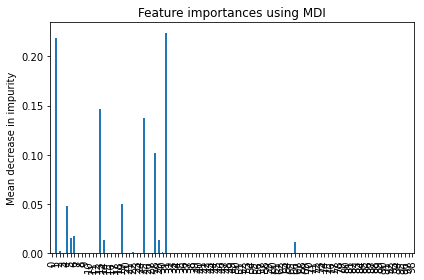

In [164]:
y_pred_norm = classifier_norm.predict(test_df_norm_x)
y_pred_norm
importances = classifier_norm.feature_importances_
print(np.where(importances == max(importances)), max(importances), landmark_names[21])
forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
y_pred_norm

In [112]:
xg_pred = preds.predict(test_df_norm_x)
xg_pred

array(['bad', 'bad', 'bad', ..., 'bad', 'bad', 'bad'], dtype=object)

In [110]:
mlp_select_res = MLP_select.predict(test_df_norm_x)
mlp_select_res

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype='<U4')

In [155]:
count1 = 0
for x in xg_pred:
    if x == "bad":
        count1 += 1
count1/len(xg_pred)

0.9958932238193019

In [292]:
bayes_pred = bayes.predict(test_df_norm_x)
bayes_pred

array(['bad', 'bad', 'bad', ..., 'bad', 'bad', 'bad'], dtype='<U4')

In [295]:
clf_pred = clf.predict(test_df_norm_x)
clf_pred

array(['bad', 'bad', 'bad', ..., 'bad', 'bad', 'bad'], dtype=object)

In [116]:
neigh_pred = neigh.predict(test_df_norm_x)
neigh_pred

array(['bad', 'bad', 'bad', ..., 'good', 'good', 'good'], dtype=object)

In [42]:
dense_nn = tf.keras.models.load_model("final_nn.keras")
nn_pred2 = dense_nn.predict(test_df_norm_x)

In [43]:
nn_pred2 = nn_pred2.argmax(axis=1)

In [46]:
dict1 = {0: "Bad",
        1: "Good"}

In [44]:
len(nn_pred2)

1110

In [30]:
nn_pred = MLP.predict(test_df_norm_x)
nn_pred

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype='<U4')

In [47]:
cap = cv2.VideoCapture("dataset videos\\fahim_test.mp4")

mpDraw = mp.solutions.drawing_utils
mpPose = mp.solutions.pose
pose = mpPose.Pose()

out_video_path = "dataset videos\\fahim_test_out.mp4"
video_n_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
video_fps = cap.get(cv2.CAP_PROP_FPS)
video_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
video_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out_video = cv2.VideoWriter(out_video_path, cv2.VideoWriter_fourcc(*'mp4v'), video_fps, (video_width, video_height))

count=0
while True:
#     if count == 751:
#         break
    success, img = cap.read()
    if success == False:
        break
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    results = pose.process(imgRGB)
    if results.pose_landmarks:
        mpDraw.draw_landmarks(imgRGB, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
    cv2.putText(imgRGB, str(dict1[nn_pred2[count]]), (100, 50), cv2.FONT_HERSHEY_PLAIN, 5, (255, 0, 0), 1)
    out_video.write(cv2.cvtColor(imgRGB, cv2.COLOR_BGR2RGB))
    count+=1
out_video.release()
    

# Model Accuracy

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(nn_pred, test_df_norm_y))
print(classification_report(nn_pred, test_df_norm_y))
print(accuracy_score(nn_pred, test_df_norm_y))

[[2505  355]
 [  15 3023]]
              precision    recall  f1-score   support

         bad       0.99      0.88      0.93      2860
        good       0.89      1.00      0.94      3038

    accuracy                           0.94      5898
   macro avg       0.94      0.94      0.94      5898
weighted avg       0.94      0.94      0.94      5898

0.9372668701254663


In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(nn_pred, test_df_norm_y))
print(classification_report(nn_pred, test_df_norm_y))
print(accuracy_score(nn_pred, test_df_norm_y))

[[2492  196]
 [  28 3182]]
              precision    recall  f1-score   support

         bad       0.99      0.93      0.96      2688
        good       0.94      0.99      0.97      3210

    accuracy                           0.96      5898
   macro avg       0.97      0.96      0.96      5898
weighted avg       0.96      0.96      0.96      5898

0.9620210240759579


In [164]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(xg_pred, test_df_norm_y))
print(classification_report(xg_pred, test_df_norm_y))
print(accuracy_score(xg_pred, test_df_norm_y))

[[2482  593]
 [  38 2785]]
              precision    recall  f1-score   support

         bad       0.98      0.81      0.89      3075
        good       0.82      0.99      0.90      2823

    accuracy                           0.89      5898
   macro avg       0.90      0.90      0.89      5898
weighted avg       0.91      0.89      0.89      5898

0.8930145812139708


In [336]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(nn_pred, test_df_norm_y))
print(classification_report(nn_pred, test_df_norm_y))
print(accuracy_score(nn_pred, test_df_norm_y))

[[2321  184]
 [ 199 3194]]
              precision    recall  f1-score   support

         bad       0.92      0.93      0.92      2505
        good       0.95      0.94      0.94      3393

    accuracy                           0.94      5898
   macro avg       0.93      0.93      0.93      5898
weighted avg       0.94      0.94      0.94      5898

0.9350627331298745


In [113]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(xg_pred, test_df_norm_y))
print(classification_report(xg_pred, test_df_norm_y))
print(accuracy_score(xg_pred, test_df_norm_y))

[[2483  426]
 [  37 2952]]
              precision    recall  f1-score   support

         bad       0.99      0.85      0.91      2909
        good       0.87      0.99      0.93      2989

    accuracy                           0.92      5898
   macro avg       0.93      0.92      0.92      5898
weighted avg       0.93      0.92      0.92      5898

0.9214988131570023


In [293]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(bayes_pred, test_df_norm_y))
print(classification_report(bayes_pred, test_df_norm_y))
print(accuracy_score(bayes_pred, test_df_norm_y))

[[2421  812]
 [  99 2566]]
              precision    recall  f1-score   support

         bad       0.96      0.75      0.84      3233
        good       0.76      0.96      0.85      2665

    accuracy                           0.85      5898
   macro avg       0.86      0.86      0.85      5898
weighted avg       0.87      0.85      0.85      5898

0.8455408613089183


In [296]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(clf_pred, test_df_norm_y))
print(classification_report(clf_pred, test_df_norm_y))
print(accuracy_score(clf_pred, test_df_norm_y))

[[2520 3378]
 [   0    0]]
              precision    recall  f1-score   support

         bad       1.00      0.43      0.60      5898
        good       0.00      0.00      0.00         0

    accuracy                           0.43      5898
   macro avg       0.50      0.21      0.30      5898
weighted avg       1.00      0.43      0.60      5898

0.427263479145473


C:\Users\Rithik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [323]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(neigh_pred, test_df_norm_y))
print(classification_report(neigh_pred, test_df_norm_y))
print(accuracy_score(neigh_pred, test_df_norm_y))

[[2327   40]
 [ 193 3338]]
              precision    recall  f1-score   support

         bad       0.92      0.98      0.95      2367
        good       0.99      0.95      0.97      3531

    accuracy                           0.96      5898
   macro avg       0.96      0.96      0.96      5898
weighted avg       0.96      0.96      0.96      5898

0.9604950830790099


In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(xg_pred, test_df_norm_y))
print(classification_report(xg_pred, test_df_norm_y))
print(accuracy_score(xg_pred, test_df_norm_y))

[[2482  593]
 [  38 2785]]
              precision    recall  f1-score   support

         bad       0.98      0.81      0.89      3075
        good       0.82      0.99      0.90      2823

    accuracy                           0.89      5898
   macro avg       0.90      0.90      0.89      5898
weighted avg       0.91      0.89      0.89      5898

0.8930145812139708


In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(nn_pred, test_df_norm_y))
print(classification_report(nn_pred, test_df_norm_y))
print(accuracy_score(nn_pred, test_df_norm_y))

[[2476  393]
 [  44 2985]]
              precision    recall  f1-score   support

         bad       0.98      0.86      0.92      2869
        good       0.88      0.99      0.93      3029

    accuracy                           0.93      5898
   macro avg       0.93      0.92      0.93      5898
weighted avg       0.93      0.93      0.93      5898

0.9259070871481858


In [115]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(nn_pred, test_df_norm_y))
print(classification_report(nn_pred, test_df_norm_y))
print(accuracy_score(nn_pred, test_df_norm_y))

[[2311  121]
 [ 209 3257]]
              precision    recall  f1-score   support

         bad       0.92      0.95      0.93      2432
        good       0.96      0.94      0.95      3466

    accuracy                           0.94      5898
   macro avg       0.94      0.94      0.94      5898
weighted avg       0.94      0.94      0.94      5898

0.9440488301119023


In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(neigh_pred, test_df_norm_y))
print(classification_report(neigh_pred, test_df_norm_y))
print(accuracy_score(neigh_pred, test_df_norm_y))

[[2327   40]
 [ 193 3338]]
              precision    recall  f1-score   support

         bad       0.92      0.98      0.95      2367
        good       0.99      0.95      0.97      3531

    accuracy                           0.96      5898
   macro avg       0.96      0.96      0.96      5898
weighted avg       0.96      0.96      0.96      5898

0.9604950830790099


In [59]:
Y_norm == test_df_norm_y

C:\Users\Rithik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [58]:
test_df_norm_y

array(['bad', 'bad', 'bad', ..., 'good', 'good', 'good'], dtype=object)